In [3]:
#load data from csvs
break_data <- read.csv("block_break.csv")
place_data <- read.csv("block_place.csv")
session_data <- read.csv("session.csv")
sign_data <- read.csv("sign.csv")

In [3]:
#summarize the data so we know what we're working with
summary(break_data)
summary(place_data)
summary(session_data)
summary(sign_data)

                  time                      user       
 2020-02-08 00:59:17:   182   GermanEngineer12: 56698  
 2020-02-08 01:11:13:   168   Infernoboy16    : 18184  
 2020-02-08 01:11:15:   163   lavablade02     : 17830  
 2020-02-08 01:01:34:   158   Check9light     : 17517  
 2020-02-08 12:27:06:   150   Kraftec         : 12668  
 2020-02-08 00:54:12:   149   Jakethasnake52  : 11752  
 (Other)            :999030   (Other)         :865351  
              block                  world              x           
 stone           :313391   world        :712977   Min.   :-85231.0  
 netherrack      :251692   world_nether :269894   1st Qu.:  -633.0  
 lava            : 61495   world_the_end: 17129   Median :     0.0  
 long_grass      : 47681                          Mean   :   228.4  
 stationary_water: 22022                          3rd Qu.:  1023.0  
 diamond_ore     : 21437                          Max.   : 61846.0  
 (Other)         :282282                                            


                  time                      user       
 2020-02-08 10:24:06:   597   Check9light     :246342  
 2020-02-08 10:24:07:   591   GermanEngineer12:234062  
 2020-02-08 10:33:16:   565   artofcroissant  :123579  
 2020-02-08 05:50:12:   562   lavablade02     : 92888  
 2020-02-07 21:03:57:   539   CommaDotNight   : 26870  
 2020-02-08 08:10:48:   533   Ovechkin_       : 17929  
 (Other)            :996613   (Other)         :258330  
              block                  world              x           
 stationary_water:456432   world        :953392   Min.   :-62073.0  
 stationary_lava :253801   world_nether : 20731   1st Qu.: -1317.0  
 lava            : 88494   world_the_end: 25877   Median :     2.0  
 cobblestone     : 58813                          Mean   :   544.3  
 water           : 52369                          3rd Qu.:  1496.0  
 leaves          : 15567                          Max.   : 47797.0  
 (Other)         : 74524                                            


                  time                user            action      
 2020-02-22 08:41:12:   150   SyJay18   :  7835   Min.   :0.0000  
 2020-02-12 19:42:37:   127   BeefCity  :  5147   1st Qu.:0.0000  
 2020-02-14 23:31:12:   127   Fetopia   :  4623   Median :1.0000  
 2020-02-08 13:38:00:   125   moooomoooo:  4524   Mean   :0.5049  
 2020-02-26 17:42:34:   125   BentsiW   :  4078   3rd Qu.:1.0000  
 2020-02-26 17:55:00:   125   k3b       :  2861   Max.   :1.0000  
 (Other)            :968915   (Other)   :940626                   
           world              x                   y           
 world        :772280   Min.   :-13001795   Min.   :-2669.00  
 world_nether :190425   1st Qu.:     -753   1st Qu.:   61.00  
 world_the_end:  6989   Median :        4   Median :   66.00  
                        Mean   :     8117   Mean   :   74.23  
                        3rd Qu.:     2673   3rd Qu.:   79.00  
                        Max.   : 30000000   Max.   :14610.00  
                       

                  time                   user       
 2020-03-27 20:20:14:    14   Shrando      :  1192  
 2020-04-11 08:08:31:    14   CactusDuper  :  1103  
 2020-03-25 17:31:35:    12   ShatteredHej :   923  
 2020-04-04 18:03:35:    12   Temantor     :   806  
 2020-02-29 15:50:19:    10   SmashyMC     :   805  
 2020-03-23 16:56:39:    10   ComradeNapCal:   672  
 (Other)            :130285   (Other)      :124856  
                                                               text      
                                                                 :27948  
 sal is cute                                                     : 1038  
 e                                                               :  446  
                                                                 :  362  
 tip:if there isnt a snow to spam on just move him slightly till :  322  
 w                                                               :  307  
 (Other)                                                  

In [4]:
#A few things need fixing. First we remove all the null data (27k blank signs)
sign_data <- sign_data[sign_data$text!="   ",] #three spaces were put in for blank signs in the python script
summary(sign_data)

                  time                   user      
 2020-03-25 17:31:35:    12   CactusDuper  : 1088  
 2020-04-04 18:03:35:    12   ShatteredHej :  833  
 2020-03-23 16:56:39:    10   SmashyMC     :  752  
 2020-03-24 13:33:30:    10   Temantor     :  706  
 2020-03-24 13:33:32:    10   ClareBear0925:  544  
 2020-03-24 13:33:42:    10   Fobba        :  532  
 (Other)            :102345   (Other)      :97954  
                                                               text      
 sal is cute                                                     : 1038  
 e                                                               :  446  
                                                                 :  362  
 tip:if there isnt a snow to spam on just move him slightly till :  322  
 w                                                               :  307  
 123456478957398 893475893758937 734563875637856 874356783563875 :  280  
 (Other)                                                         :

In [5]:
#okay so the 27k null signs are gone
#there's still 362 that appear blank
#lets try removing 4 spaces (3 from python + 1 from the original sign)
sign_data <- sign_data[sign_data$text!="    ",]
summary(sign_data)

                  time                   user      
 2020-03-25 17:31:35:    12   CactusDuper  : 1088  
 2020-04-04 18:03:35:    12   ShatteredHej :  833  
 2020-03-23 16:56:39:    10   SmashyMC     :  750  
 2020-03-24 13:33:30:    10   Temantor     :  704  
 2020-03-24 13:33:32:    10   ClareBear0925:  544  
 2020-03-24 13:33:42:    10   Fobba        :  530  
 (Other)            :101983   (Other)      :97598  
                                                               text      
 sal is cute                                                     : 1038  
 e                                                               :  446  
 tip:if there isnt a snow to spam on just move him slightly till :  322  
 w                                                               :  307  
 123456478957398 893475893758937 734563875637856 874356783563875 :  280  
  Valley of signs                                                :  265  
 (Other)                                                         :

In [6]:
#that seemed to fix the bulk of the blanks signs. There could be more with more spaces but we'll handle that when we get there
#now we can focus on simplifying categorical variables
#that "action" category in session refers to whether it was a log-in or log-off. 
#If we want to keep session we can rename it, but it's also useful to seperate in/off into two new data frame
library(plyr)
session_data$action <- factor(session_data$action)
session_data$action <- revalue(session_data$action, c('0'="out", '1'="in"))

log_in <- session_data[session_data$action=="in", colnames(session_data)[colnames(session_data)!="action"]]
log_out <-session_data[session_data$action=="out", colnames(session_data)[colnames(session_data)!="action"]]

In [7]:
#every data frame has a world column. We can change that to "dimension" and set better levels
library(plyr)
colnames(break_data)[colnames(break_data)=="world"] <- "dimension"
break_data$dimension<-revalue(break_data$dimension, c(world="overworld", world_nether="nether", world_the_end="end"));

colnames(place_data)[colnames(place_data)=="world"] <- "dimension"
place_data$dimension<-revalue(place_data$dimension, c(world="overworld", world_nether="nether", world_the_end="end"));

colnames(sign_data)[colnames(sign_data)=="world"] <- "dimension"
sign_data$dimension<-revalue(sign_data$dimension, c(world="overworld", world_nether="nether", world_the_end="end"));

colnames(session_data)[colnames(session_data)=="world"] <- "dimension"
session_data$dimension <- revalue(session_data$dimension, c(world="overworld", world_nether="nether", world_the_end="end"));

colnames(log_in)[colnames(log_in)=="world"] <- "dimension"
log_in$dimension <- revalue(log_in$dimension, c(world="overworld", world_nether="nether", world_the_end="end"));

colnames(log_out)[colnames(log_out)=="world"] <- "dimension"
log_out$dimension <- revalue(log_out$dimension, c(world="overworld", world_nether="nether", world_the_end="end"));

In [8]:
summary(session_data)
summary(log_in)

                  time                user        action      
 2020-02-22 08:41:12:   150   SyJay18   :  7835   out:480051  
 2020-02-12 19:42:37:   127   BeefCity  :  5147   in :489643  
 2020-02-14 23:31:12:   127   Fetopia   :  4623               
 2020-02-08 13:38:00:   125   moooomoooo:  4524               
 2020-02-26 17:42:34:   125   BentsiW   :  4078               
 2020-02-26 17:55:00:   125   k3b       :  2861               
 (Other)            :968915   (Other)   :940626               
     dimension            x                   y                  z            
 overworld:772280   Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 nether   :190425   1st Qu.:     -753   1st Qu.:   61.00   1st Qu.:     -481  
 end      :  6989   Median :        4   Median :   66.00   Median :       17  
                    Mean   :     8117   Mean   :   74.23   Mean   :    -5068  
                    3rd Qu.:     2673   3rd Qu.:   79.00   3rd Qu.:     2320  
                    Ma

                  time                user            dimension     
 2020-02-09 12:46:57:    26   SyJay18   :  3911   overworld:391477  
 2020-03-13 09:41:36:    25   BeefCity  :  2573   nether   : 94625  
 2020-02-09 12:48:00:    24   Fetopia   :  2319   end      :  3541  
 2020-03-03 21:36:02:    24   moooomoooo:  2306                     
 2020-03-04 23:54:39:    23   BentsiW   :  2042                     
 2020-03-12 18:43:49:    23   k3b       :  1438                     
 (Other)            :489498   (Other)   :475054                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -679   1st Qu.:   61.00   1st Qu.:     -435  
 Median :        5   Median :   66.00   Median :       16  
 Mean   :     8061   Mean   :   74.23   Mean   :    -5076  
 3rd Qu.:     2500   3rd Qu.:   79.00   3rd Qu.:     2184  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9999965  
                            

In [9]:
#this is all I want to do for now. When I process time I may choose to change it to a different format, but for now it's
#going to stay human readable. 

In [10]:

#break_data is a data frame with information about the first 1,000,000 blocks broken by players on the server
#time: time and date of the break, user: username of the player who broke it, block: type of block broken
#dimension: which dimension was the block in (categorical)
#x: whole x coordinate of the block, y: whole y (vertical) coordinate of the block, z: whole z coordinate of the block
head(break_data)
summary(break_data)

#place_data is a data frame with information about the first 1,000,000 blocks placed by players on the server
#time: time and date of the place, user: username of the player who placed it, block: type of block placed
#dimension: which dimension was the block in (categorical)
#x: whole x coordinate of the block, y: whole y (vertical) coordinate of the block, z: whole z coordinate of the block
head(place_data)
summary(place_data)

#session_data is a data frame with information about player sessions. It captures log-on/log-off events.
#time: time and date of the event, user: username of the player, action: did they log on or off (categorical)
#x,y,z: whole coordinates where they logged, dimension: dimension where they logged (categorical)
head(session_data)
summary(session_data)

#log_in is a subset of session_data consisting of only log-ins and therefore has no action column
head(log_in)
summary(log_in)

#log_out is a subset of session_data consisting only of log-outs and therefore has no action column
head(log_out)
summary(log_out)

#sign_data is a data frame with information about signs placed by players
#time: The time and date the sign was placed, user: username of the player who placed the sign, text: text on the sign (concatenated all 4 rows)
#x, y, z: whole coordinates of the sign's position, dimension: dimension where the sign was placed (categorical)
head(sign_data)
summary(sign_data)

,time,user,block,dimension,x,y,z
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,2020-02-07 09:33:30,PandaPimp,grass,overworld,44,71,40
2,2020-02-07 17:45:59,8pipis,log,overworld,23,70,-119
3,2020-02-07 17:46:01,proba2000,long_grass,overworld,-43,64,177
4,2020-02-07 17:46:02,proba2000,vine,overworld,-45,65,175
5,2020-02-07 17:46:10,8pipis,leaves,overworld,29,66,-73
6,2020-02-07 17:46:11,proba2000,grass,overworld,-34,63,168


                  time                      user       
 2020-02-08 00:59:17:   182   GermanEngineer12: 56698  
 2020-02-08 01:11:13:   168   Infernoboy16    : 18184  
 2020-02-08 01:11:15:   163   lavablade02     : 17830  
 2020-02-08 01:01:34:   158   Check9light     : 17517  
 2020-02-08 12:27:06:   150   Kraftec         : 12668  
 2020-02-08 00:54:12:   149   Jakethasnake52  : 11752  
 (Other)            :999030   (Other)         :865351  
              block            dimension            x           
 stone           :313391   overworld:712977   Min.   :-85231.0  
 netherrack      :251692   nether   :269894   1st Qu.:  -633.0  
 lava            : 61495   end      : 17129   Median :     0.0  
 long_grass      : 47681                      Mean   :   228.4  
 stationary_water: 22022                      3rd Qu.:  1023.0  
 diamond_ore     : 21437                      Max.   : 61846.0  
 (Other)         :282282                                        
       y                z       

,time,user,block,dimension,x,y,z
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,2020-02-07 17:46:24,proba2000,dirt,overworld,-29,63,178
2,2020-02-07 17:46:34,xercer,workbench,overworld,38,65,-70
3,2020-02-07 17:46:41,8pipis,workbench,overworld,8,65,-17
4,2020-02-07 17:46:48,Leguas9h,sand,overworld,157,60,-206
5,2020-02-07 17:47:09,ufgt,sapling,overworld,-39,63,202
6,2020-02-07 17:47:29,xercer,workbench,overworld,94,64,-125


                  time                      user       
 2020-02-08 10:24:06:   597   Check9light     :246342  
 2020-02-08 10:24:07:   591   GermanEngineer12:234062  
 2020-02-08 10:33:16:   565   artofcroissant  :123579  
 2020-02-08 05:50:12:   562   lavablade02     : 92888  
 2020-02-07 21:03:57:   539   CommaDotNight   : 26870  
 2020-02-08 08:10:48:   533   Ovechkin_       : 17929  
 (Other)            :996613   (Other)         :258330  
              block            dimension            x           
 stationary_water:456432   overworld:953392   Min.   :-62073.0  
 stationary_lava :253801   nether   : 20731   1st Qu.: -1317.0  
 lava            : 88494   end      : 25877   Median :     2.0  
 cobblestone     : 58813                      Mean   :   544.3  
 water           : 52369                      3rd Qu.:  1496.0  
 leaves          : 15567                      Max.   : 47797.0  
 (Other)         : 74524                                        
       y                z       

,time,user,action,dimension,x,y,z
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,2020-02-07 00:53:21,LaiZBoi,in,overworld,-24,76,-43
2,2020-02-07 00:53:27,LaiZBoi,out,overworld,-24,75,-43
3,2020-02-07 01:56:55,LaiZBoi,in,overworld,-24,75,-43
4,2020-02-07 01:57:08,LaiZBoi,out,overworld,30,83,23
5,2020-02-07 01:58:24,SalC1,in,overworld,11,74,-29
6,2020-02-07 01:58:37,SalC1,out,overworld,11,74,-29


                  time                user        action      
 2020-02-22 08:41:12:   150   SyJay18   :  7835   out:480051  
 2020-02-12 19:42:37:   127   BeefCity  :  5147   in :489643  
 2020-02-14 23:31:12:   127   Fetopia   :  4623               
 2020-02-08 13:38:00:   125   moooomoooo:  4524               
 2020-02-26 17:42:34:   125   BentsiW   :  4078               
 2020-02-26 17:55:00:   125   k3b       :  2861               
 (Other)            :968915   (Other)   :940626               
     dimension            x                   y                  z            
 overworld:772280   Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 nether   :190425   1st Qu.:     -753   1st Qu.:   61.00   1st Qu.:     -481  
 end      :  6989   Median :        4   Median :   66.00   Median :       17  
                    Mean   :     8117   Mean   :   74.23   Mean   :    -5068  
                    3rd Qu.:     2673   3rd Qu.:   79.00   3rd Qu.:     2320  
                    Ma

,time,user,dimension,x,y,z
,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,2020-02-07 00:53:21,LaiZBoi,overworld,-24,76,-43
3,2020-02-07 01:56:55,LaiZBoi,overworld,-24,75,-43
5,2020-02-07 01:58:24,SalC1,overworld,11,74,-29
7,2020-02-07 01:58:55,LaiZBoi,overworld,30,83,23
9,2020-02-07 01:58:59,LaiZBoi,overworld,30,81,23
11,2020-02-07 01:59:01,LaiZBoi,overworld,30,81,23


                  time                user            dimension     
 2020-02-09 12:46:57:    26   SyJay18   :  3911   overworld:391477  
 2020-03-13 09:41:36:    25   BeefCity  :  2573   nether   : 94625  
 2020-02-09 12:48:00:    24   Fetopia   :  2319   end      :  3541  
 2020-03-03 21:36:02:    24   moooomoooo:  2306                     
 2020-03-04 23:54:39:    23   BentsiW   :  2042                     
 2020-03-12 18:43:49:    23   k3b       :  1438                     
 (Other)            :489498   (Other)   :475054                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -679   1st Qu.:   61.00   1st Qu.:     -435  
 Median :        5   Median :   66.00   Median :       16  
 Mean   :     8061   Mean   :   74.23   Mean   :    -5076  
 3rd Qu.:     2500   3rd Qu.:   79.00   3rd Qu.:     2184  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9999965  
                            

,time,user,dimension,x,y,z
,<fct>,<fct>,<fct>,<int>,<int>,<int>
2,2020-02-07 00:53:27,LaiZBoi,overworld,-24,75,-43
4,2020-02-07 01:57:08,LaiZBoi,overworld,30,83,23
6,2020-02-07 01:58:37,SalC1,overworld,11,74,-29
8,2020-02-07 01:58:58,LaiZBoi,overworld,30,81,23
10,2020-02-07 01:59:00,LaiZBoi,overworld,30,81,23
12,2020-02-07 01:59:03,LaiZBoi,overworld,30,81,23


                  time                user            dimension     
 2020-02-22 08:41:12:   150   SyJay18   :  3924   overworld:380803  
 2020-02-12 19:42:37:   127   BeefCity  :  2574   nether   : 95800  
 2020-02-14 23:31:12:   127   Fetopia   :  2304   end      :  3448  
 2020-02-08 13:38:00:   125   moooomoooo:  2218                     
 2020-02-26 17:42:34:   125   BentsiW   :  2036                     
 2020-02-26 17:55:00:   125   k3b       :  1423                     
 (Other)            :479272   (Other)   :465572                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2665.00   Min.   :-15015097  
 1st Qu.:     -816   1st Qu.:   61.00   1st Qu.:     -527  
 Median :        4   Median :   66.00   Median :       18  
 Mean   :     8174   Mean   :   74.23   Mean   :    -5061  
 3rd Qu.:     2870   3rd Qu.:   79.00   3rd Qu.:     2442  
 Max.   : 30000000   Max.   :14610.00   Max.   :  9999965  
                            

,time,user,text,dimension,x,y,z
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
2,2020-02-07 18:06:12,SoldaatMinecraft,2/8/2020 SoldaatMinecraft Were it al began...,overworld,-167,63,536
3,2020-02-07 18:09:26,MuzzyCerdo,SALC1 IS GAY -MuzzyCerdo,overworld,167,72,-83
4,2020-02-07 18:10:27,SoldaatMinecraft,2/8/20 SoldaatMinecraft Were it al began...,overworld,-191,64,590
5,2020-02-07 18:11:07,MuzzyCerdo,hey bitches dont get here 08/02/2020 muzzycerdo,overworld,128,70,-135
6,2020-02-07 18:12:35,artofcroissant,hi -artofcroissant 08 02 2020,overworld,36,64,1388
7,2020-02-07 18:13:11,Kerizo,Hey all,overworld,-192,64,-44


                  time                   user      
 2020-03-25 17:31:35:    12   CactusDuper  : 1088  
 2020-04-04 18:03:35:    12   ShatteredHej :  833  
 2020-03-23 16:56:39:    10   SmashyMC     :  750  
 2020-03-24 13:33:30:    10   Temantor     :  704  
 2020-03-24 13:33:32:    10   ClareBear0925:  544  
 2020-03-24 13:33:42:    10   Fobba        :  530  
 (Other)            :101983   (Other)      :97598  
                                                               text      
 sal is cute                                                     : 1038  
 e                                                               :  446  
 tip:if there isnt a snow to spam on just move him slightly till :  322  
 w                                                               :  307  
 123456478957398 893475893758937 734563875637856 874356783563875 :  280  
  Valley of signs                                                :  265  
 (Other)                                                         :

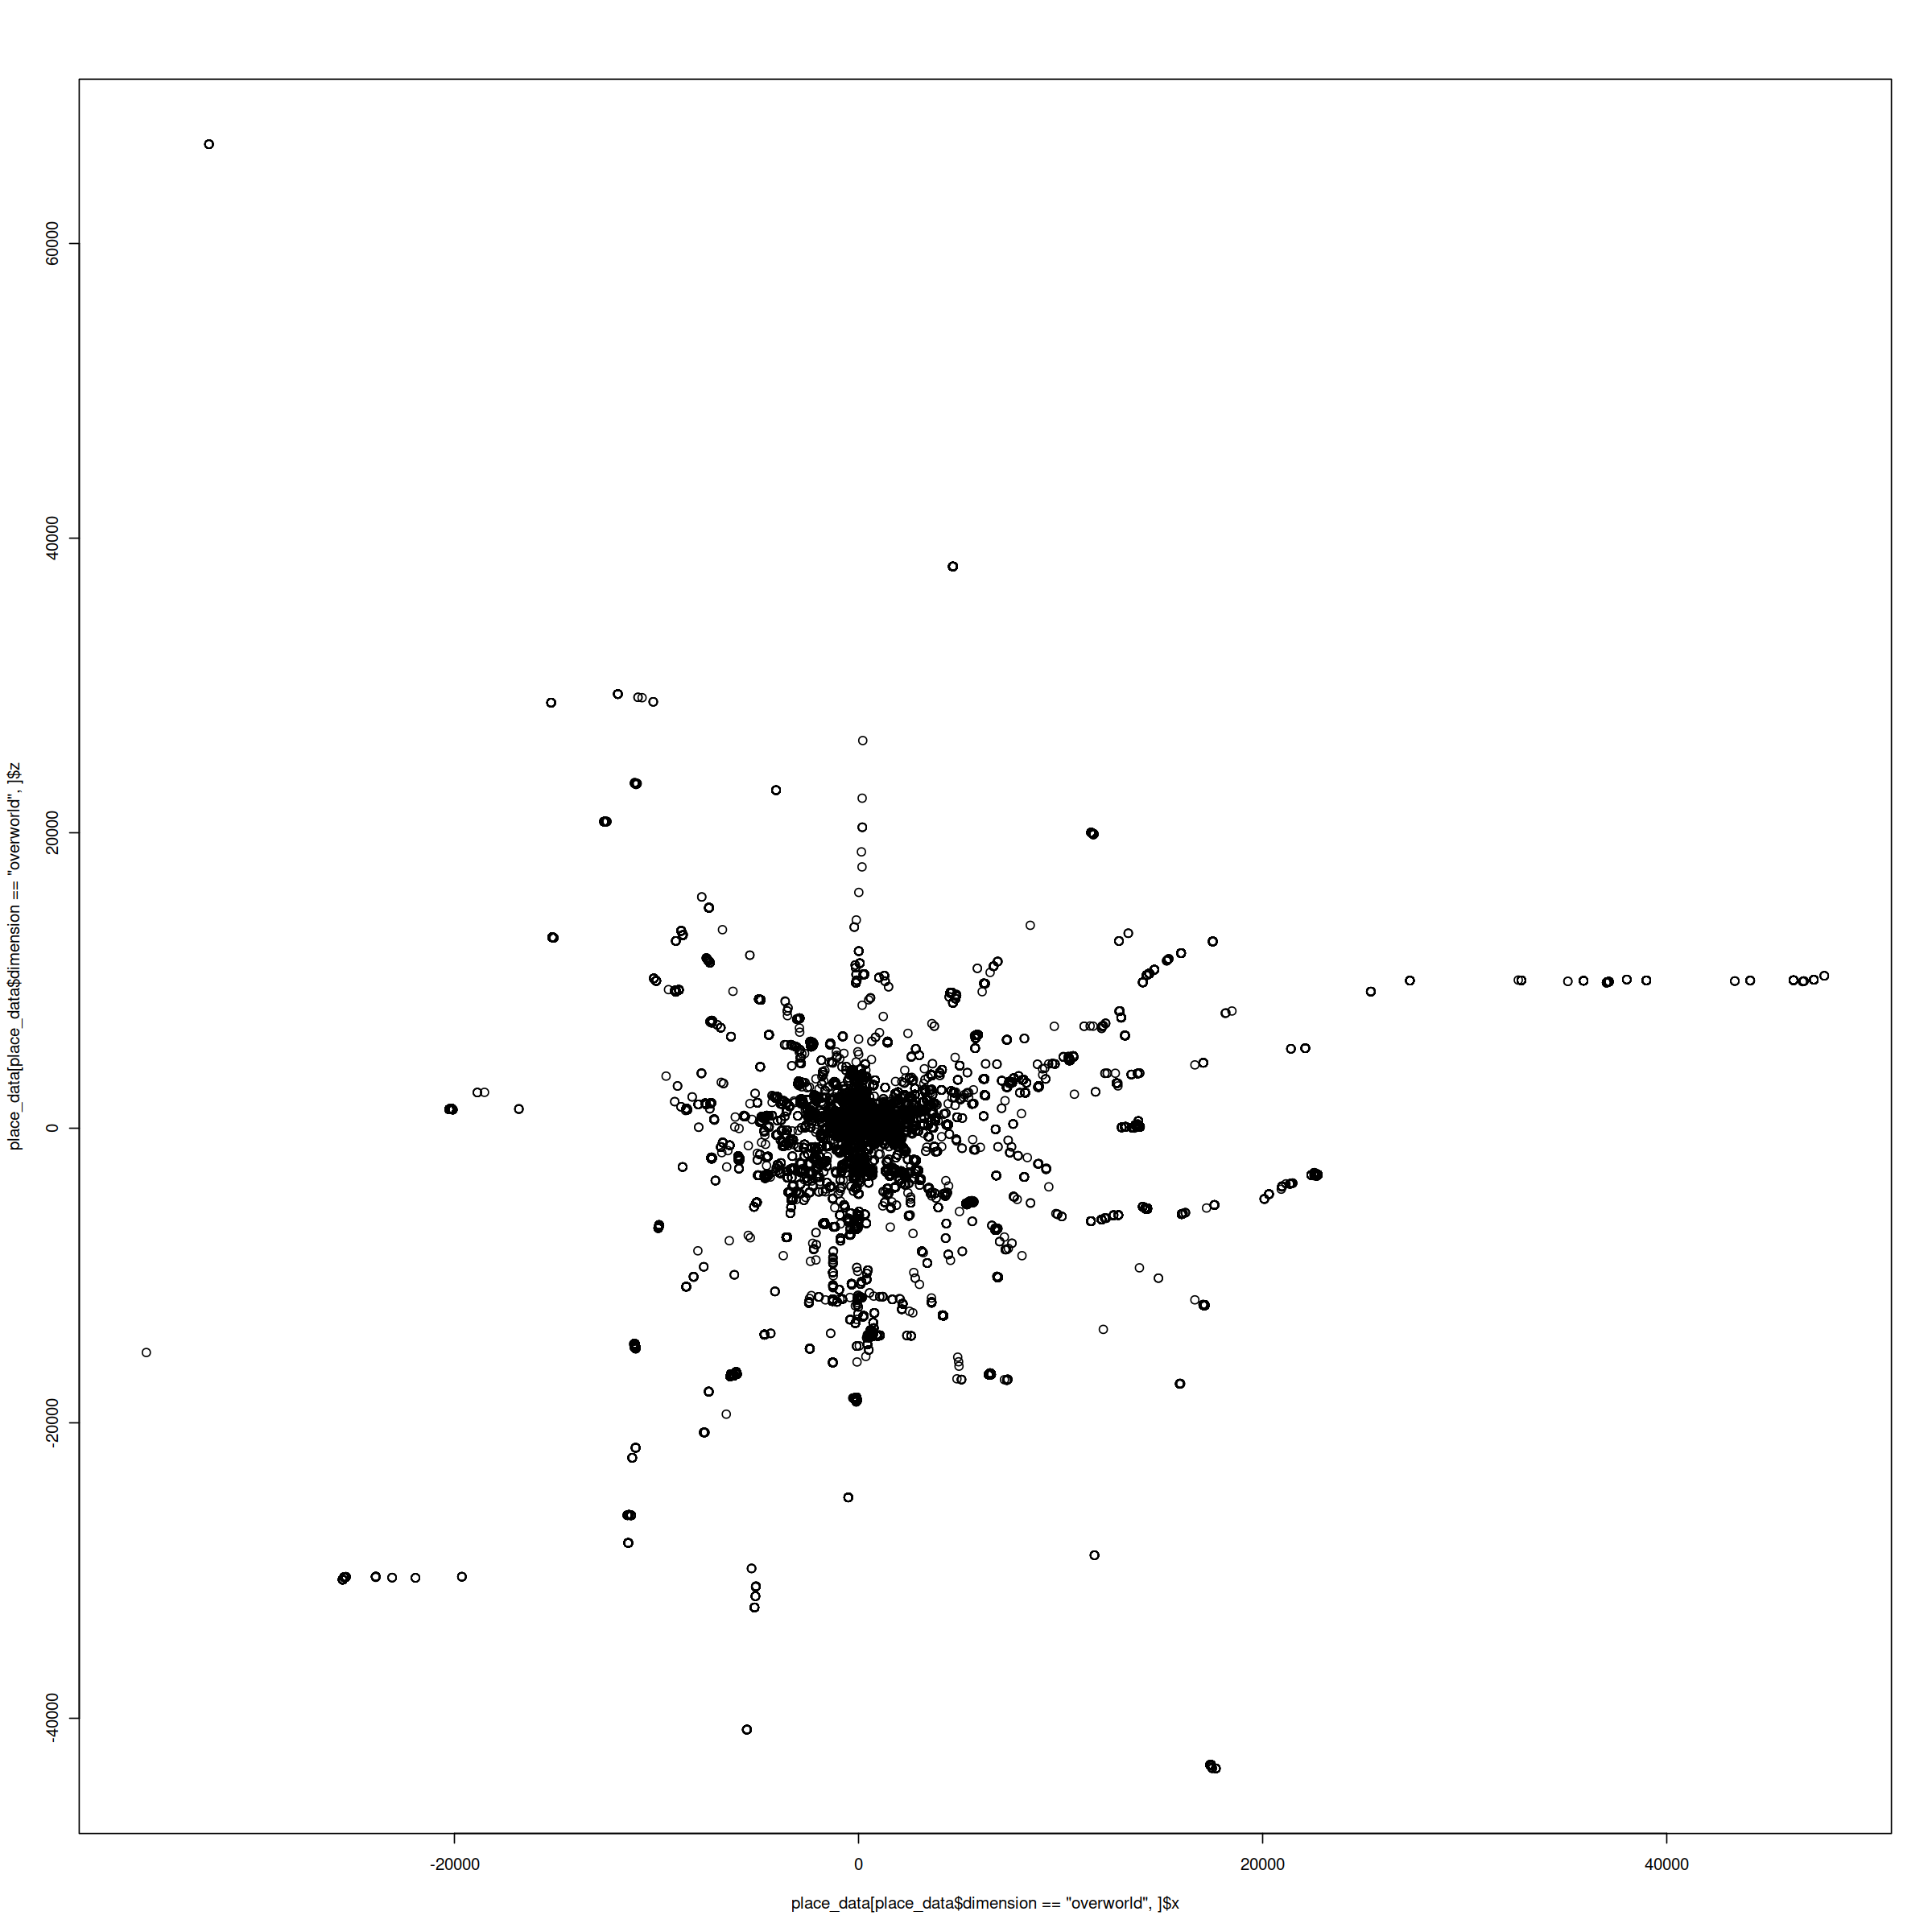

In [14]:
#plot overworld block placements
options(repr.plot.height=20, repr.plot.width=20)
plot(place_data[place_data$dimension=="overworld",]$x, place_data[place_data$dimension=="overworld",]$z)

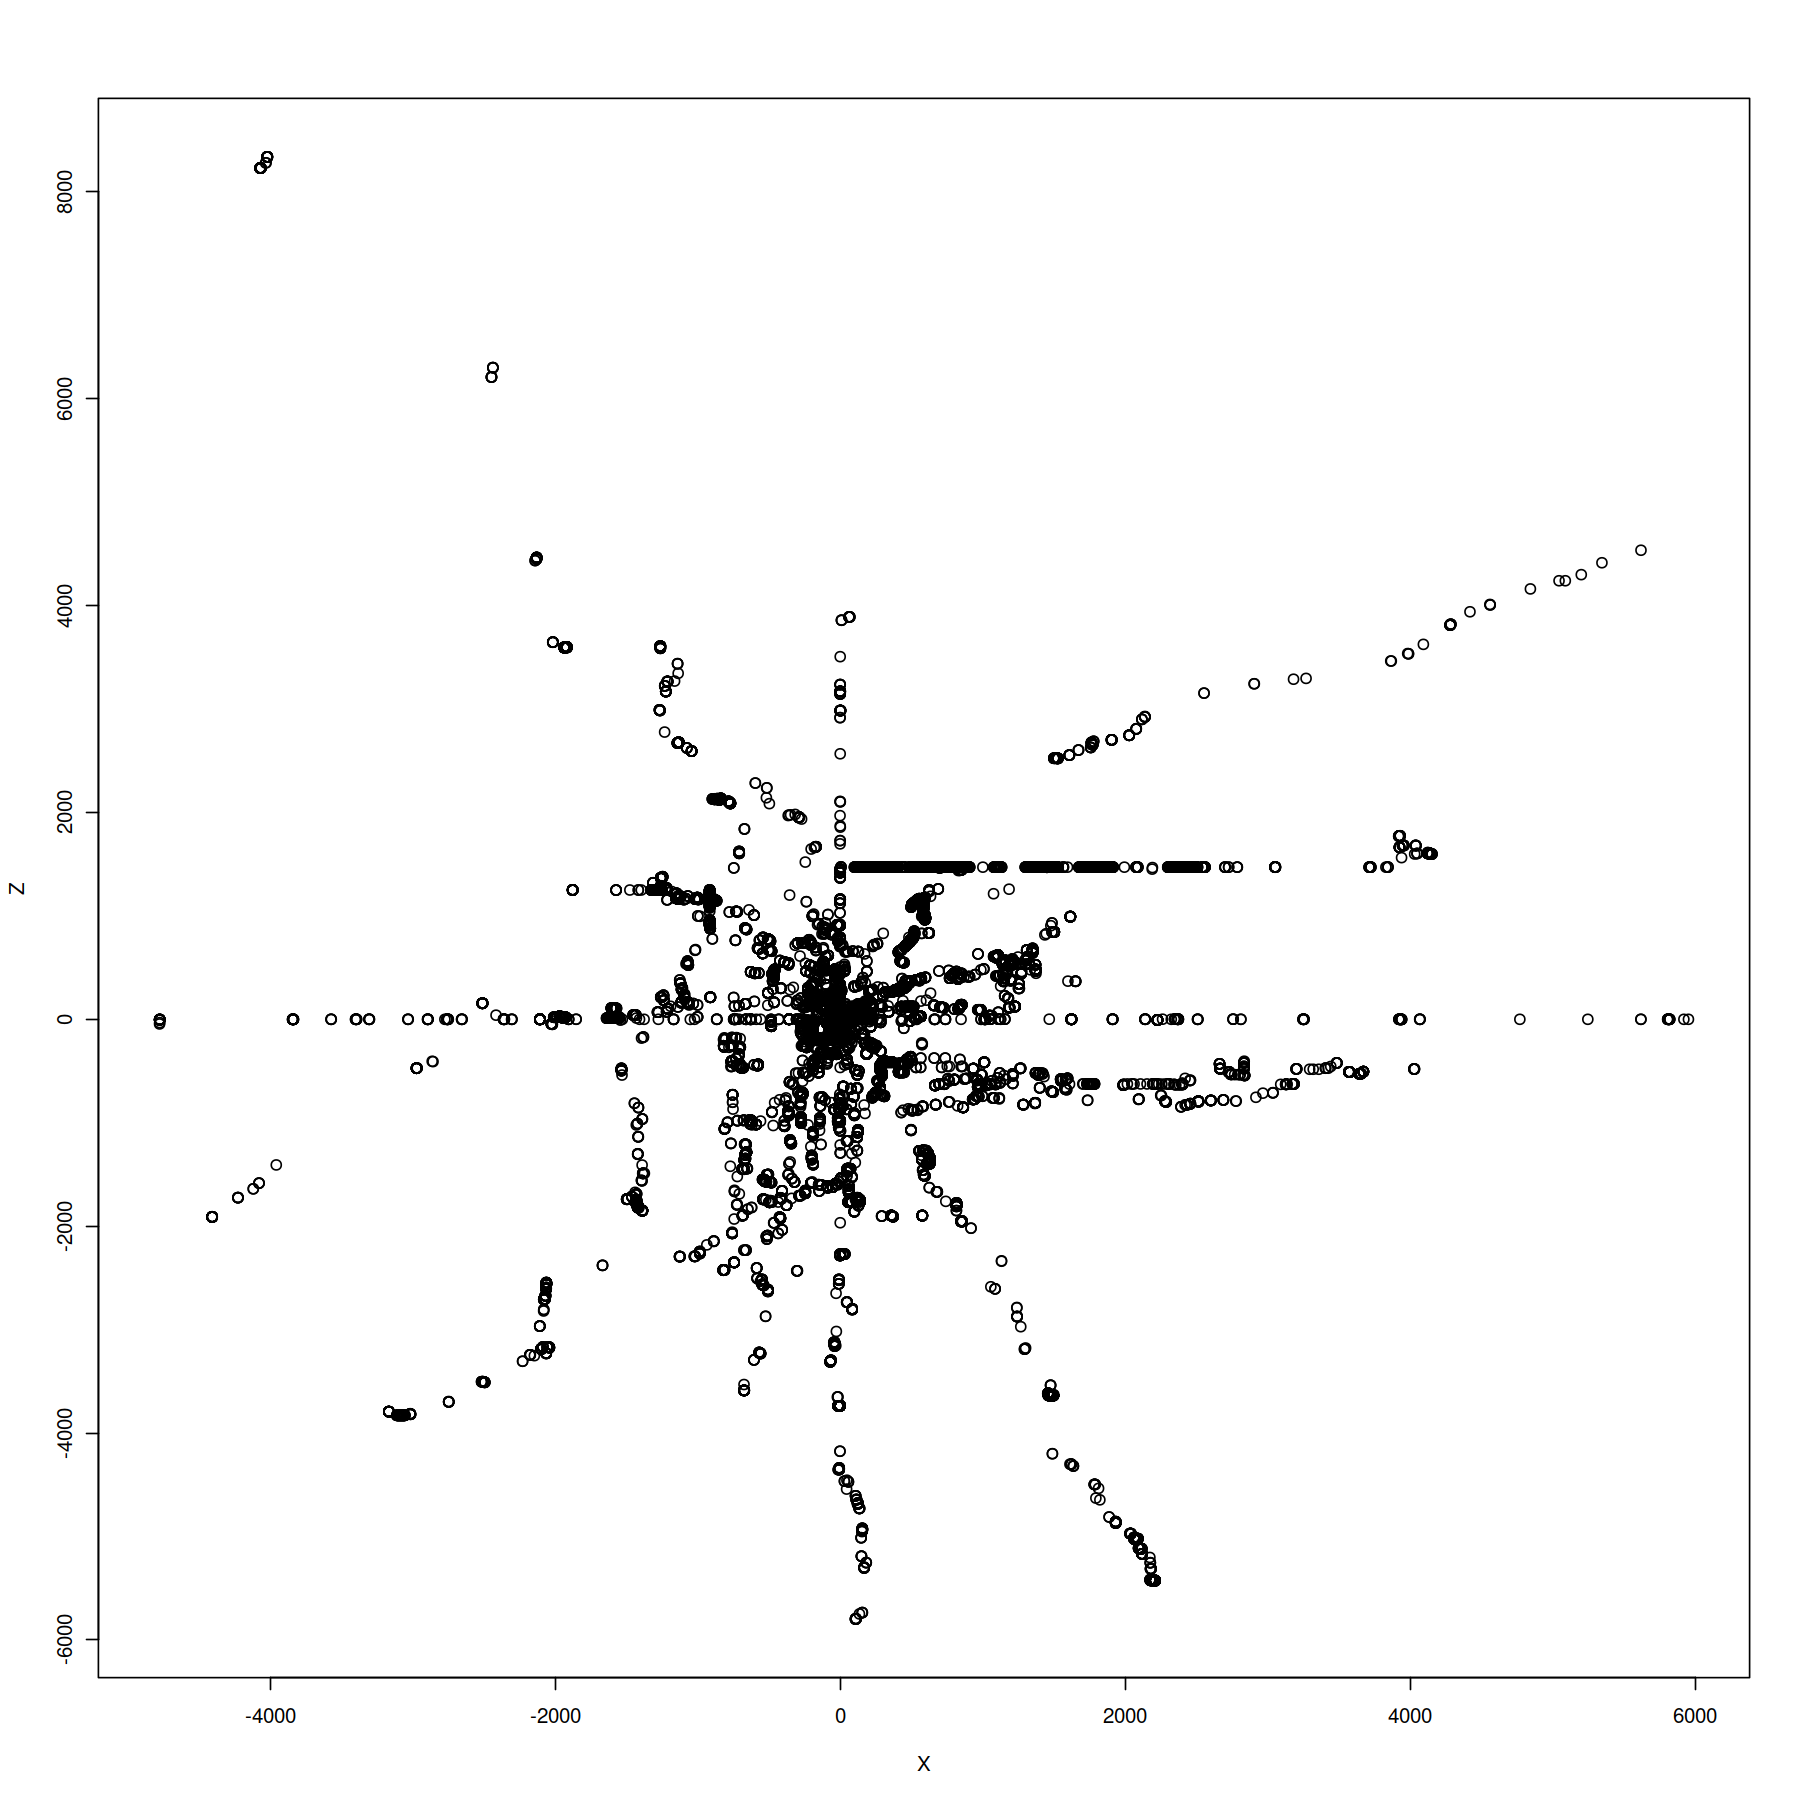

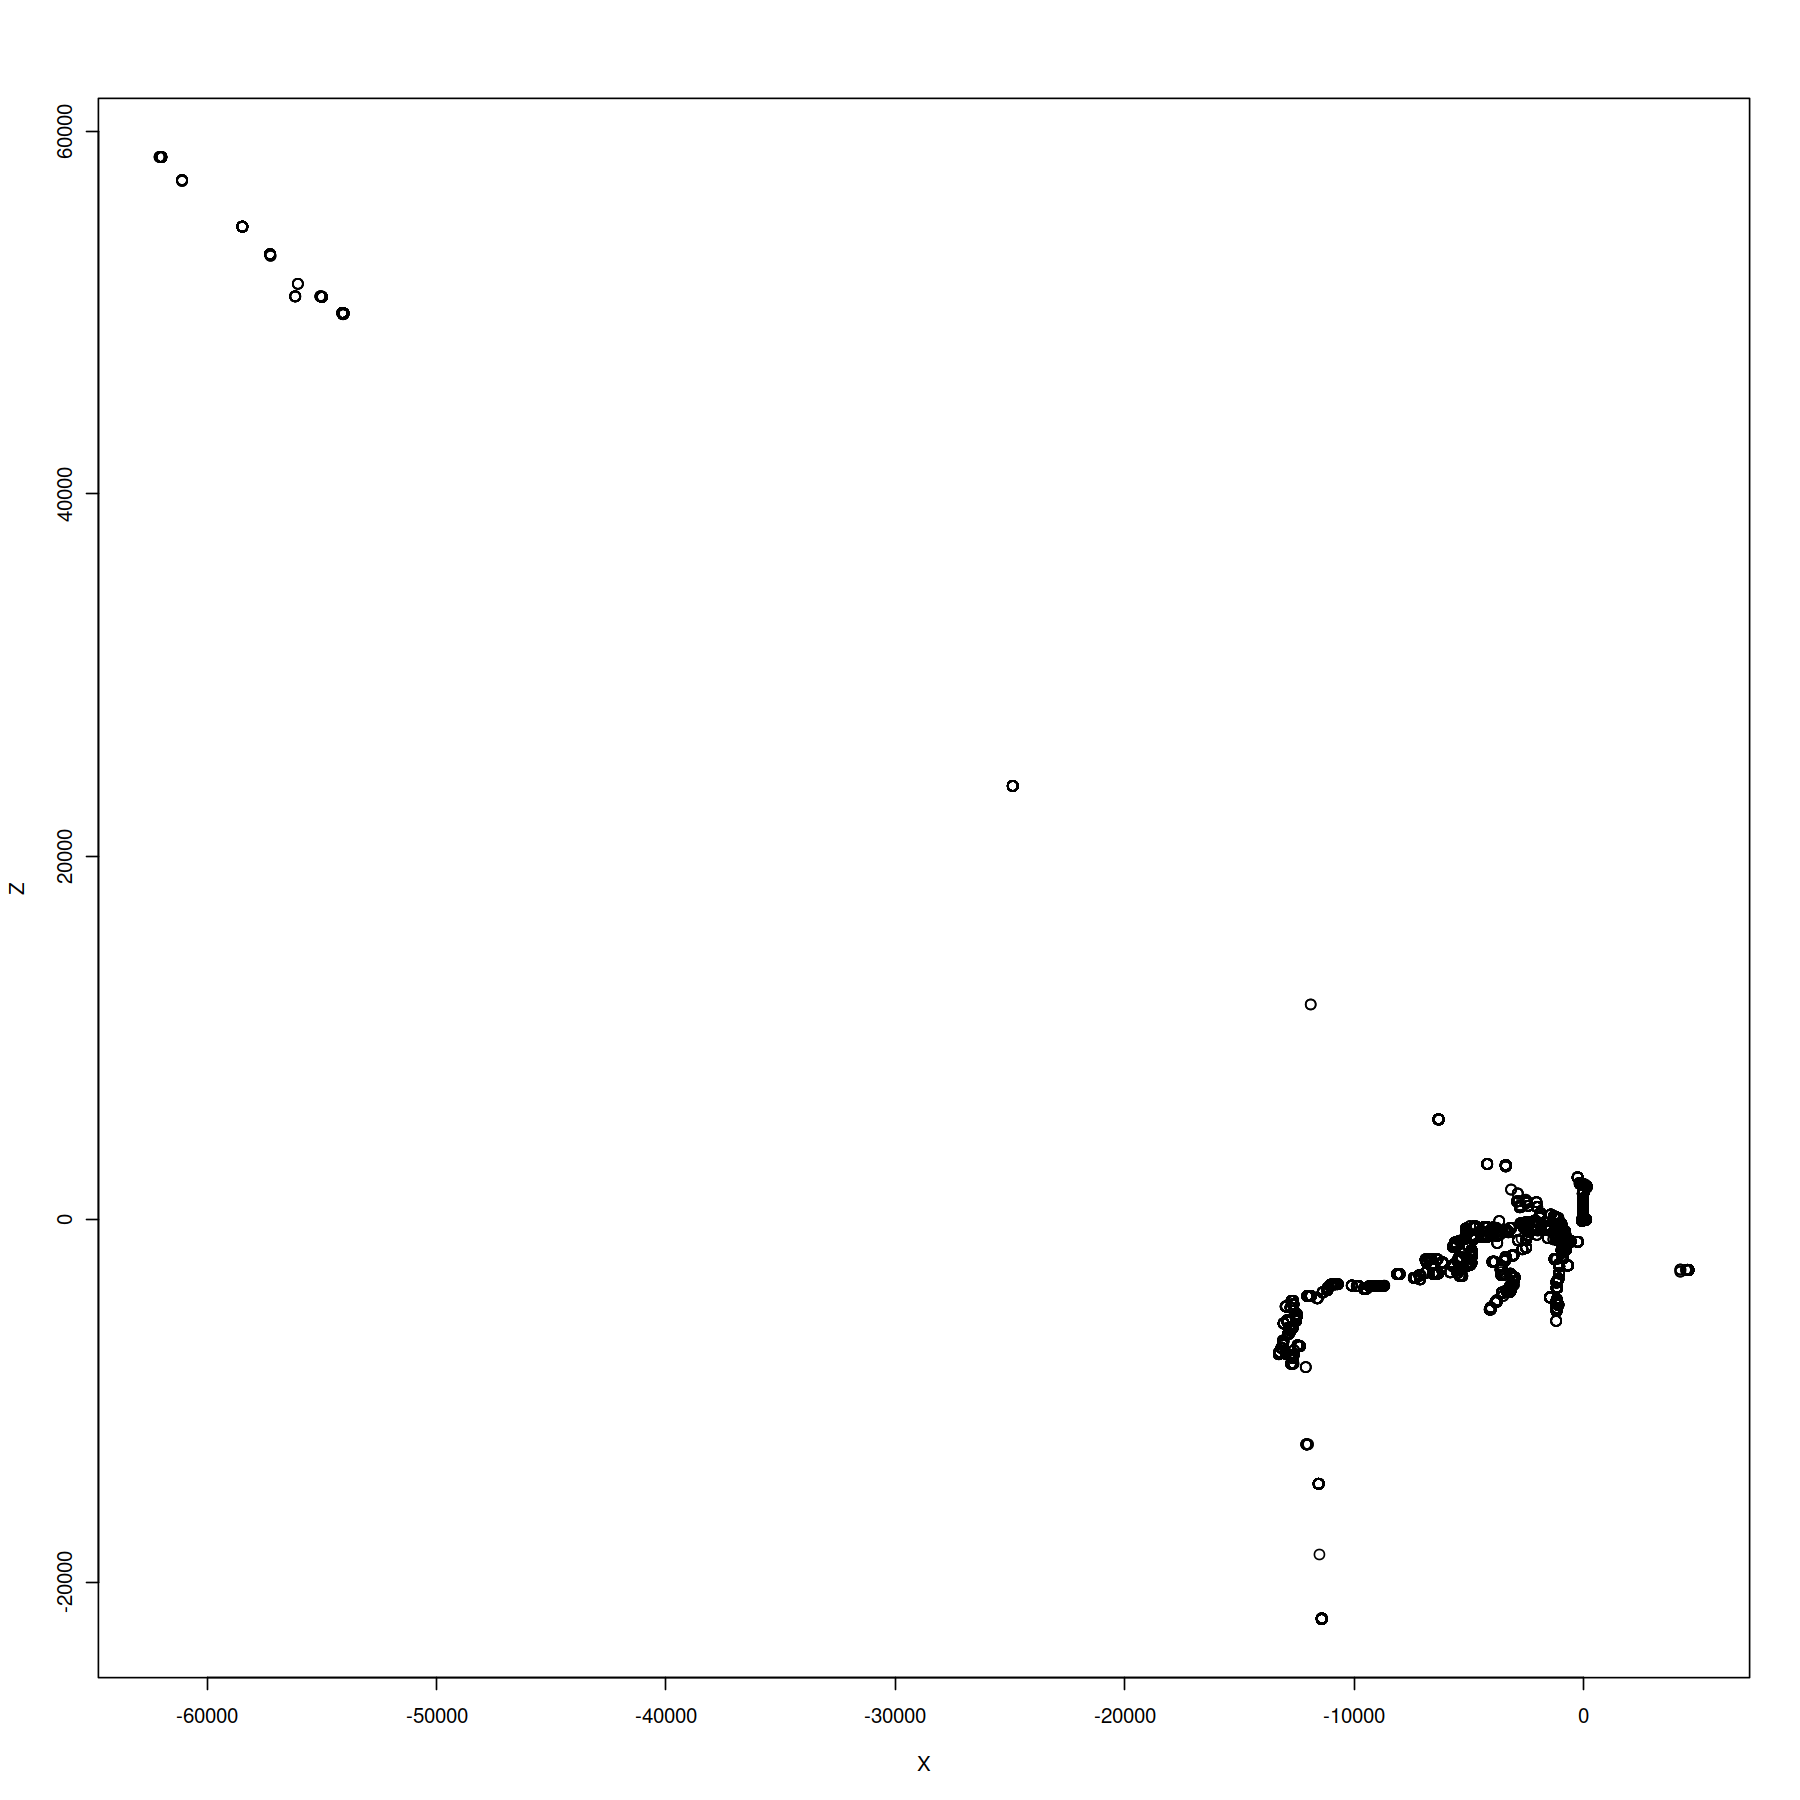

In [15]:
options(repr.plot.height=15, repr.plot.width=15)
plot(place_data[place_data$dimension=="nether",]$x, place_data[place_data$dimension=="nether",]$z, xlab="X", ylab="Z")
plot(place_data[place_data$dimension=="end",]$x, place_data[place_data$dimension=="end",]$z, xlab="X", ylab="Z")

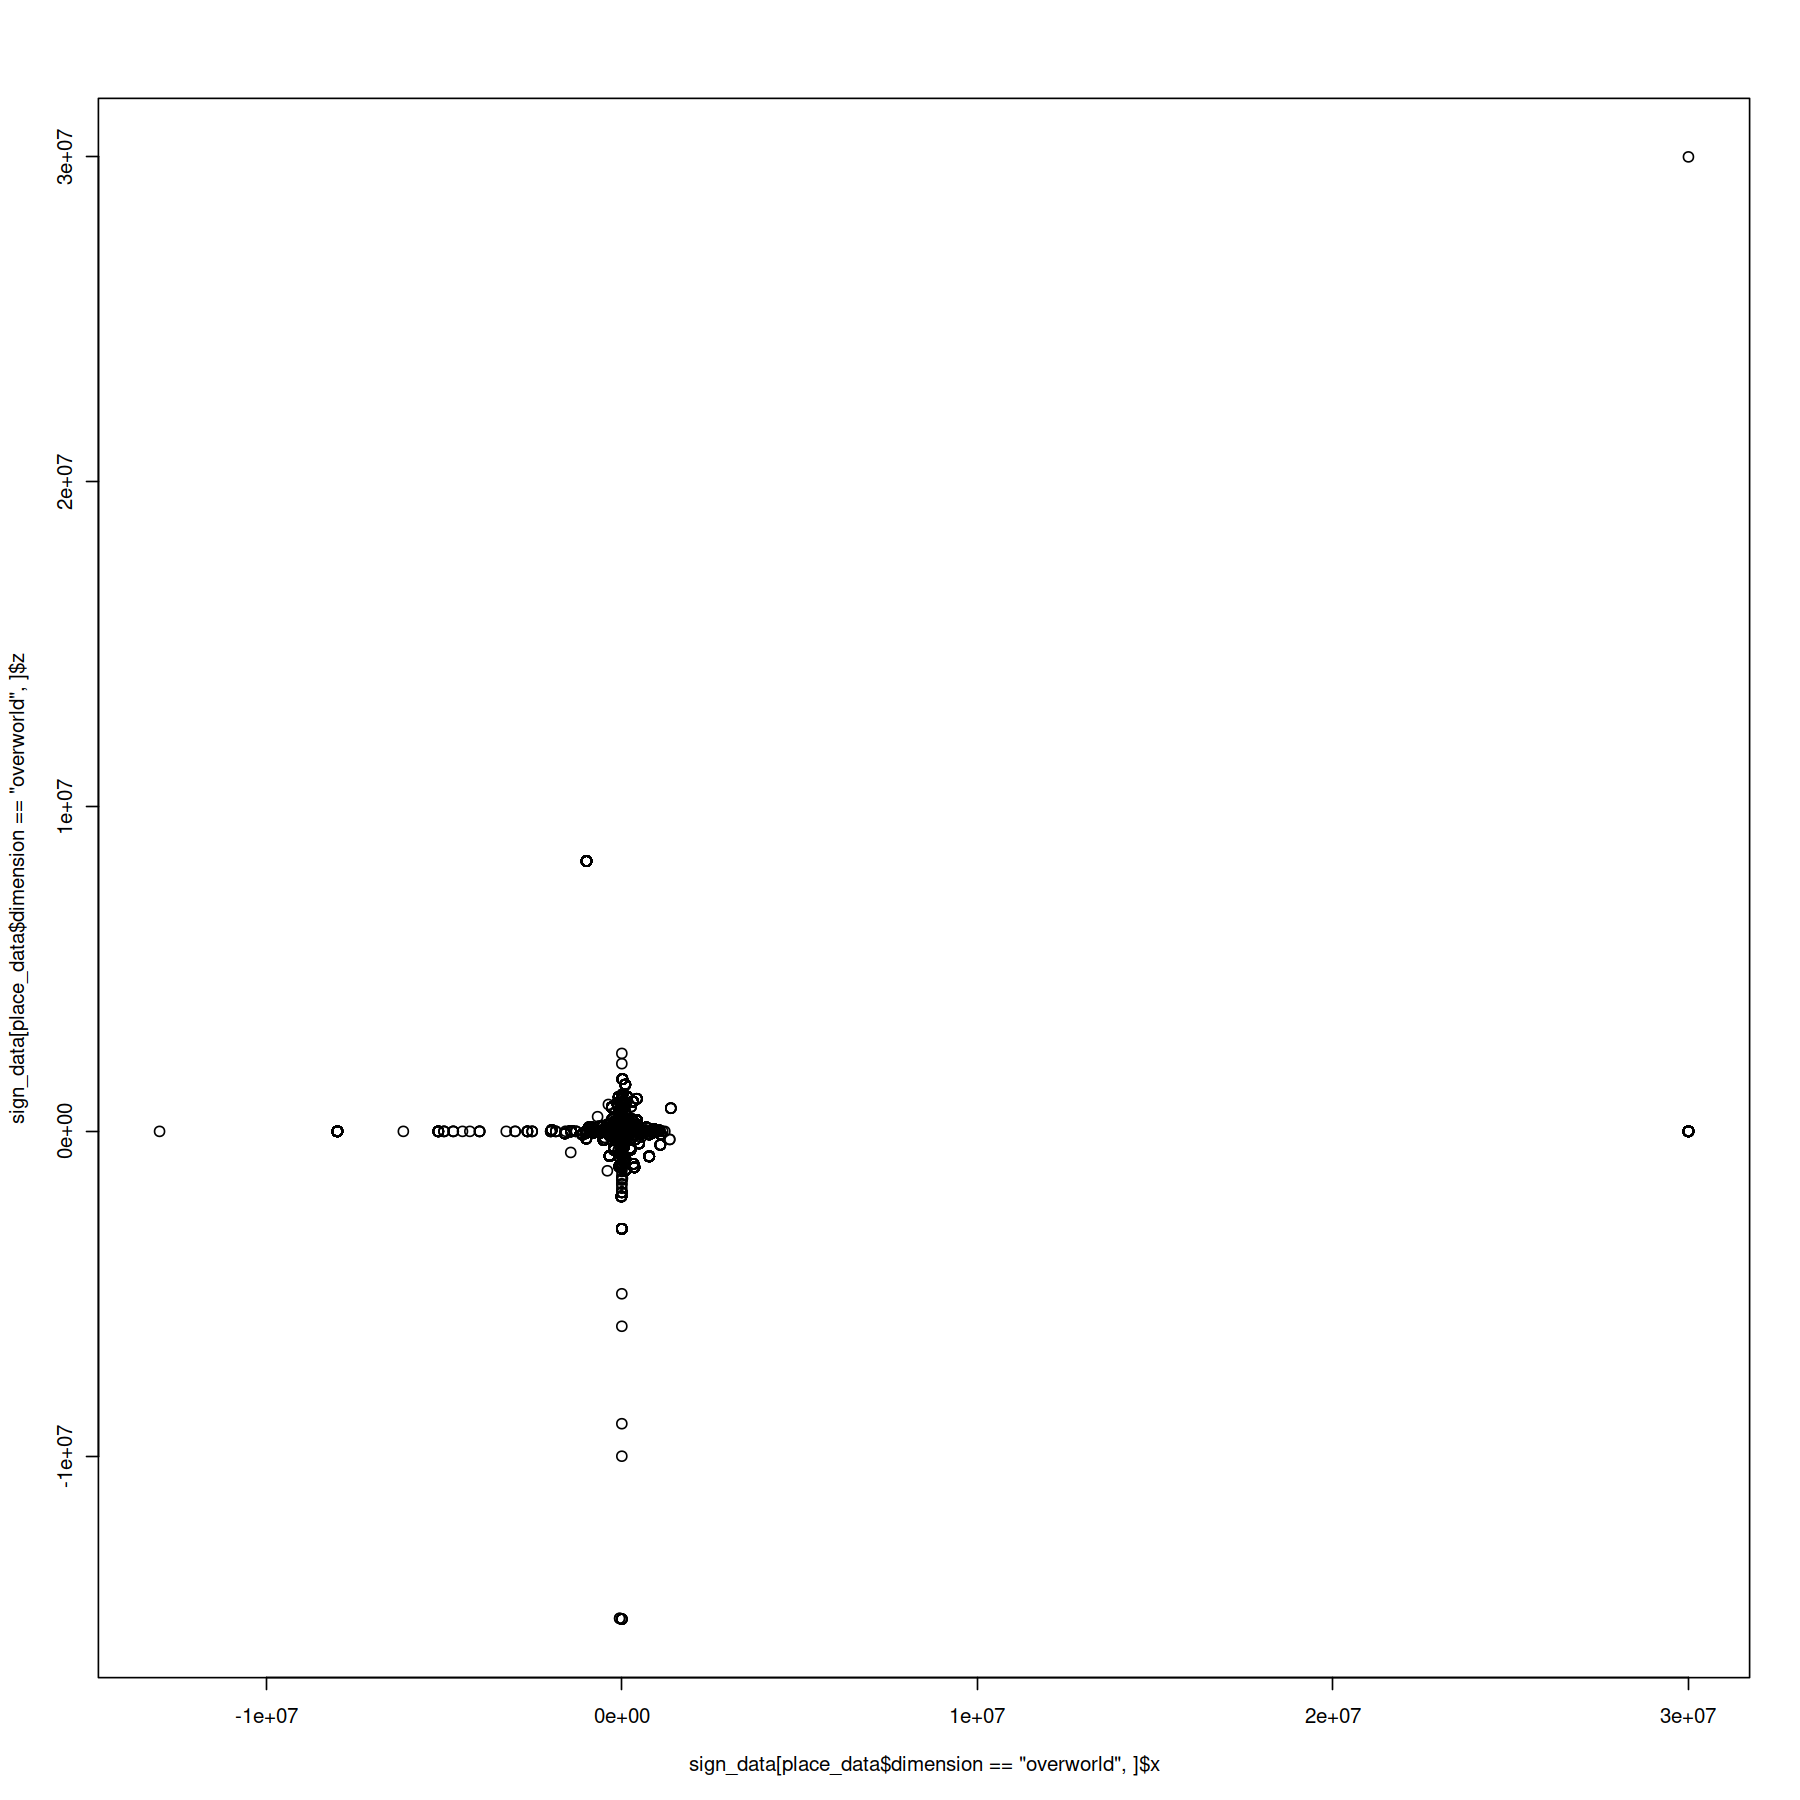

In [16]:
#overworld sign placements
plot(sign_data[place_data$dimension=="overworld",]$x, sign_data[place_data$dimension=="overworld",]$z)

In [19]:
sign_data[sign_data$x>30000000,]$text

factor(0)
50579 Levels:                                                  ... \xd6         \xd6 ^ _______

In [21]:
#clustering overworld placement coordinates
#we're goint to use complete clustering to avoid long tails
#This could take awhile to process so let's get it right
overworld_placements <- place_data[place_data$dimension=="overworld",]


distances <- dist(overworld_placements[,5:6], method="euclidean")


clusters <- hclust(distances, method="complete")
plot(clusters)

ERROR: Error: cannot allocate vector of size 3386.1 Gb


In [22]:
length(unique(place_data$user))

[1] 689

In [24]:
#new clustering appraoch. We run kmeans on it and then run hierarchical on that. We'lll use kmeans with 689 clusters
kclust <- kmeans(overworld_placements[, 5:6], 689, nstart=10, iter.max=20)

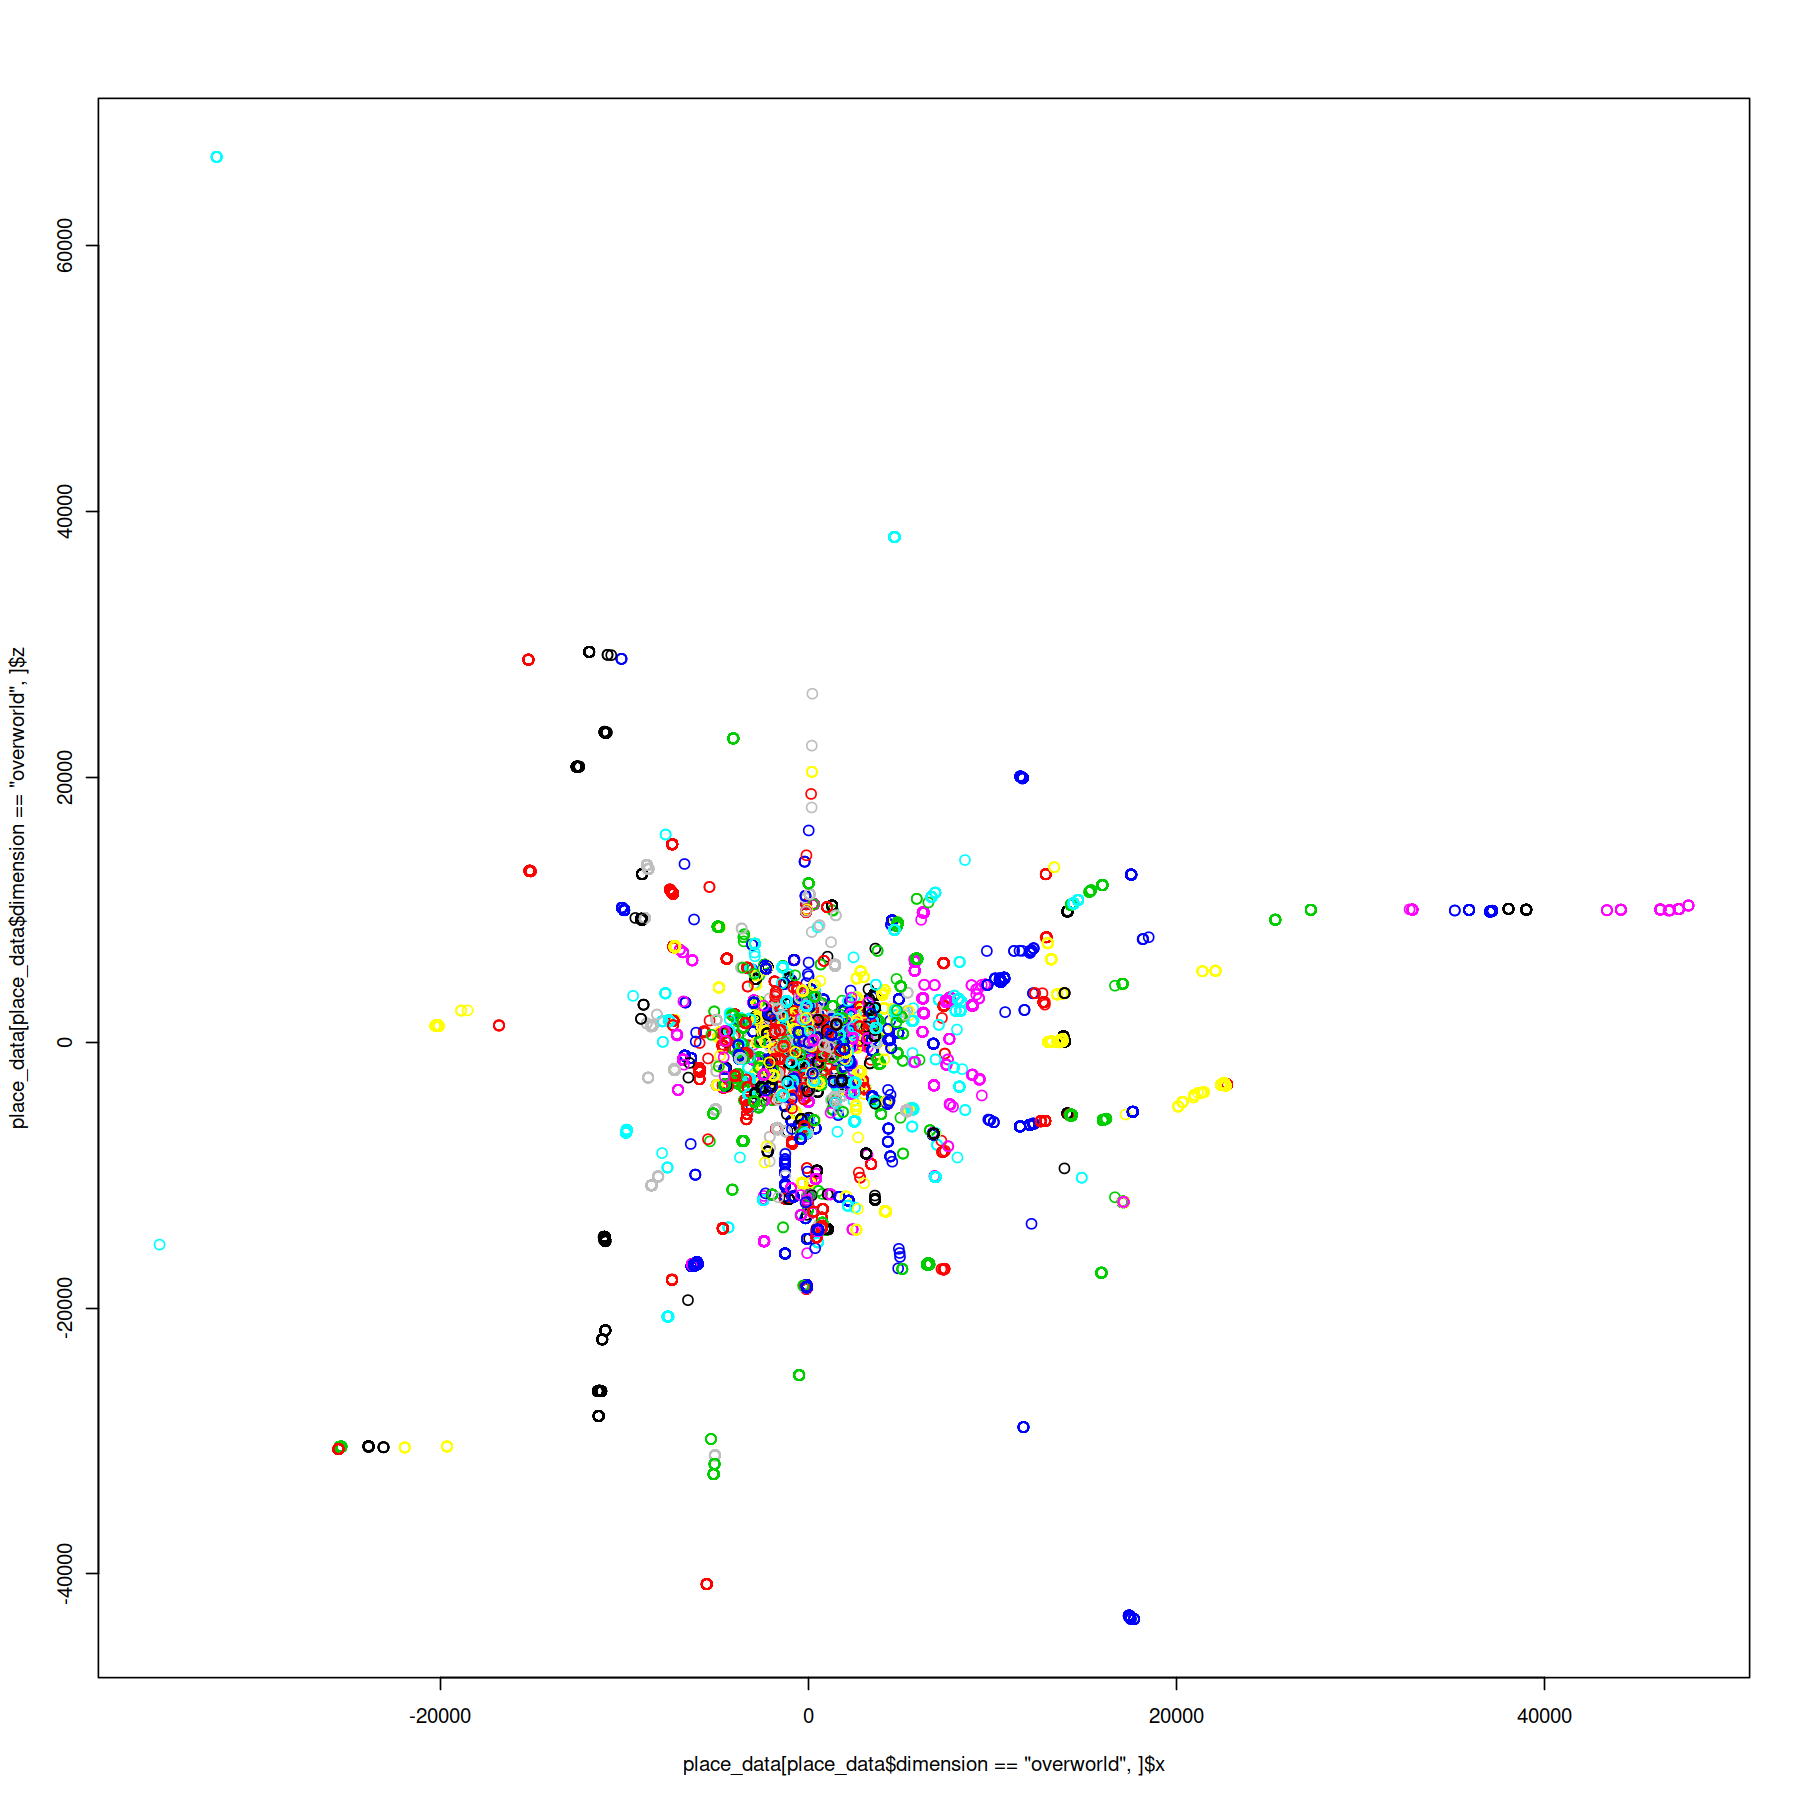

In [26]:
plot(place_data[place_data$dimension=="overworld",]$x, place_data[place_data$dimension=="overworld",]$z, col=kclust$cluster)

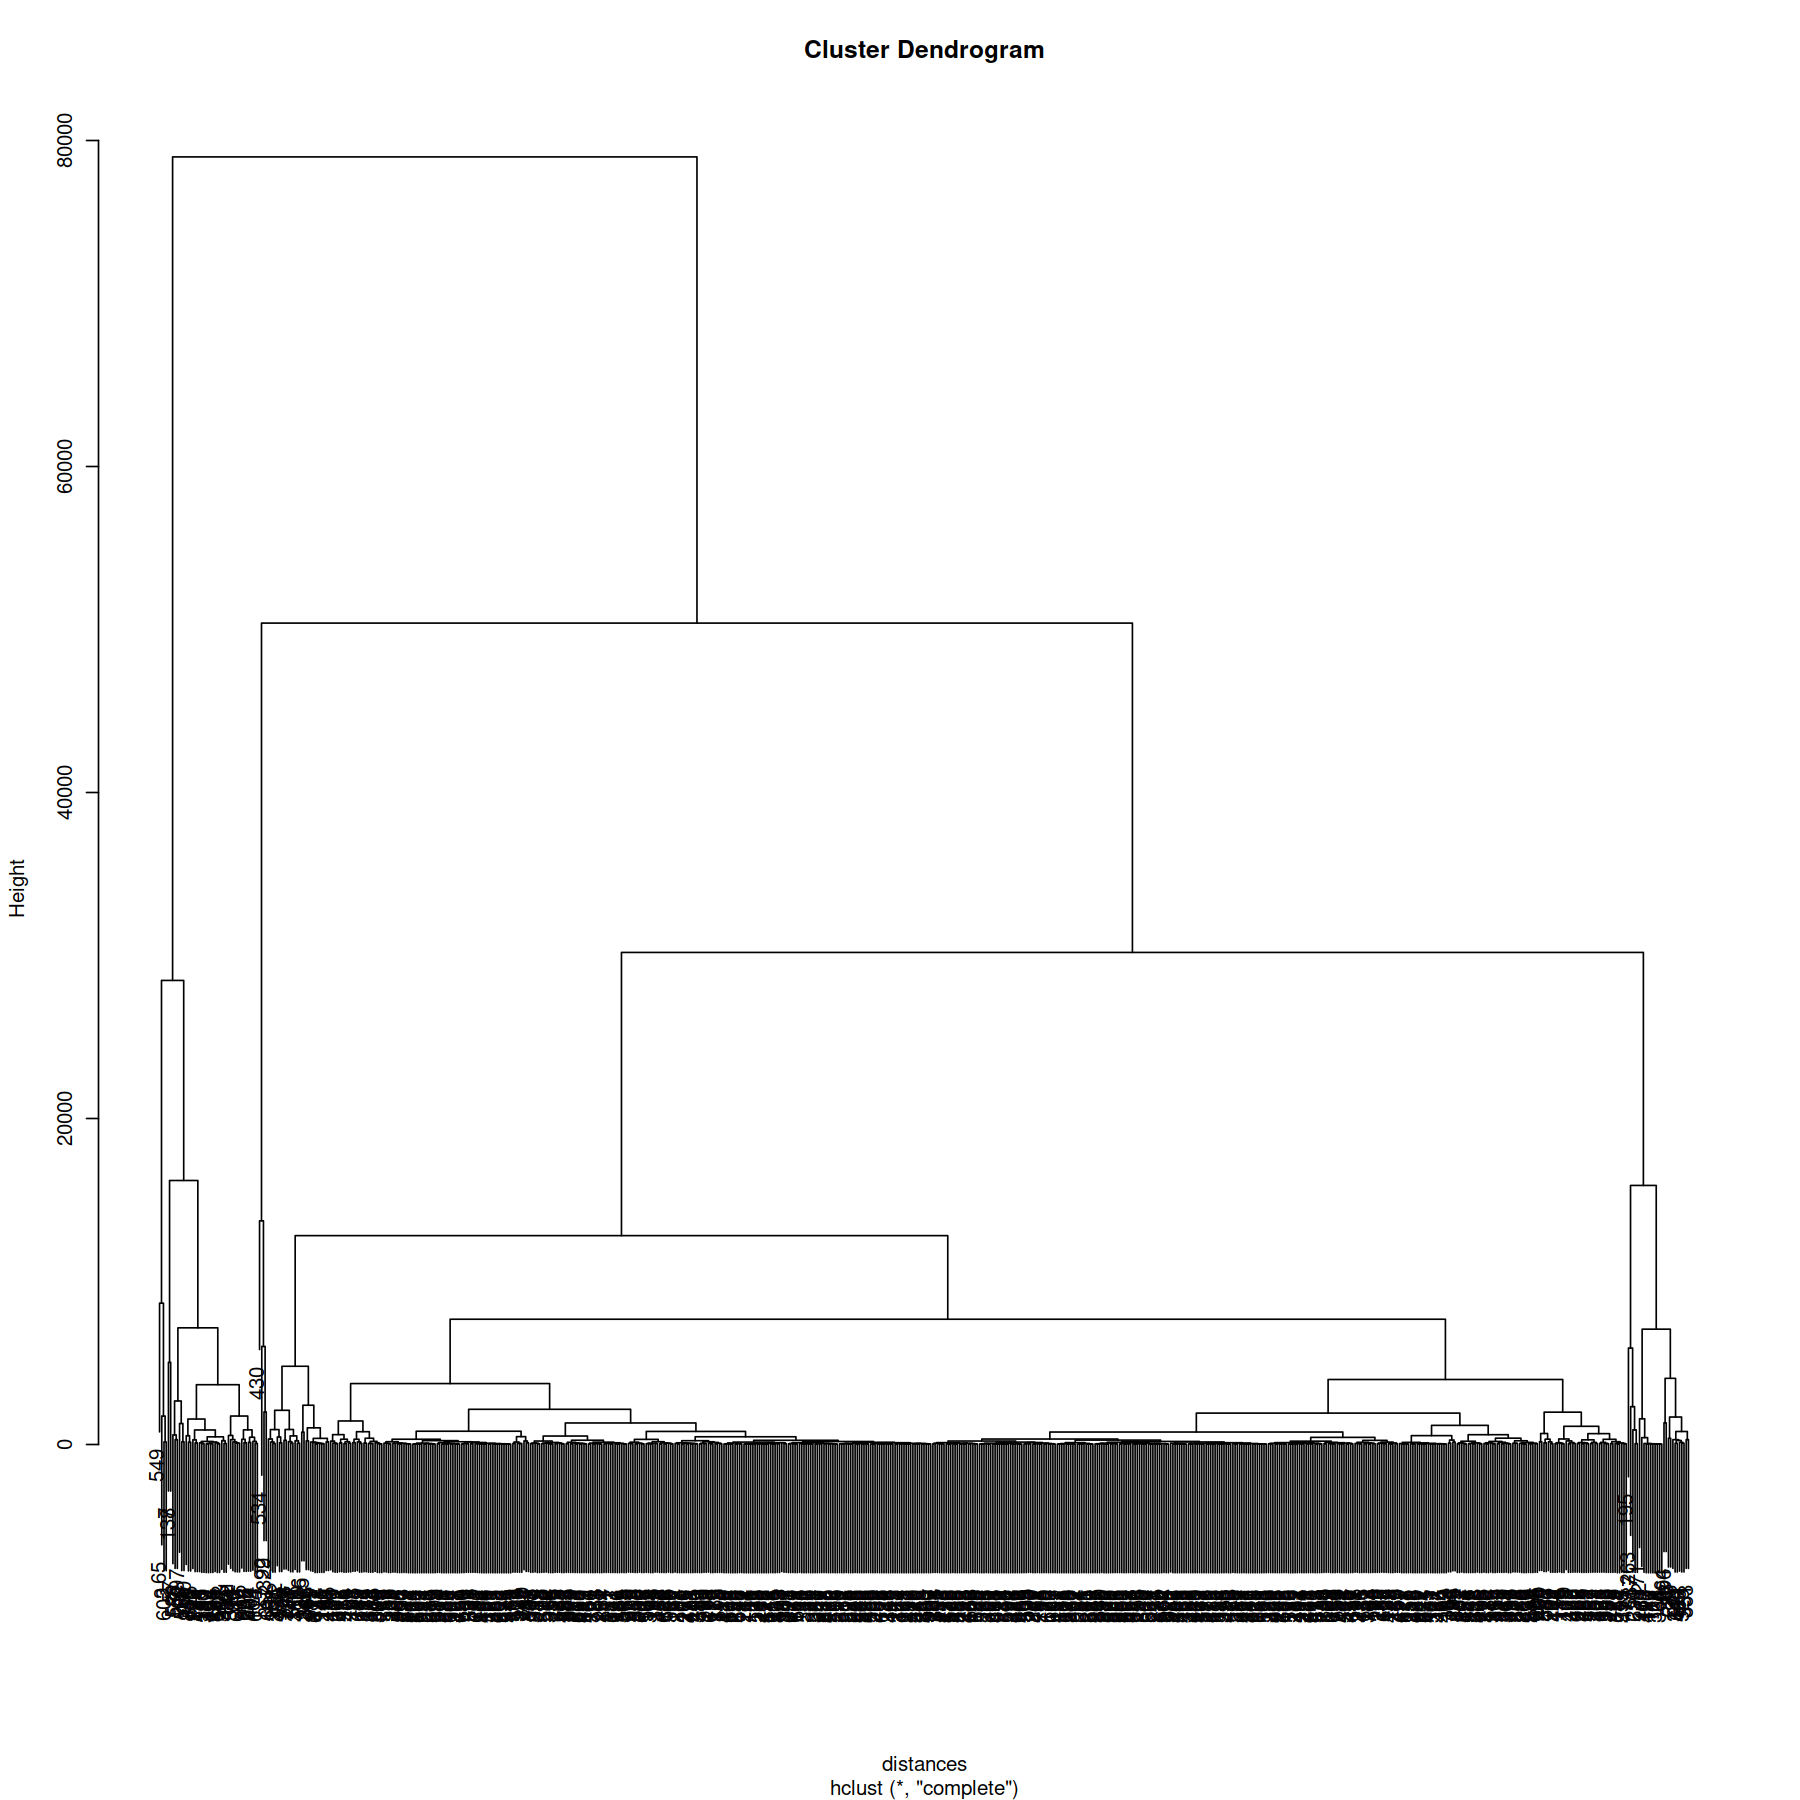

In [27]:
distances <- dist(kclust$centers, method="euclidean")


clusters <- hclust(distances, method="complete")
plot(clusters)

                  time                      user       
 2020-02-08 10:24:06:   597   Check9light     :246342  
 2020-02-08 10:24:07:   591   GermanEngineer12:234062  
 2020-02-08 10:33:16:   565   artofcroissant  :123579  
 2020-02-08 05:50:12:   562   lavablade02     : 92888  
 2020-02-07 21:03:57:   539   CommaDotNight   : 26870  
 2020-02-08 08:10:48:   533   Ovechkin_       : 17929  
 (Other)            :996613   (Other)         :258330  
              block            dimension            x           
 stationary_water:456432   overworld:953392   Min.   :-62073.0  
 stationary_lava :253801   nether   : 20731   1st Qu.: -1317.0  
 lava            : 88494   end      : 25877   Median :     2.0  
 cobblestone     : 58813                      Mean   :   544.3  
 water           : 52369                      3rd Qu.:  1496.0  
 leaves          : 15567                      Max.   : 47797.0  
 (Other)         : 74524                                        
       y                z       

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       6      51    1451     284  246342 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


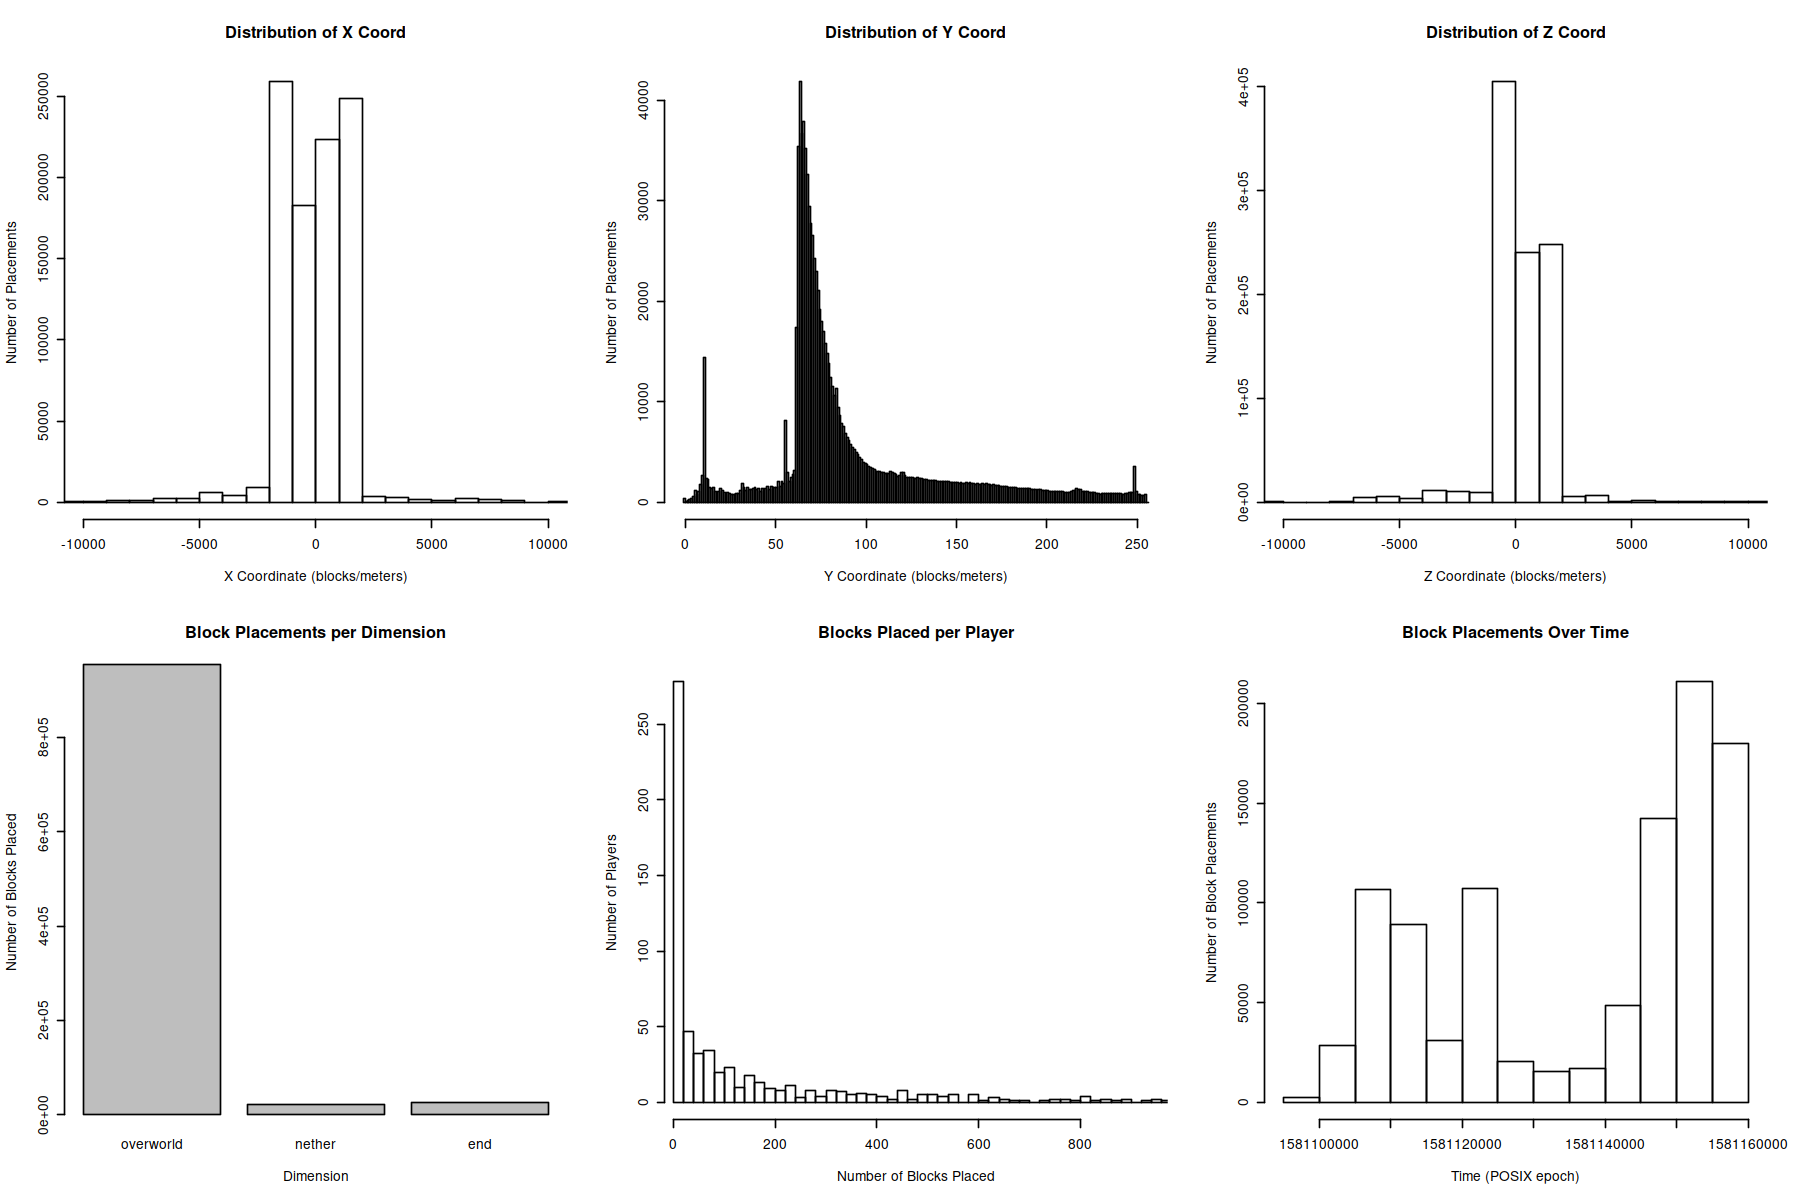

In [134]:
summary(place_data)

par(mfrow = c(2,3))
options(repr.plot.height=10, repr.plot.width=15, cex.main=5, cex.lab=5, cex.axis=5)


#placement coordinates
hist(place_data$x, xlim=c(-10000, 10000), breaks=(-20000:20000)*1000, main="Distribution of X Coord",
    ylab="Number of Placements", xlab="X Coordinate (blocks/meters)")
hist(place_data$y, xlim=c(-1, 256), breaks=(-1:256), main="Distribution of Y Coord",
    ylab="Number of Placements", xlab="Y Coordinate (blocks/meters)")
hist(place_data$z, xlim=c(-10000, 10000), breaks=(-20000:20000)*1000, main="Distribution of Z Coord",
    ylab="Number of Placements", xlab="Z Coordinate (blocks/meters)")

#placement category: dimension
plot(place_data$dimension, main="Block Placements per Dimension", ylab="Number of Blocks Placed", xlab="Dimension" )

#placement players
#places per player
ppp = count(place_data$user)$freq
#sort and plot the significant ones
summary(ppp)

#take only non-outliers by quartiles
#take only non-outliers by quartiles
hist(ppp, xlim=c(20, 933), breaks=(0:(250000/20)) * 20, main="Blocks Placed per Player",
    ylab="Number of Players", xlab="Number of Blocks Placed")

#time of block placement
place_epoch = as.integer(as.POSIXct(place_data$time) , tz = "EST")
hist(place_epoch, xlab="Time (POSIX epoch)", ylab="Number of Block Placements", main="Block Placements Over Time")

stationary_water     stationary_lava                lava         cobblestone 
             456432              253801               88494               58813 
              water              leaves          netherrack         ender_stone 
              52369               15567               13205                9889 
               dirt                wood               stone           workbench 
               8251                6858                5008                3422 
              torch               crops             furnace              gravel 
               3301                2986                1884                1838 
               soil                 log                fire                sand 
               1711                1613                1266                1154 
           obsidian              portal           wood_step    sugar_cane_block 
               1070                 910                 905                 801 
               step           bed_block             sapling         cobble_wall 
                476                 456                 456                 443 
          sandstone               chest       redstone_wire        smooth_brick 
                423                 372                 299                 274 
          bookshelf  cobblestone_stairs              potato        purpur_block 
                264                 254                 242                 240 
          sign_post            leaves_2              ladder       purpur_pillar 
                230                 208                 193                 187 
         end_bricks           wall_sign              carrot  spruce_wood_stairs 
                170                 169                 157                 155 
              rails          water_lily          note_block                wool 
                148                 140                 139                 133 
         thin_glass          melon_stem               log_2   enchantment_table 
                128                 123                 118                 100 
       nether_brick  purple_shulker_box      beetroot_block        double_plant 
                100                  99                  98                  88 
        piston_base            iron_ore              cactus          grass_path 
                 77                  70                  69                  62 
              glass           soul_sand         wooden_door               cocoa 
                 61                  57                  56                  54 
              anvil   mossy_cobblestone         birch_fence        quartz_block 
                 52                  48                  44                  44 
       pumpkin_stem         wood_button               fence         ender_chest 
                 38                  37                  35                  34 
         item_frame            red_rose        nether_warts nether_brick_stairs 
                 34                  33                  32                  25 
        spruce_door       dark_oak_door  ender_portal_frame        acacia_fence 
                 24                  22                  22                  20 
    diode_block_off            tripwire               lever           trap_door 
                 18                  18                  17                  14 
             hopper          birch_door      brown_mushroom            gold_ore 
                 13                  12                  12                  11 
      purpur_stairs         lapis_block    wood_double_step         double_step 
                 11                  10                  10                   9 
                tnt         acacia_door              carpet        nether_fence 
                  9                   8                   8                   8 
     diode_block_on                vine       yellow_flower             (Other) 
                  7               

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       6      41    7353     245  456432 

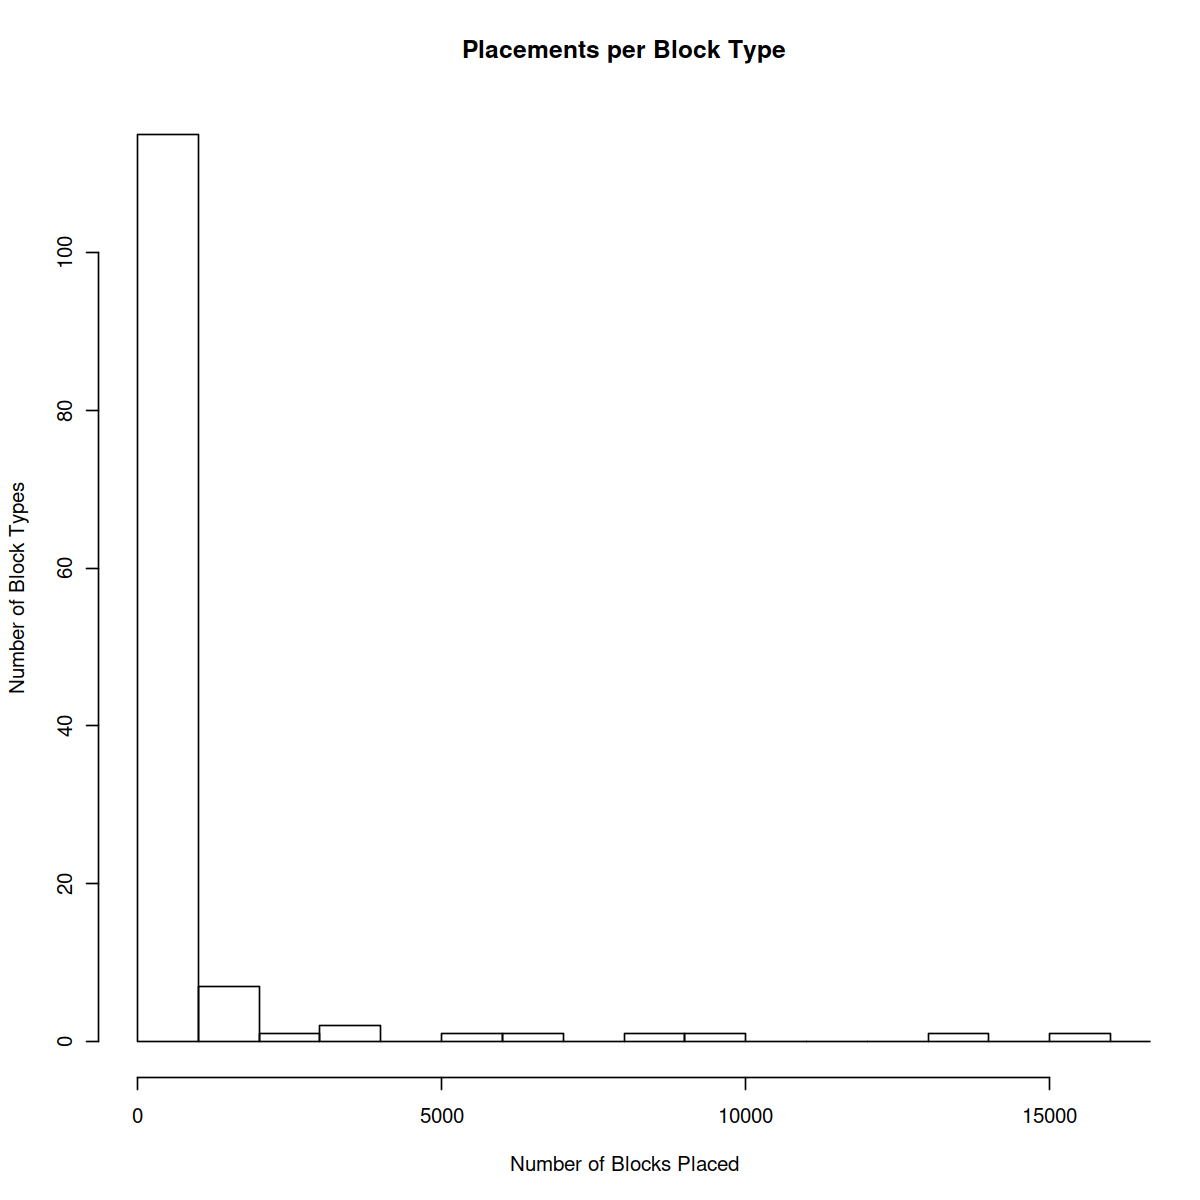

In [147]:
options(repr.plot.height=10, repr.plot.width=10, cex.main=5, cex.lab=5, cex.axis=5)

#block placement types
#placements per block
summary(place_data$block)
ppb = count(place_data$block)$freq
summary(ppb)
hist(ppb, xlim = c(0, 16000), breaks = (0:(460000/1000)) * 1000,
     main="Placements per Block Type", ylab="Number of Block Types", xlab="Number of Blocks Placed")

                  time                      user       
 2020-02-08 00:59:17:   182   GermanEngineer12: 56698  
 2020-02-08 01:11:13:   168   Infernoboy16    : 18184  
 2020-02-08 01:11:15:   163   lavablade02     : 17830  
 2020-02-08 01:01:34:   158   Check9light     : 17517  
 2020-02-08 12:27:06:   150   Kraftec         : 12668  
 2020-02-08 00:54:12:   149   Jakethasnake52  : 11752  
 (Other)            :999030   (Other)         :865351  
              block            dimension            x           
 stone           :313391   overworld:712977   Min.   :-85231.0  
 netherrack      :251692   nether   :269894   1st Qu.:  -633.0  
 lava            : 61495   end      : 17129   Median :     0.0  
 long_grass      : 47681                      Mean   :   228.4  
 stationary_water: 22022                      3rd Qu.:  1023.0  
 diamond_ore     : 21437                      Max.   : 61846.0  
 (Other)         :282282                                        
       y                z       

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    20.0   171.0   984.2   933.0 56698.0 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.581e+09 1.581e+09 1.581e+09 1.581e+09 1.581e+09 1.581e+09 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


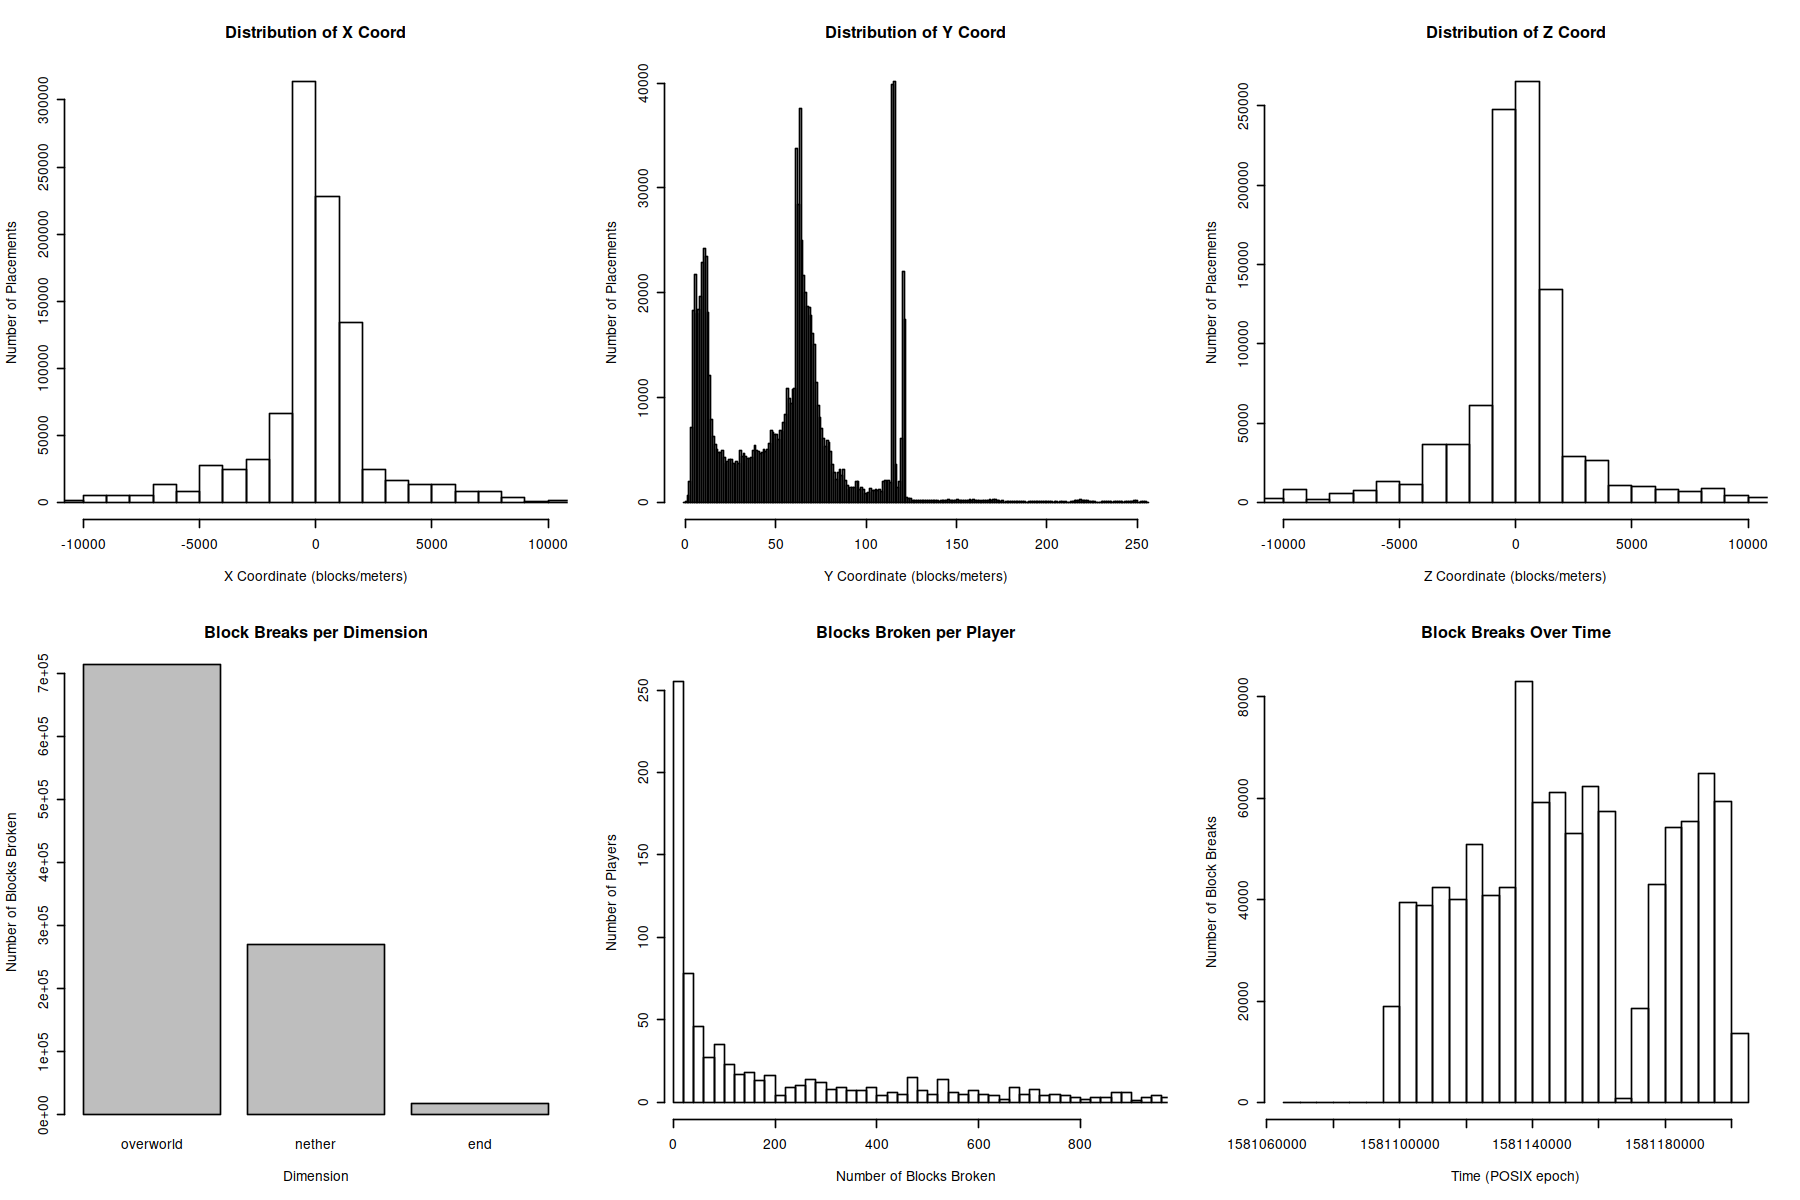

In [137]:
summary(break_data)

par(mfrow = c(2,3))
options(repr.plot.height=10, repr.plot.width=15, cex.main=5, cex.lab=5, cex.axis=5)


#break coordinates
hist(break_data$x, xlim=c(-10000, 10000), breaks=(-20000:20000)*1000, main="Distribution of X Coord",
    ylab="Number of Placements", xlab="X Coordinate (blocks/meters)")
hist(break_data$y, xlim=c(-1, 256), breaks=(-1:256), main="Distribution of Y Coord",
    ylab="Number of Placements", xlab="Y Coordinate (blocks/meters)")
hist(break_data$z, xlim=c(-10000, 10000), breaks=(-20000:20000)*1000, main="Distribution of Z Coord",
    ylab="Number of Placements", xlab="Z Coordinate (blocks/meters)")

#dimension of break
plot(break_data$dimension, main="Block Breaks per Dimension", ylab="Number of Blocks Broken", xlab="Dimension" )

#break players
#breaks per player
ppp = count(break_data$user)$freq
#sort and plot the significant ones
summary(ppp)

#take only non-outliers by quartiles
hist(ppp, xlim=c(20, 933), breaks=(0:(57000/20)) * 20, main="Blocks Broken per Player",
    ylab="Number of Players", xlab="Number of Blocks Broken")

#time of break
#time of block placement
place_epoch = as.integer(as.POSIXct(break_data$time) , tz = "EST")
summary(place_epoch)
hist(place_epoch, xlab="Time (POSIX epoch)", ylab="Number of Block Breaks", main="Block Breaks Over Time")

stone           netherrack                 lava 
              313391               251692                61495 
          long_grass     stationary_water          diamond_ore 
               47681                22022                21437 
                dirt             coal_ore                  log 
               21428                21277                18969 
            iron_ore               leaves                grass 
               18093                17827                15992 
               water          ender_stone          cobblestone 
               15489                12955                12519 
              gravel     sugar_cane_block           quartz_ore 
               10478                 8095                 8031 
     stationary_lava                log_2                 sand 
                7691                 7556                 7472 
               crops         double_plant             obsidian 
                6976                 3994                 3527 
           workbench      huge_mushroom_2                 vine 
                3394                 3338                 3319 
                snow             gold_ore      huge_mushroom_1 
                3301                 3153                 3025 
                fire               carrot glowing_redstone_ore 
                2787                 2757                 2520 
        nether_brick               potato            sandstone 
                2414                 2407                 2297 
           bookshelf            lapis_ore             leaves_2 
                1852                 1730                 1710 
                wood                torch              furnace 
                1645                 1526                  991 
         melon_block       brown_mushroom      burning_furnace 
                 938                  889                  872 
                 web         nether_warts       beetroot_block 
                 872                  850                  838 
   mossy_cobblestone         smooth_brick             red_rose 
                 708                  704                  698 
        purpur_block                magma            soul_sand 
                 660                  643                  592 
               chest           water_lily         red_mushroom 
                 484                  474                  417 
         mob_spawner            bed_block           end_bricks 
                 414                  411                  407 
             pumpkin        purpur_pillar                 step 
                 401                  373                  368 
       yellow_flower            dead_bush   purple_shulker_box 
                 368                  320                  314 
              cactus                  tnt                rails 
                 293                  290                  259 
       redstone_wire                cocoa            wood_step 
                 240                  238                  220 
              ladder            glowstone            sign_post 
                 218                  213                  177 
        nether_fence                  ice                 soil 
                 170                  167                  157 
          item_frame           note_block          ender_chest 
                 153                  143                  136 
        chorus_plant            wall_sign    enchantment_table 
                 135                  134                  126 
          melon_stem              sapling           grass_path 
                 126                  114                  113 
               fence                anvil          emerald_ore 
                  94                   90                   90 
                clay        stained_glass               carpet 
                  84                   84                   73 
         double_step                 wool   cob

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     1.0     14.0    126.0   5952.4    951.2 313391.0 

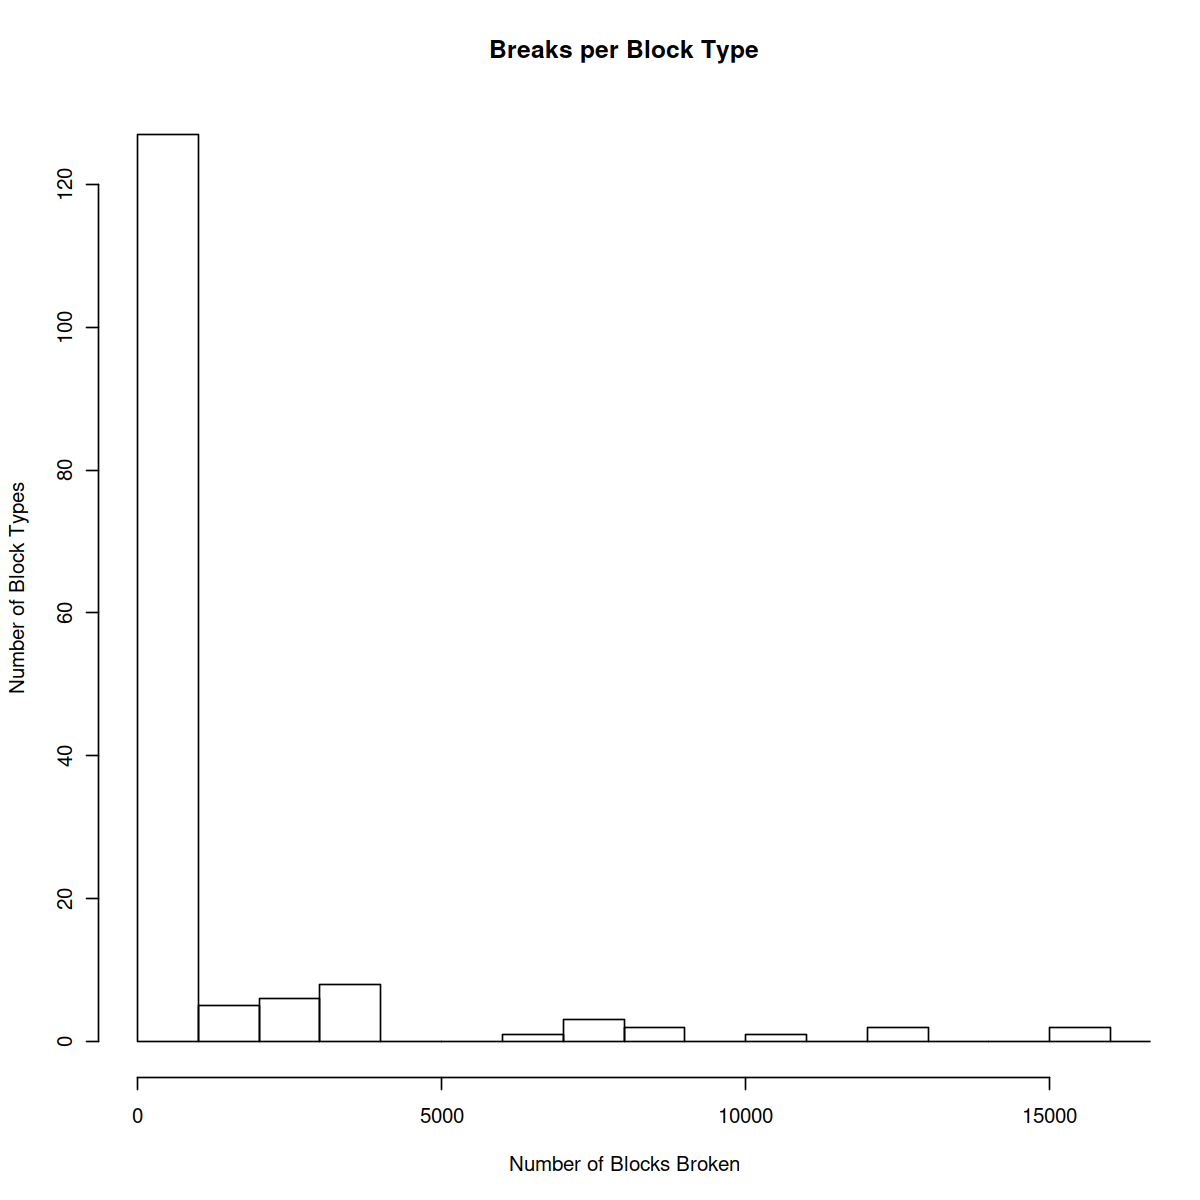

In [148]:
options(repr.plot.height=10, repr.plot.width=10, cex.main=5, cex.lab=5, cex.axis=5)

#block break types
#breaks per block
summary(break_data$block)
bpb = count(break_data$block)$freq
summary(bpb)
hist(bpb, xlim = c(0, 16000), breaks = (0:(460000/1000)) * 1000,
     main="Breaks per Block Type", ylab="Number of Block Types", xlab="Number of Blocks Broken")

                  time                   user      
 2020-03-25 17:31:35:    12   CactusDuper  : 1088  
 2020-04-04 18:03:35:    12   ShatteredHej :  833  
 2020-03-23 16:56:39:    10   SmashyMC     :  750  
 2020-03-24 13:33:30:    10   Temantor     :  704  
 2020-03-24 13:33:32:    10   ClareBear0925:  544  
 2020-03-24 13:33:42:    10   Fobba        :  530  
 (Other)            :101983   (Other)      :97598  
                                                               text      
 sal is cute                                                     : 1038  
 e                                                               :  446  
 tip:if there isnt a snow to spam on just move him slightly till :  322  
 w                                                               :  307  
 123456478957398 893475893758937 734563875637856 874356783563875 :  280  
  Valley of signs                                                :  265  
 (Other)                                                         :

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00   12.09   11.00 1088.00 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.581e+09 1.582e+09 1.584e+09 1.584e+09 1.585e+09 1.587e+09 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


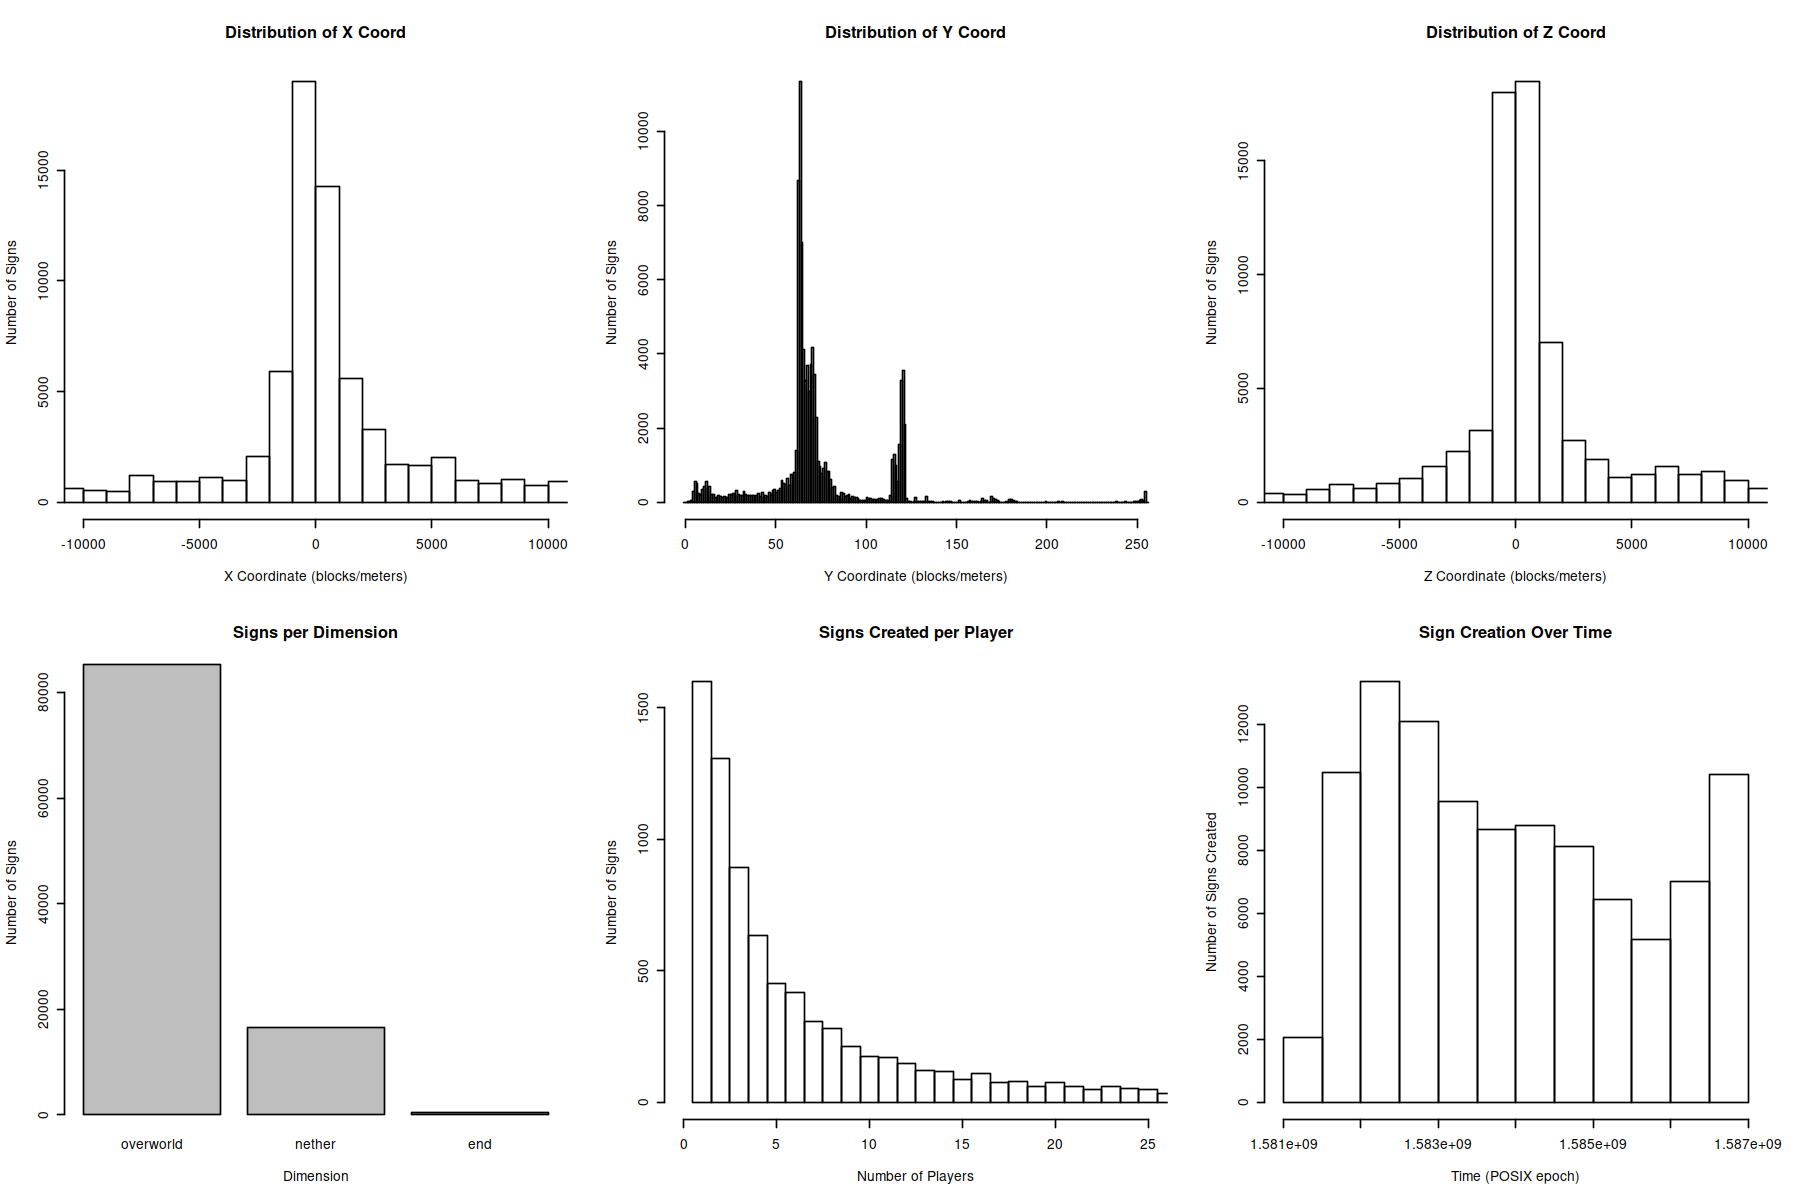

In [132]:
#sign_data placements
summary(sign_data)

#position
#we try to get rid of outliers. I don't think it works but that's fine because we use limits
left = -200000000
right = 200000000
par(mfrow = c(2,3))
options(repr.plot.height=10, repr.plot.width=15, cex.main=5, cex.lab=5, cex.axis=5)
hist(sign_data$x[sign_data$x >= left & sign_data$x <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of X Coord",
    ylab="Number of Signs", xlab="X Coordinate (blocks/meters)")
hist(sign_data$y, xlim=c(-1, 256), breaks=(-1:256), main="Distribution of Y Coord",
    ylab="Number of Signs", xlab="Y Coordinate (blocks/meters)")
hist(sign_data$z[sign_data$z >= left & sign_data$z <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of Z Coord",
    ylab="Number of Signs", xlab="Z Coordinate (blocks/meters)")
#dimension
plot(sign_data$dimension, main="Signs per Dimension", ylab="Number of Signs", xlab="Dimension" )

#signs per player
spp = count(sign_data$user)$freq
#sort and plot the significant ones
summary(spp)

#we do some work with the limits and breaks here
hist(spp, breaks=0.5:1088.5, xlim=c(0, 25), main="Signs Created per Player",
    ylab="Number of Signs", xlab="Number of Players")

#sign placements over time
place_epoch = as.integer(as.POSIXct(sign_data$time) , tz = "EST")
summary(place_epoch)
hist(place_epoch, xlab="Time (POSIX epoch)", ylab="Number of Signs Created", main="Sign Creation Over Time")


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.581e+09 1.582e+09 1.584e+09 1.584e+09 1.585e+09 1.587e+09 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


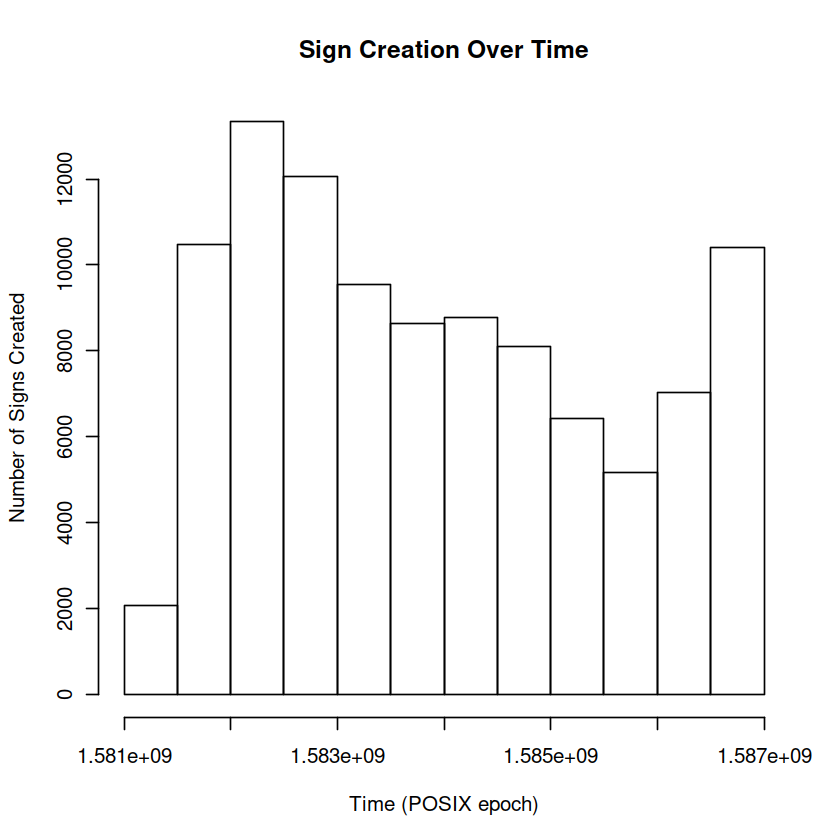

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    2.000    2.018    2.000 1038.000 

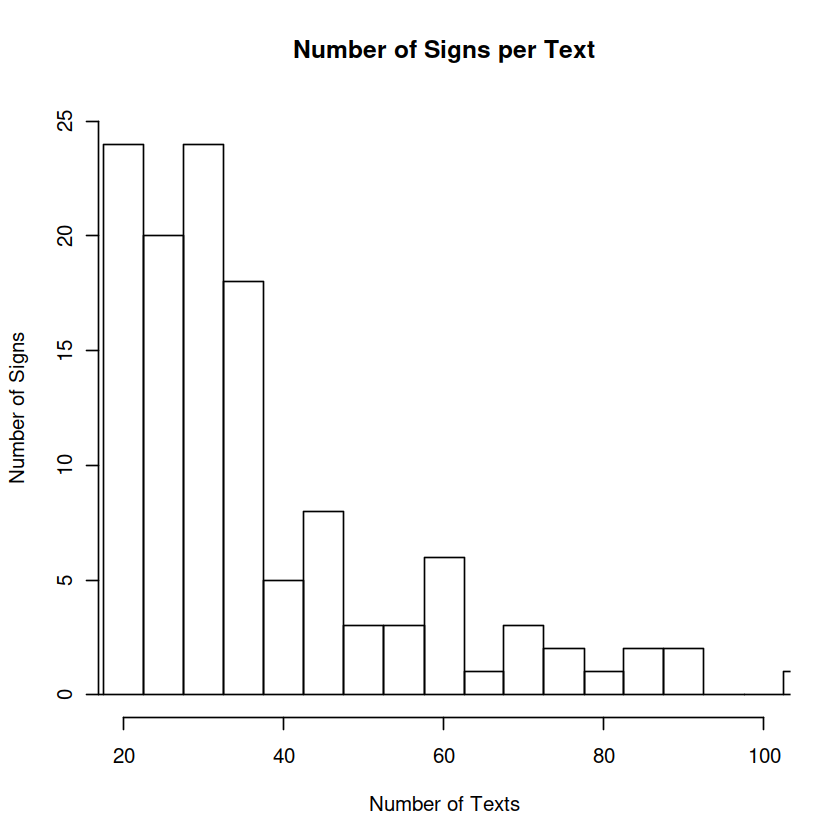

In [119]:
#sign text. We take only the categories with a significant number of values
#we'll conveniently be censoring the text the same way we censor player names
#signs per word
spw = count(sign_data$text)$freq
summary(spw)
hist(spw[spw>20], xlim=c(20, 100), breaks=(0.5:(1039/5 + 1)) * 5, ylim=c(0, 25),
    main="Number of Signs per Text", ylab="Number of Signs", xlab="Number of Texts")

                  time                user        action      
 2020-02-22 08:41:12:   150   SyJay18   :  7835   out:480051  
 2020-02-12 19:42:37:   127   BeefCity  :  5147   in :489643  
 2020-02-14 23:31:12:   127   Fetopia   :  4623               
 2020-02-08 13:38:00:   125   moooomoooo:  4524               
 2020-02-26 17:42:34:   125   BentsiW   :  4078               
 2020-02-26 17:55:00:   125   k3b       :  2861               
 (Other)            :968915   (Other)   :940626               
     dimension            x                   y                  z            
 overworld:772280   Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 nether   :190425   1st Qu.:     -753   1st Qu.:   61.00   1st Qu.:     -481  
 end      :  6989   Median :        4   Median :   66.00   Median :       17  
                    Mean   :     8117   Mean   :   74.23   Mean   :    -5068  
                    3rd Qu.:     2673   3rd Qu.:   79.00   3rd Qu.:     2320  
                    Ma

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    6.00   29.11   16.00 7835.00 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.581e+09 1.582e+09 1.584e+09 1.584e+09 1.585e+09 1.587e+09 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


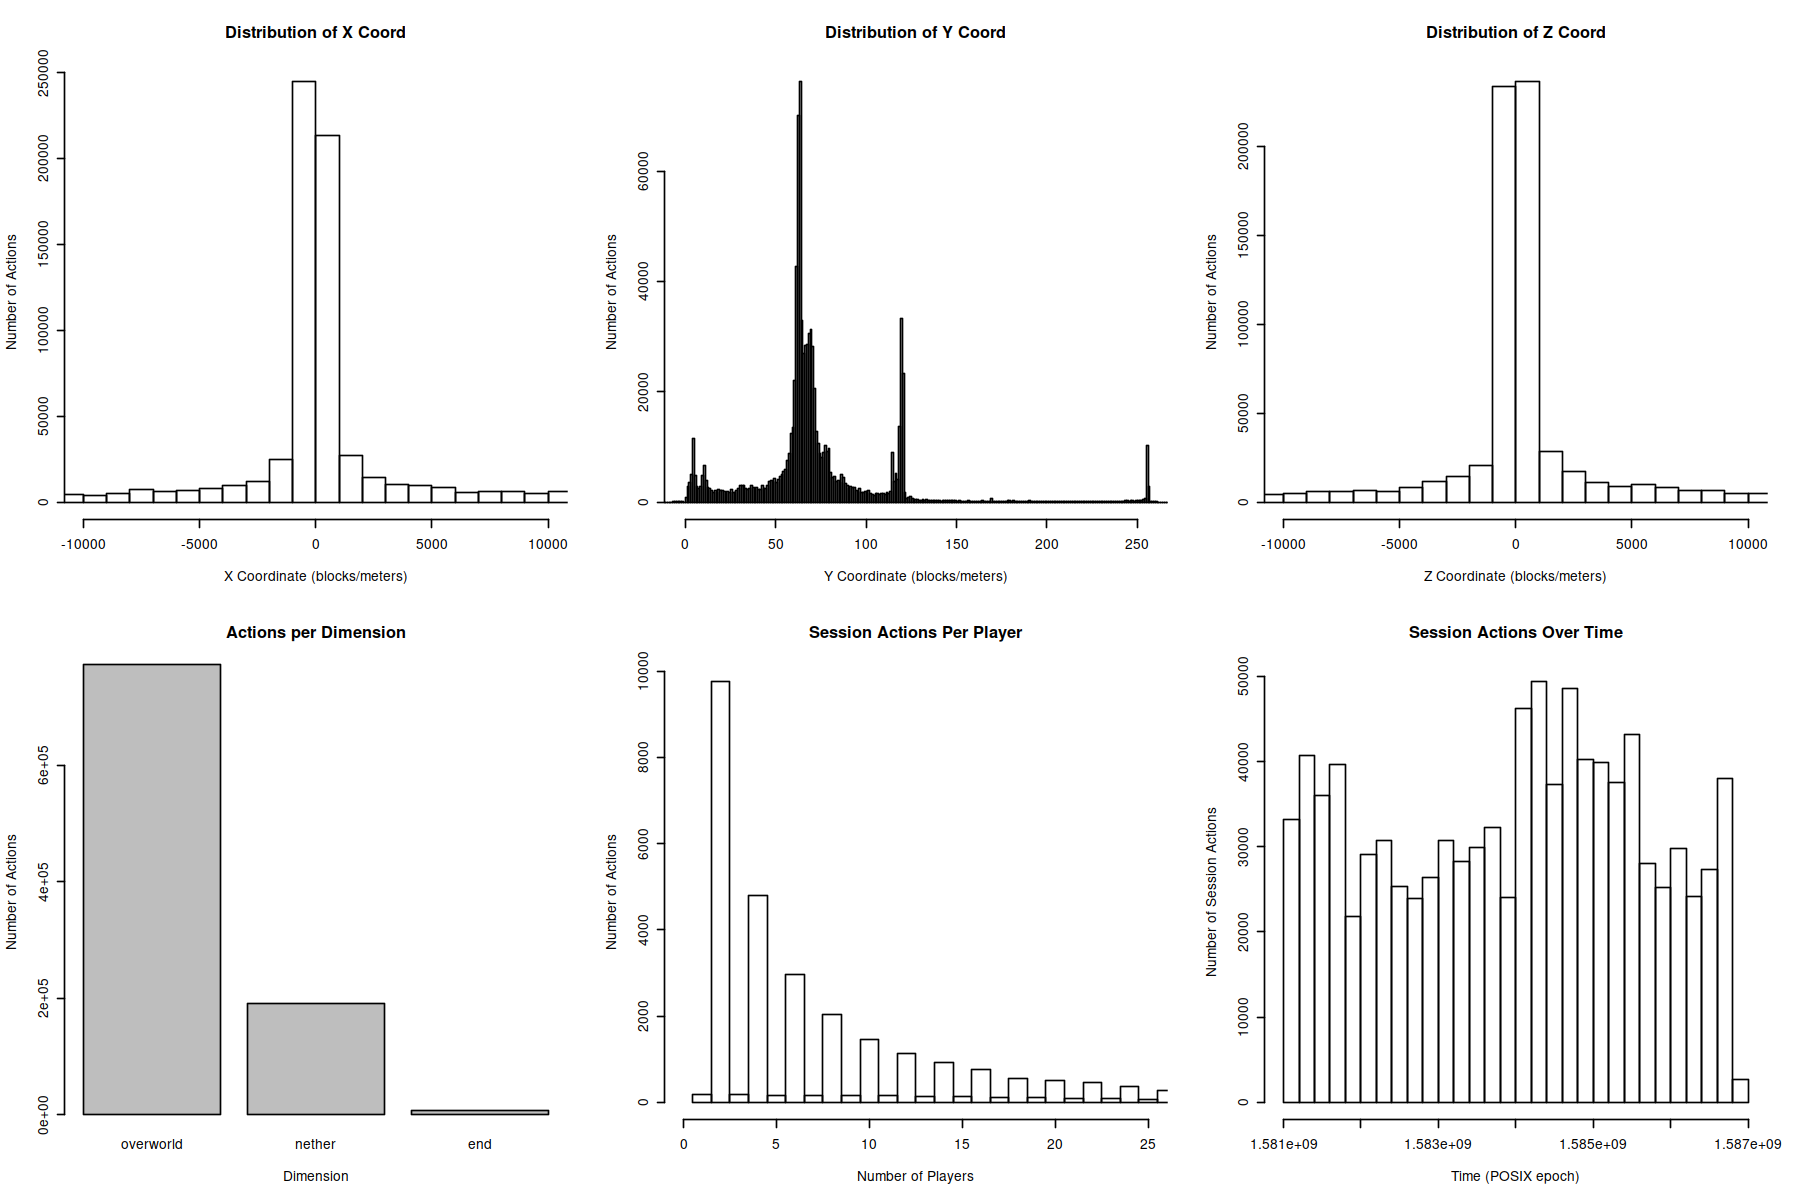

In [129]:
#session_data
dt = session_data
summary(dt)

par(mfrow = c(2,3))
options(repr.plot.height=10, repr.plot.width=15, cex.main=5, cex.lab=5, cex.axis=5)

#position
#we try to get rid of outliers. I don't think it works but that's fine because we use limits
left = -200000000
right = 200000000
hist(dt$x[dt$x >= left & dt$x <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of X Coord",
    ylab="Number of Actions", xlab="X Coordinate (blocks/meters)")
hist(dt$y, xlim=c(-1, 256), breaks=(-3000:15000), main="Distribution of Y Coord",
    ylab="Number of Actions", xlab="Y Coordinate (blocks/meters)")
hist(dt$z[dt$z >= left & dt$z <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of Z Coord",
    ylab="Number of Actions", xlab="Z Coordinate (blocks/meters)")
#dimension
plot(dt$dimension, main="Actions per Dimension", ylab="Number of Actions", xlab="Dimension" )

#sessions per player
spp = count(dt$user)$freq
#sort and plot the significant ones
summary(spp)

#we do some work with the limits and breaks here
hist(spp, breaks=0.5:7836, xlim=c(0, 25), main="Session Actions Per Player",
    ylab="Number of Actions", xlab="Number of Players")

#time
#session actions over time
epoch = as.integer(as.POSIXct(dt$time) , tz = "EST")
summary(epoch)
hist(epoch, xlab="Time (POSIX epoch)", ylab="Number of Session Actions", main="Session Actions Over Time")

                  time                user            dimension     
 2020-02-09 12:46:57:    26   SyJay18   :  3911   overworld:391477  
 2020-03-13 09:41:36:    25   BeefCity  :  2573   nether   : 94625  
 2020-02-09 12:48:00:    24   Fetopia   :  2319   end      :  3541  
 2020-03-03 21:36:02:    24   moooomoooo:  2306                     
 2020-03-04 23:54:39:    23   BentsiW   :  2042                     
 2020-03-12 18:43:49:    23   k3b       :  1438                     
 (Other)            :489498   (Other)   :475054                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -679   1st Qu.:   61.00   1st Qu.:     -435  
 Median :        5   Median :   66.00   Median :       16  
 Mean   :     8061   Mean   :   74.23   Mean   :    -5076  
 3rd Qu.:     2500   3rd Qu.:   79.00   3rd Qu.:     2184  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9999965  
                            

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     3.0    14.7     8.0  3911.0 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.581e+09 1.582e+09 1.584e+09 1.584e+09 1.585e+09 1.587e+09 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


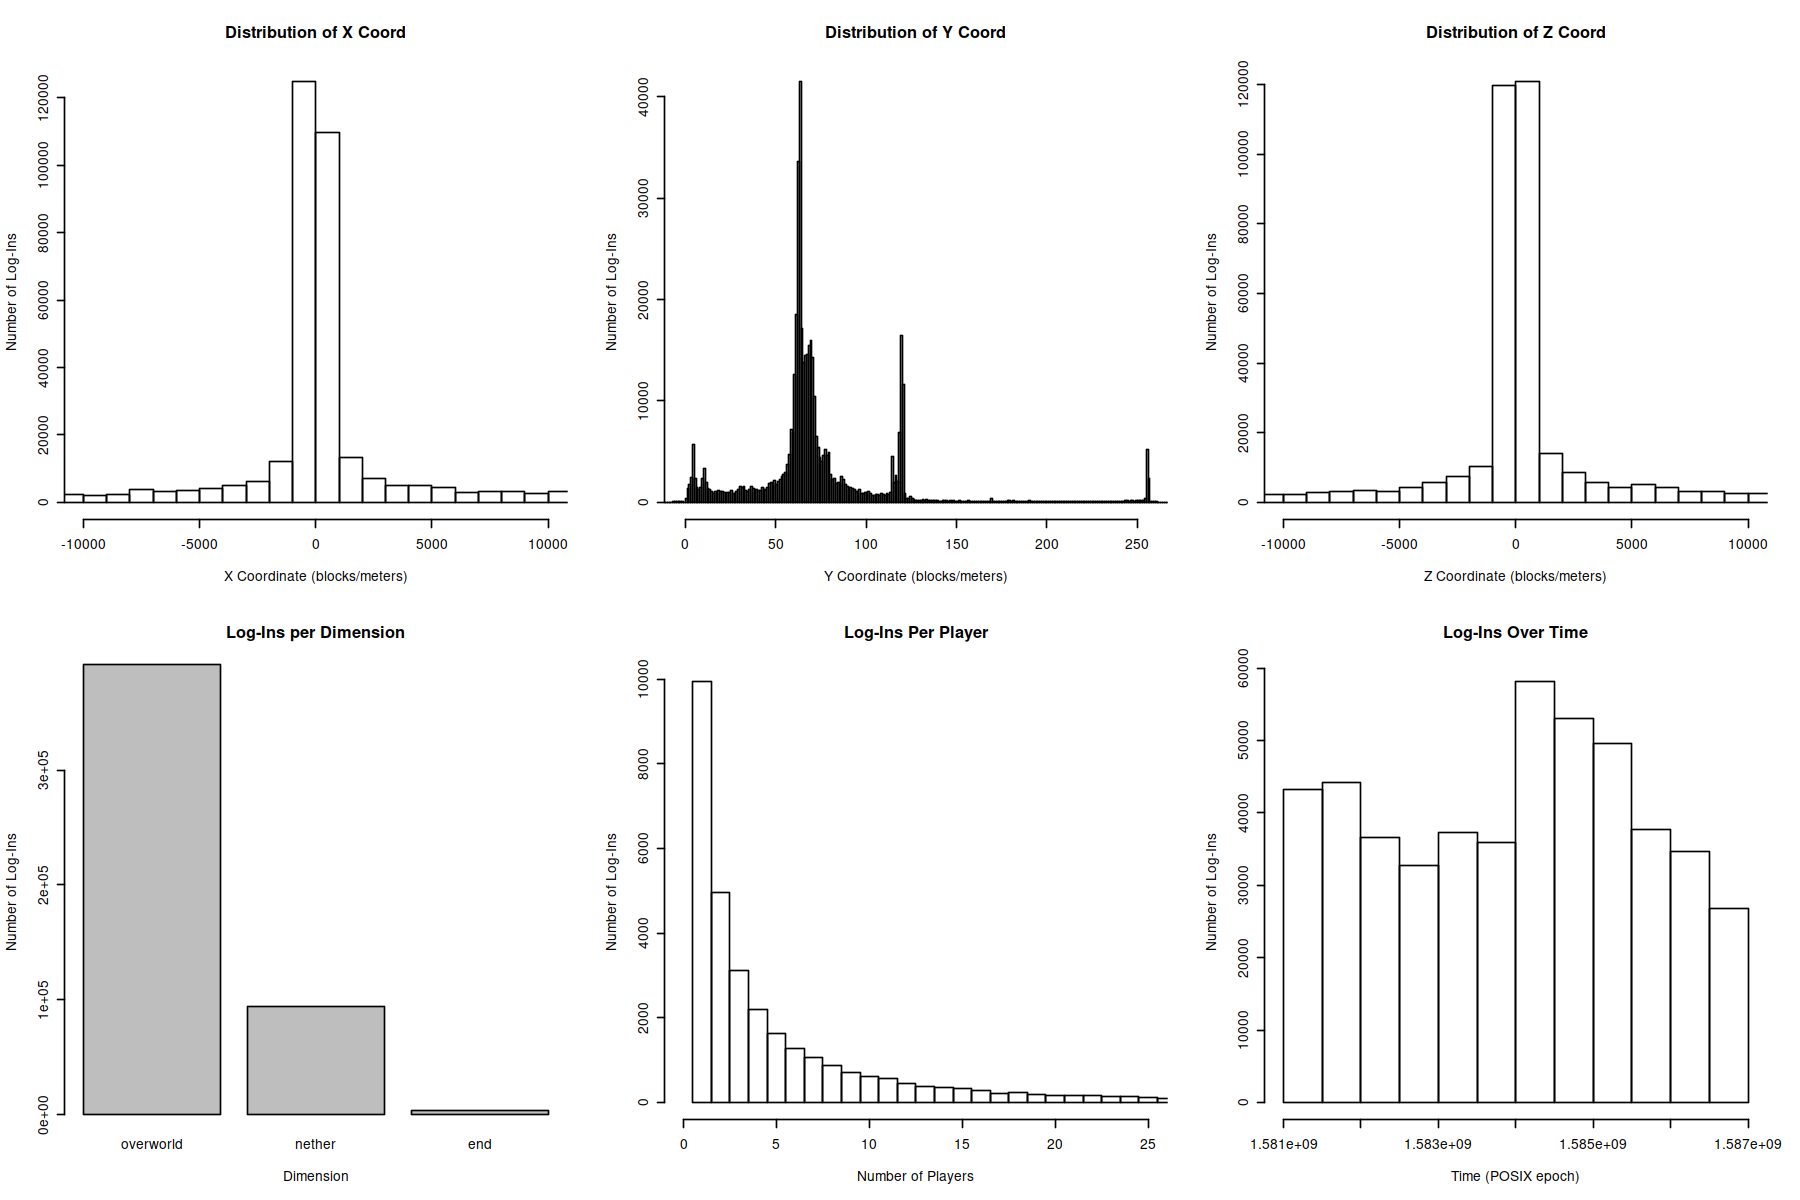

In [130]:
#log ins
dt = log_in
summary(dt)

par(mfrow = c(2,3))
options(repr.plot.height=10, repr.plot.width=15, cex.main=5, cex.lab=5, cex.axis=5)

#position
#we try to get rid of outliers. I don't think it works but that's fine because we use limits
left = -200000000
right = 200000000
hist(dt$x[dt$x >= left & dt$x <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of X Coord",
    ylab="Number of Log-Ins", xlab="X Coordinate (blocks/meters)")
hist(dt$y, xlim=c(-1, 256), breaks=(-3000:15000), main="Distribution of Y Coord",
    ylab="Number of Log-Ins", xlab="Y Coordinate (blocks/meters)")
hist(dt$z[dt$z >= left & dt$z <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of Z Coord",
    ylab="Number of Log-Ins", xlab="Z Coordinate (blocks/meters)")
#dimension
plot(dt$dimension, main="Log-Ins per Dimension", ylab="Number of Log-Ins", xlab="Dimension" )

#log ins per player
spp = count(dt$user)$freq
#sort and plot the significant ones
summary(spp)

#we do some work with the limits and breaks here
hist(spp, breaks=0.5:7836, xlim=c(0, 25), main="Log-Ins Per Player",
    ylab="Number of Log-Ins", xlab="Number of Players")

#time
#log-ins over time
epoch = as.integer(as.POSIXct(dt$time) , tz = "EST")
summary(epoch)
hist(epoch, xlab="Time (POSIX epoch)", ylab="Number of Log-Ins", main="Log-Ins Over Time")

                  time                user            dimension     
 2020-02-22 08:41:12:   150   SyJay18   :  3924   overworld:380803  
 2020-02-12 19:42:37:   127   BeefCity  :  2574   nether   : 95800  
 2020-02-14 23:31:12:   127   Fetopia   :  2304   end      :  3448  
 2020-02-08 13:38:00:   125   moooomoooo:  2218                     
 2020-02-26 17:42:34:   125   BentsiW   :  2036                     
 2020-02-26 17:55:00:   125   k3b       :  1423                     
 (Other)            :479272   (Other)   :465572                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2665.00   Min.   :-15015097  
 1st Qu.:     -816   1st Qu.:   61.00   1st Qu.:     -527  
 Median :        4   Median :   66.00   Median :       18  
 Mean   :     8174   Mean   :   74.23   Mean   :    -5061  
 3rd Qu.:     2870   3rd Qu.:   79.00   3rd Qu.:     2442  
 Max.   : 30000000   Max.   :14610.00   Max.   :  9999965  
                            

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00   14.49    8.00 3924.00 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.581e+09 1.583e+09 1.584e+09 1.584e+09 1.585e+09 1.587e+09 

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”


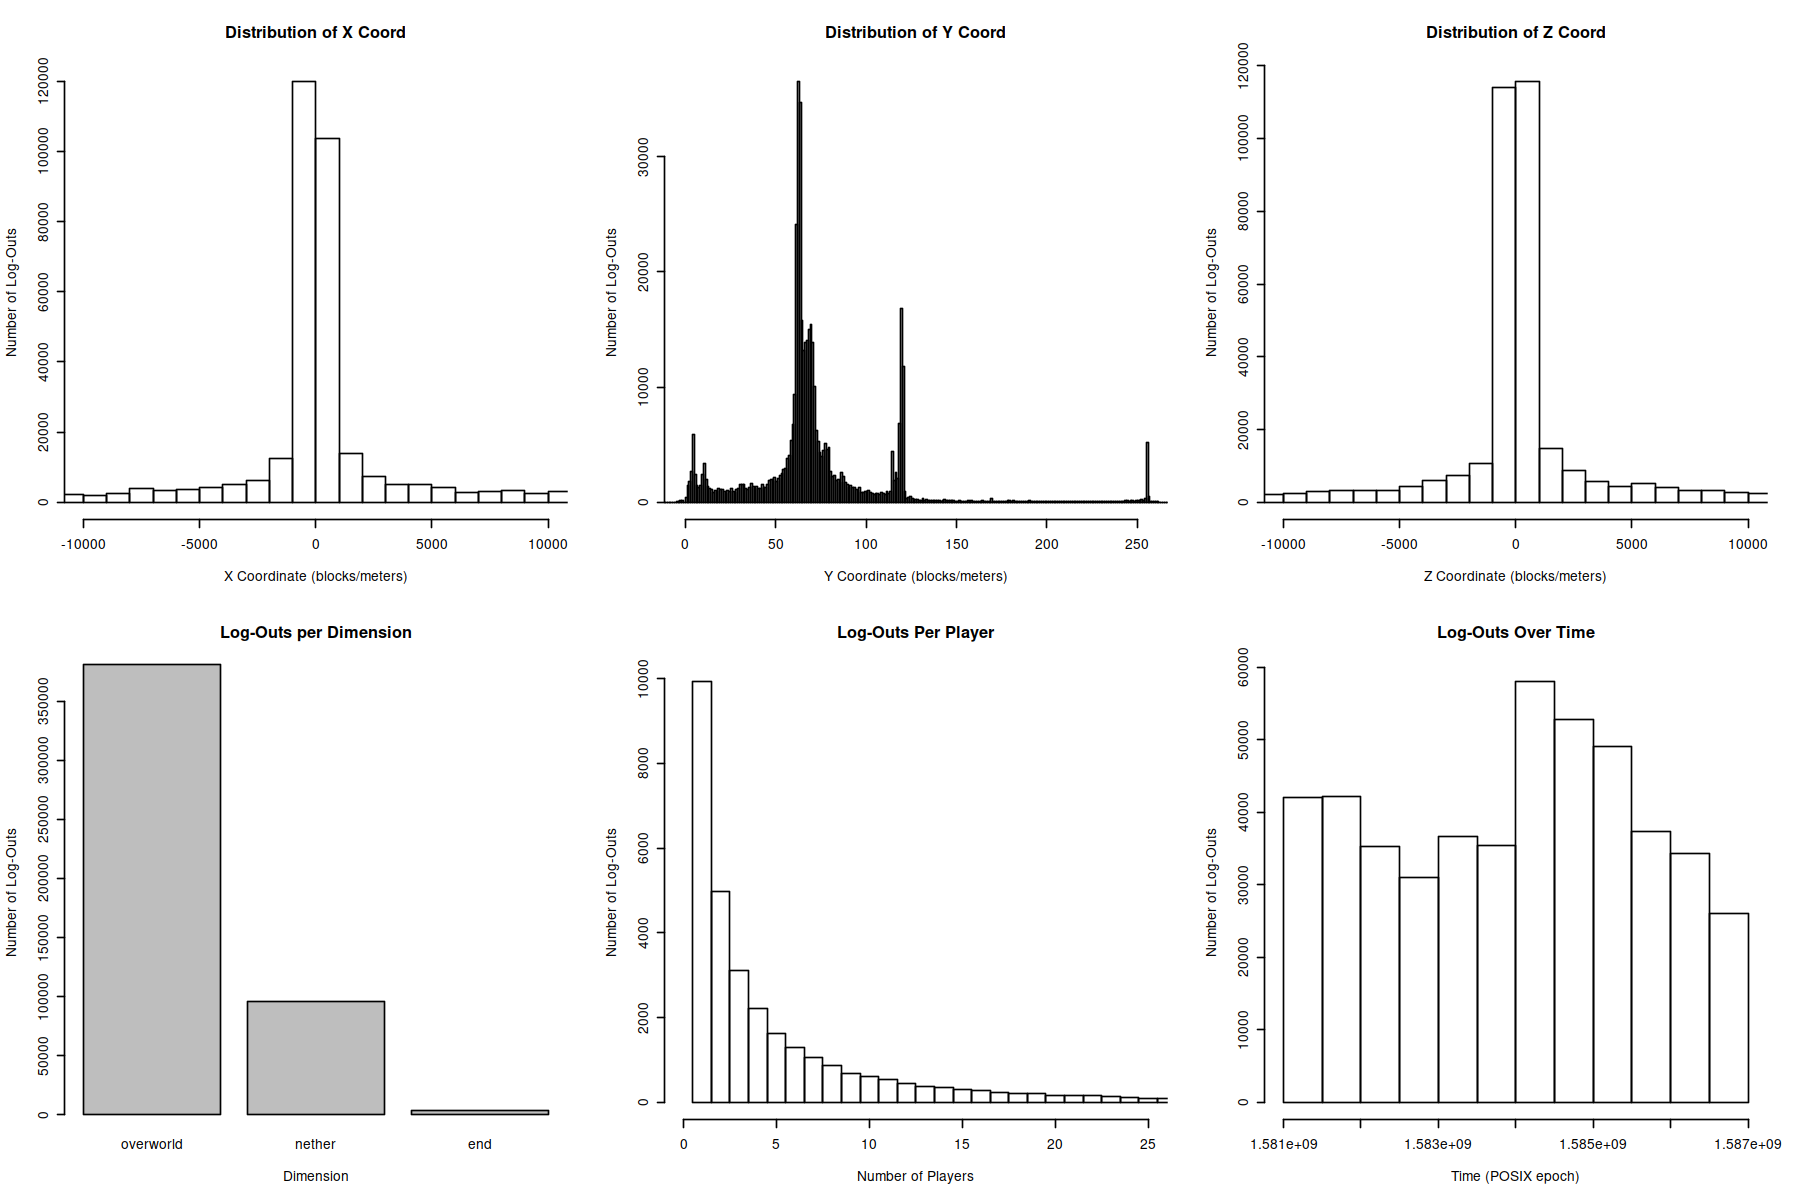

In [131]:
#log_out
dt = log_out
summary(dt)

par(mfrow = c(2,3))
options(repr.plot.height=10, repr.plot.width=15, cex.main=5, cex.lab=5, cex.axis=5)

#position
#we try to get rid of outliers. I don't think it works but that's fine because we use limits
left = -200000000
right = 200000000
hist(dt$x[dt$x >= left & dt$x <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of X Coord",
    ylab="Number of Log-Outs", xlab="X Coordinate (blocks/meters)")
hist(dt$y, xlim=c(-1, 256), breaks=(-3000:15000), main="Distribution of Y Coord",
    ylab="Number of Log-Outs", xlab="Y Coordinate (blocks/meters)")
hist(dt$z[dt$z >= left & dt$z <= right], xlim=c(-10000, 10000), breaks=(-200000:200000)*1000, main="Distribution of Z Coord",
    ylab="Number of Log-Outs", xlab="Z Coordinate (blocks/meters)")
#dimension
plot(dt$dimension, main="Log-Outs per Dimension", ylab="Number of Log-Outs", xlab="Dimension" )

#sessions per player
spp = count(dt$user)$freq
#sort and plot the significant ones
summary(spp)

#we do some work with the limits and breaks here
hist(spp, breaks=0.5:7836, xlim=c(0, 25), main="Log-Outs Per Player",
    ylab="Number of Log-Outs", xlab="Number of Players")

#time
#log-outs over time
epoch = as.integer(as.POSIXct(dt$time) , tz = "EST")
summary(epoch)
hist(epoch, xlab="Time (POSIX epoch)", ylab="Number of Log-Outs", main="Log-Outs Over Time")

In [155]:
nrow(log_out)

[1] 480051

# Analysis FINALLY

Q1: Are there patterns in the types of blocks placed by players that might reveal blockpalettes or other information? (association rules)

So we want to first group block placements by player and then see if one block implies another

ERROR: Error in match.fun(FUN): argument "FUN" is missing, with no default


Q2: How did player activity on the server change over time and how much does it correspond with SalC1’s videos? (correlation, comparing distributions) 

We sort of aleady did this one but we can formalize it hopefully. This should be the easiest question to answer. 

In [158]:
#we'll look at log-ins here and compare to the dates of Sal's videos
log_in.epoch = as.integer(as.POSIXct(log_in$time), tz = "EST")

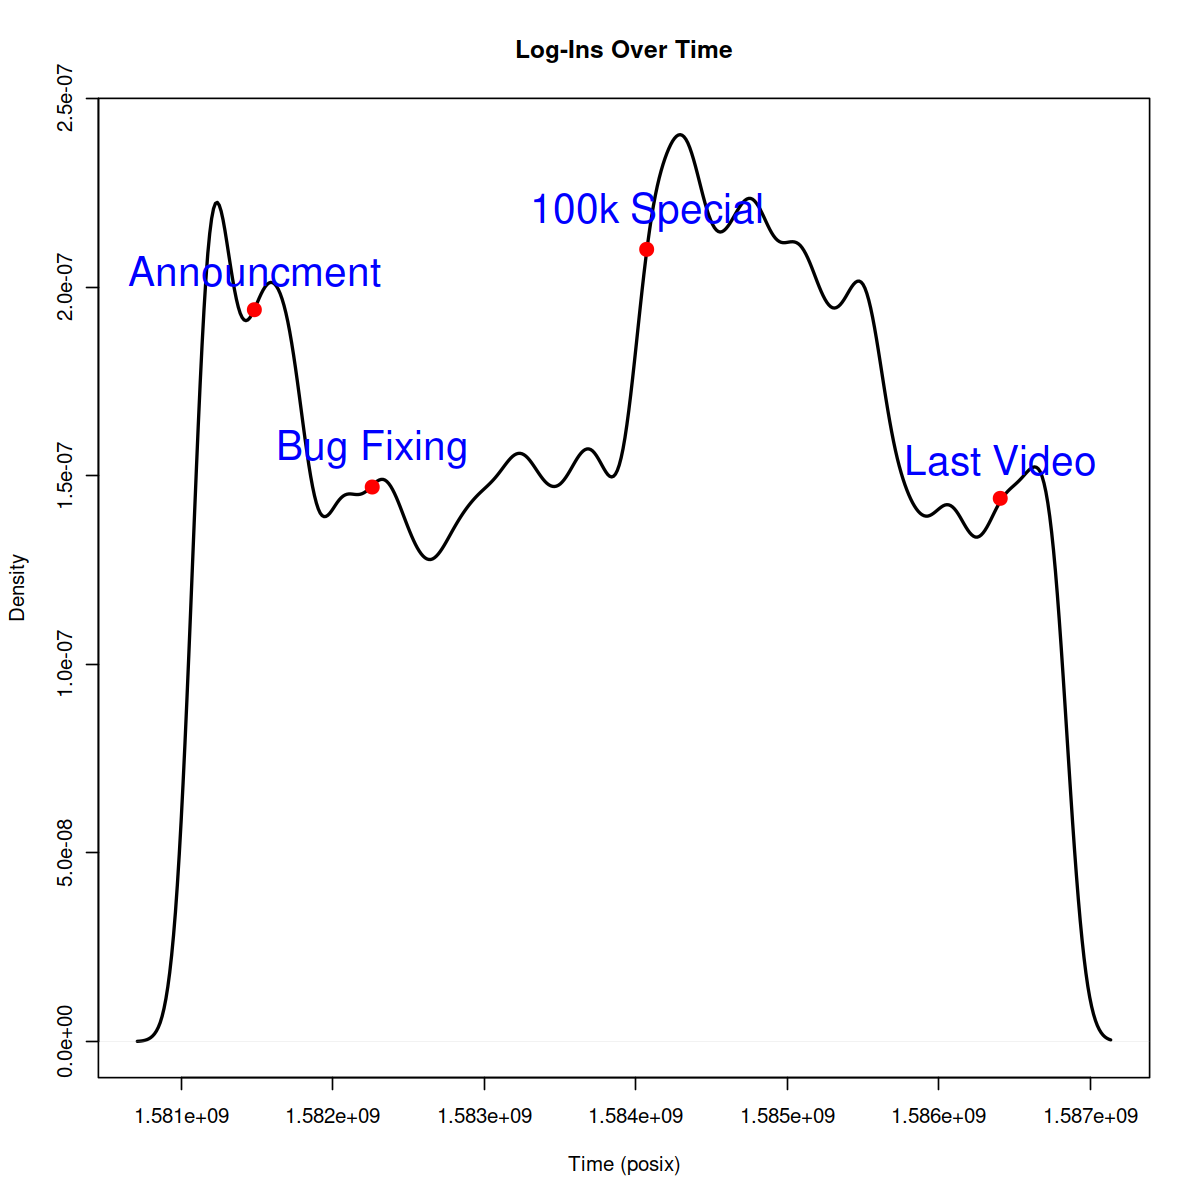

In [247]:
#first we'll plot log-ins and add in notes for the videos to see if there's obvious correlation
log_in.epoch <- as.numeric(log_in.epoch)
log_in.density = density(log_in.epoch)
plot(log_in.density, main="Log-Ins Over Time", xlab="Time (posix)", lwd=2)

points(x=c(1581483600, 1582261200, 1584072000, 1586404800), y=c(0.000000194, 0.000000147, 0.00000021, 0.000000144), 
       pch=19, col="red", lwd=3)
text(c("Announcment", "Bug Fixing", "100k Special", "Last Video"), x=c(1581483600, 1582261200, 1584072000, 1586404800),
    y=c(0.000000204, 0.000000157, 0.00000022, 0.000000154), col="blue", cex=2)


[1] 22647

[1] 30438

[1] 18607

[1] 30438

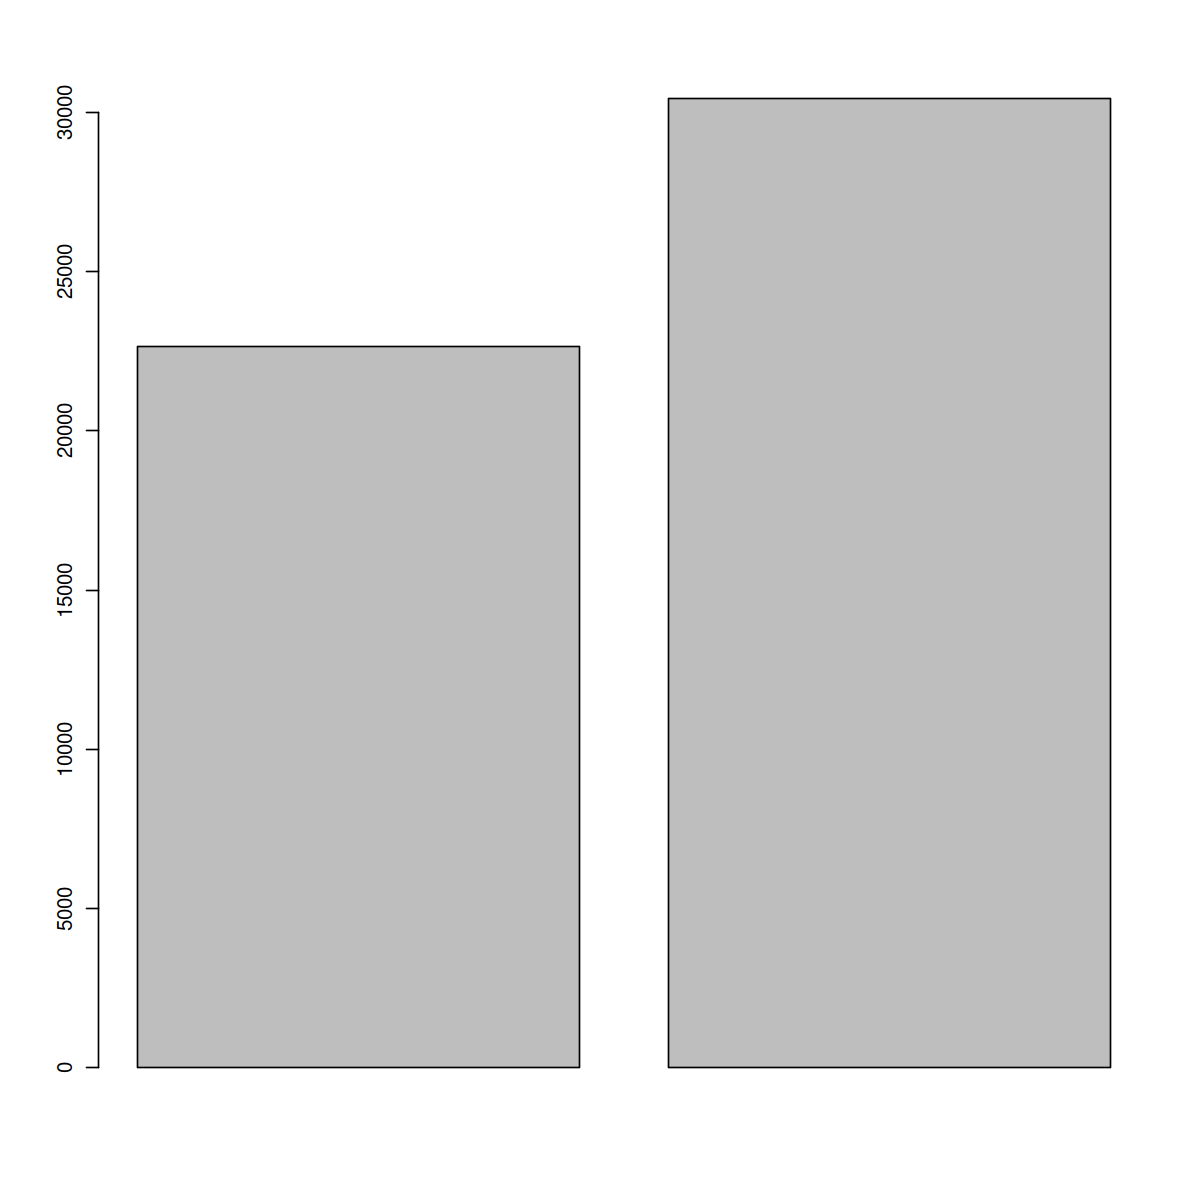

[1] 19281

[1] 30438

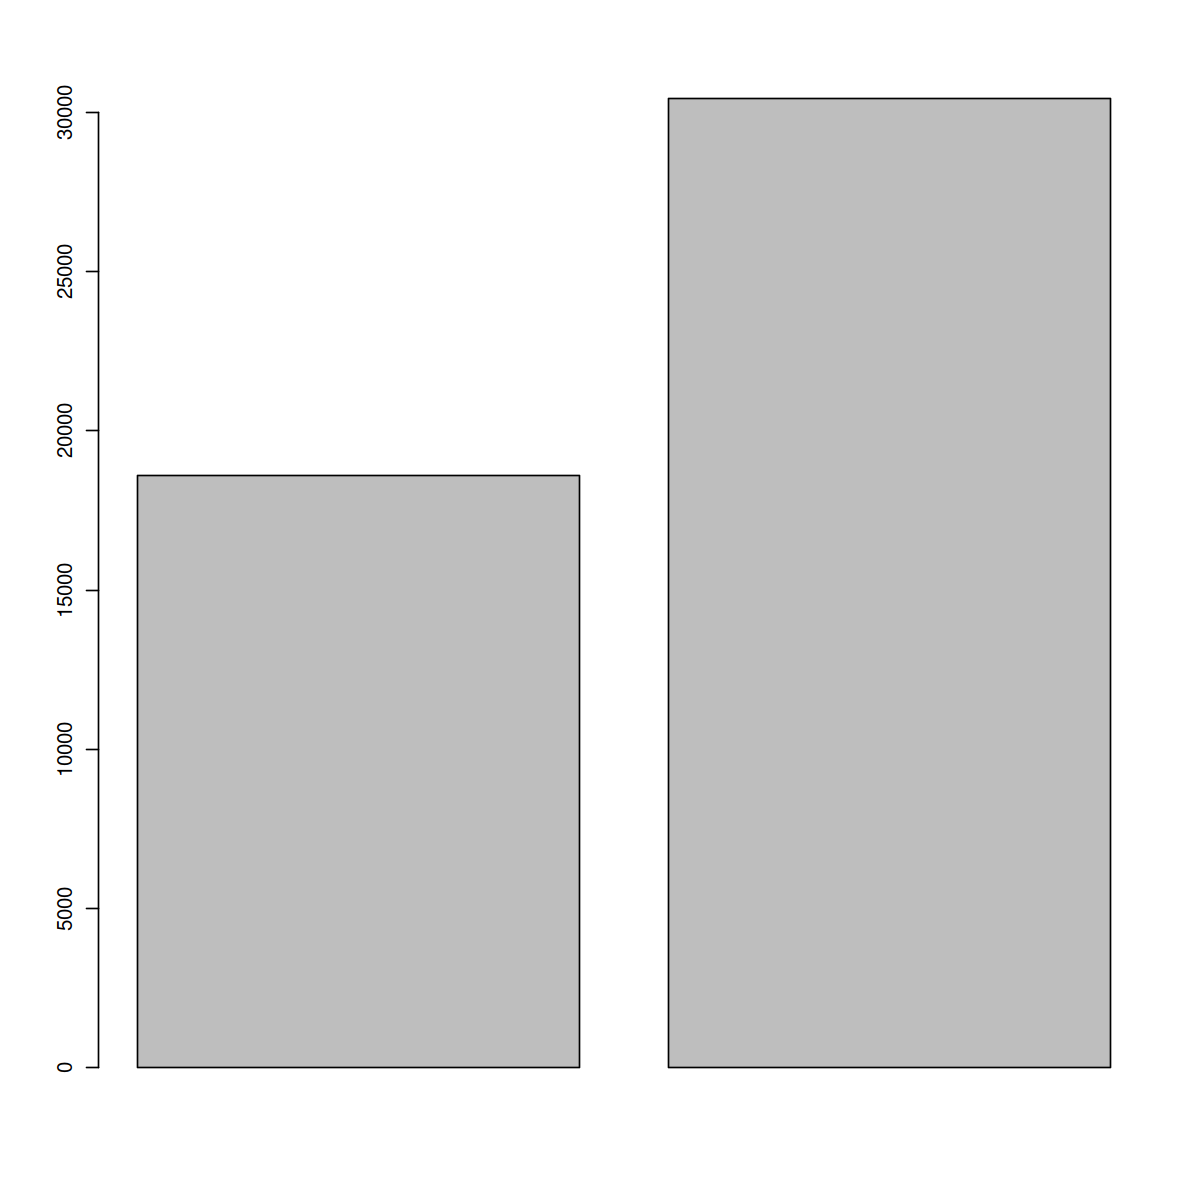

[1] 15990

[1] 30438

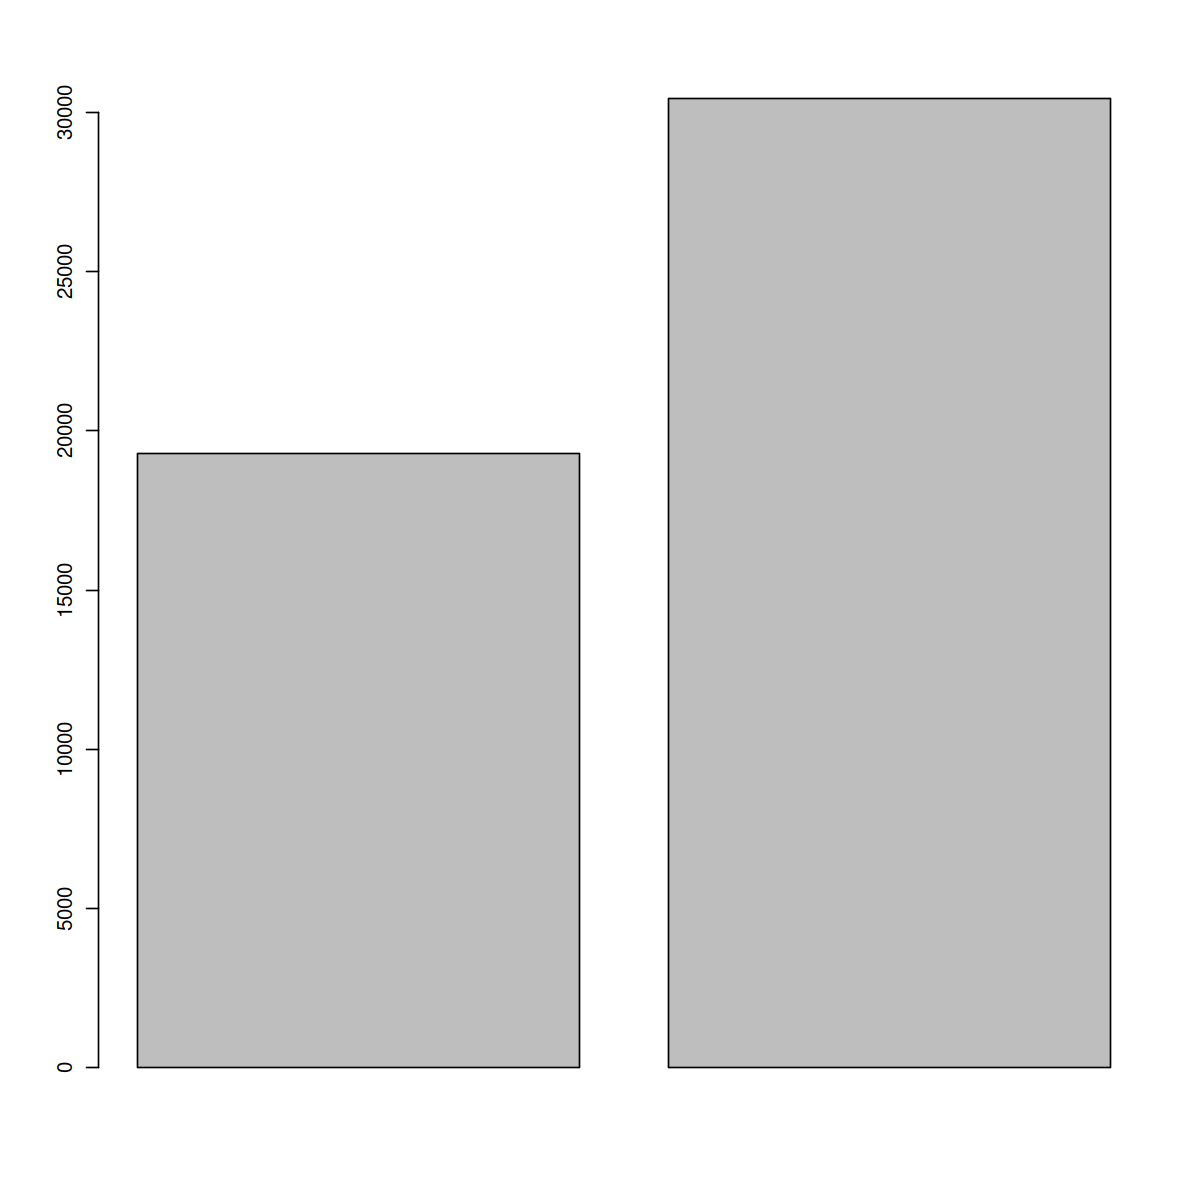

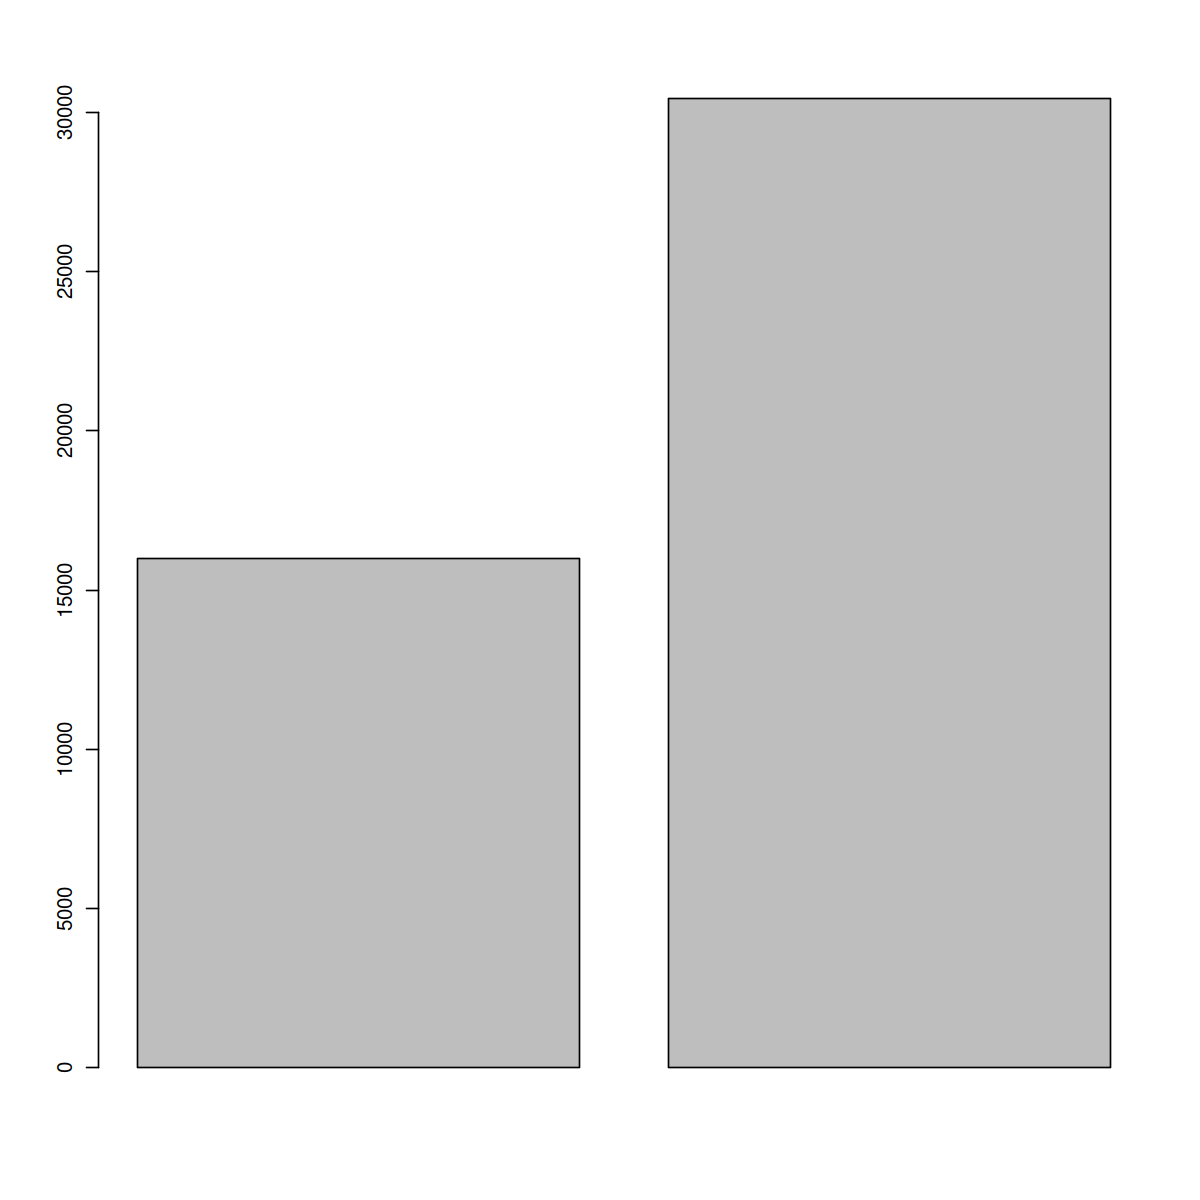

In [246]:
#So there may be a correlation, but it's not as obvious as expected. Is it possible our posix time is miscalculated?
#How did the player count peak before the announcement?
#Why is the 100k special correlated with the biggest peak when it had the fewest views and nothing to do with the server?

#I definitely converted the posix time to EST (localtime) when I extracted it, and  I converted it back using EST. So I guess either
#there's an inconsistency in how the server recorded time or I did something wrong somewhere. Either way we continue

day = 86400  #one day in posix time

#we'll compare the number of log ins in the week before and the week after each video
point <- 1581483600
before <- log_in.epoch[log_in.epoch < point & log_in.epoch > point - 3*day ]
length(before)


after <- log_in.epoch[log_in.epoch > 1584072000 & log_in.epoch < 1584072000 + 3*day]
length(after)

barplot(c(length(before), length(after)))

point <- 1582261200
before <- log_in.epoch[log_in.epoch < point & log_in.epoch > point - 3*day ]
length(before)


after <- log_in.epoch[log_in.epoch > 1584072000 & log_in.epoch < 1584072000 + 3*day]
length(after)

barplot(c(length(before), length(after)))

point <- 1584072000
before <- log_in.epoch[log_in.epoch < point & log_in.epoch > point - 3*day ]
length(before)


after <- log_in.epoch[log_in.epoch > 1584072000 & log_in.epoch < 1584072000 + 3*day]
length(after)

barplot(c(length(before), length(after)))

point <- 1586404800
before <- log_in.epoch[log_in.epoch < point & log_in.epoch > point - 3*day ]
length(before)


after <- log_in.epoch[log_in.epoch > 1584072000 & log_in.epoch < 1584072000 + 3*day]
length(after)

barplot(c(length(before), length(after)))


In [261]:
#so we see there was always significant increase after each video, but the videos did not always correspond with signficiant increase
#so now we plot time since last video and number of log ins

log_in.epoch.by_day <- cut.default(log_in.epoch, breaks <- (((0:67) * day) + 1581036801))
length(log_in.epoch.by_day)

[1] 489643

In [253]:
#we use these to determine how to cut the log_in vector into days
min(log_in.epoch)
max(log_in.epoch)
max(log_in.epoch) - min(log_in.epoch)

ceiling(5771269 / day)

[1] 1581036801

[1] 1586808070

[1] 5771269

[1] 67

In [262]:
#spending too much time on this question. We'll just call it there. No need to write a whole report about one question
#that doesn't even have a cool answer. 

split {base},R Documentation
x,vector or data frame containing values to be divided into groups.
f,"a ‘factor’ in the sense that as.factor(f) defines the grouping, or a list of such factors in which case their interaction is used for the grouping."
drop,logical indicating if levels that do not occur should be dropped (if f is a factor or a list).
value,a list of vectors or data frames compatible with a splitting of x. Recycling applies if the lengths do not match.
sep,"character string, passed to interaction in the case where f is a list."
lex.order,"logical, passed to interaction when f is a list."
...,further potential arguments passed to methods.


### Next Question: Clustering 

1.	Do clusters of block placement data correspond to manually gathered lists of landmarks? (clustering)

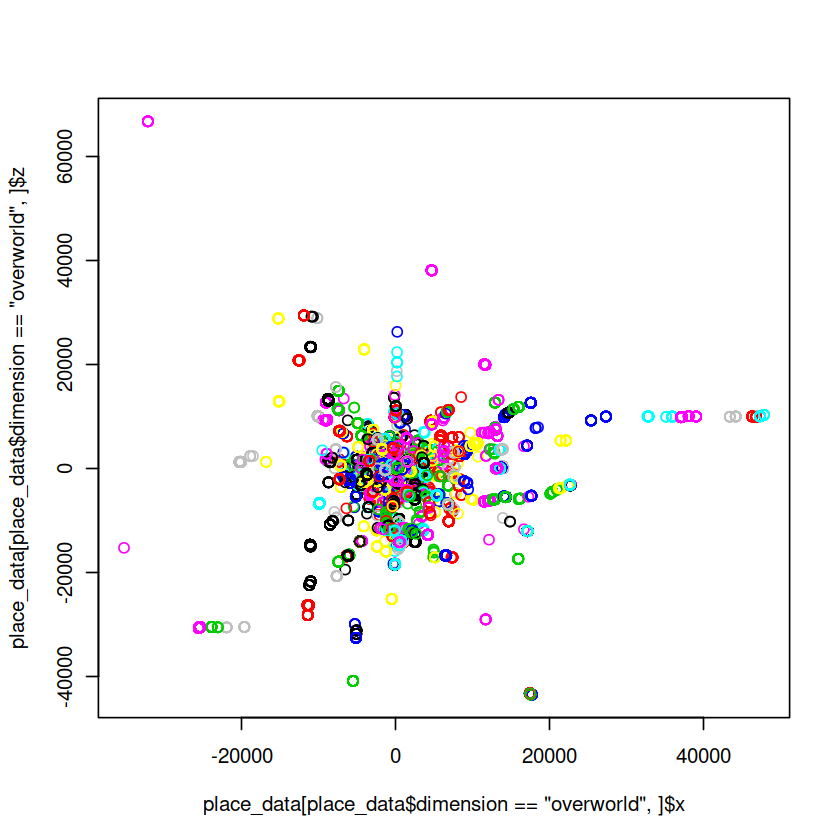

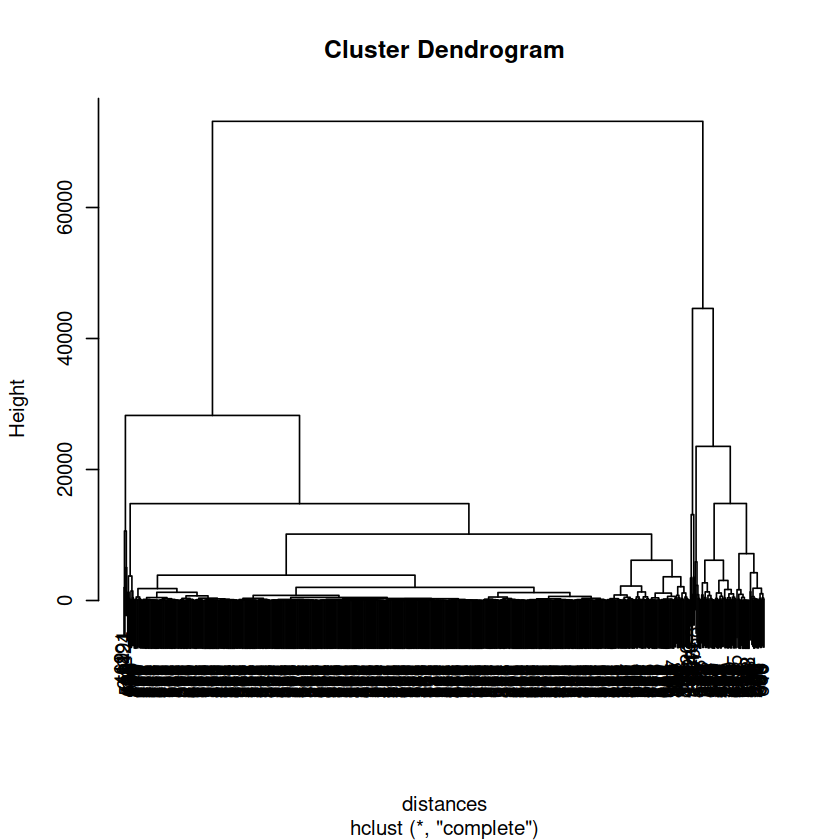

In [11]:
#so we return to the clustering above. Hierarchical of k-means. 
overworld_placements <- place_data[place_data$dimension=="overworld",]
kclust <- kmeans(overworld_placements[, 5:6], 689, nstart=10, iter.max=20)
plot(place_data[place_data$dimension=="overworld",]$x, place_data[place_data$dimension=="overworld",]$z, col=kclust$cluster)


distances <- dist(kclust$centers, method="euclidean")

clusters <- hclust(distances, method="complete")
plot(clusters)

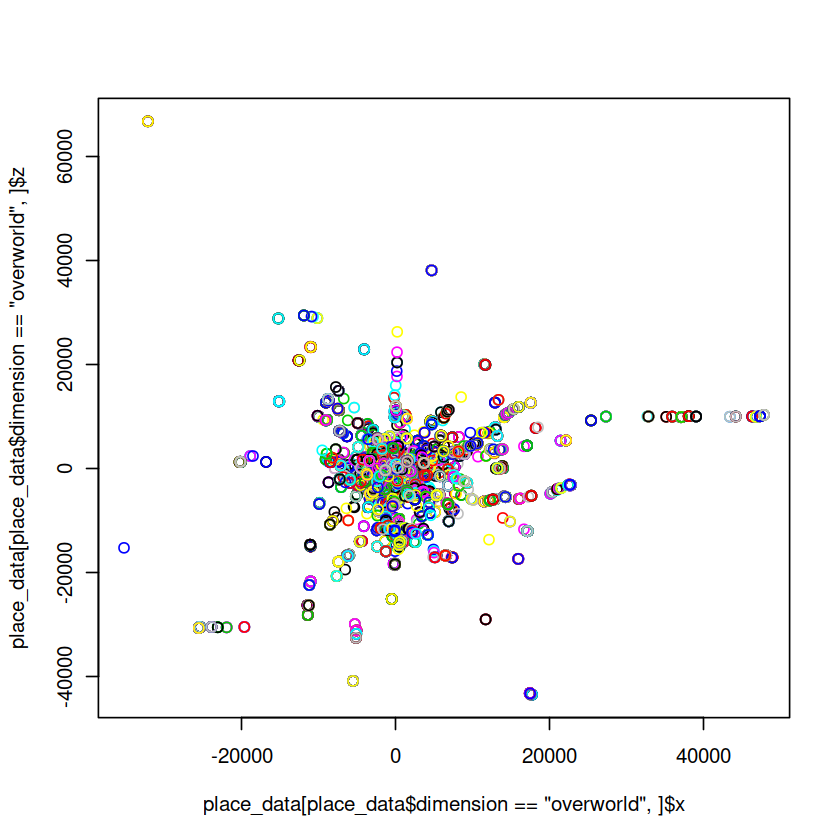

In [51]:
cluster.list <- cutree(clusters, k=300)
plot(place_data[place_data$dimension=="overworld",]$x, place_data[place_data$dimension=="overworld",]$z, col=cluster.list)

### Next Question: Block Placements
3.	Are there patterns in the types of blocks placed by players that might reveal block palettes or other information? (association rules)

In [25]:
library("arules")

#convert to transactions
placeTrans <- as(data.frame(place_data$user, place_data$block), "transactions")

rules <- apriori(placeTrans, parameter=list(conf=0.0, supp=0.05, minlen=2, maxlen=2))

inspect(rules)

#we had a lot of liquids since they duplicate. What do we have without liquids
requirements = list(none=c("place_data.block=water", "place_data.block=lava", "place_data.block=stationary_water",
                           "place_data.block=stationary_lava"))
                    
nonLiquidRules <- apriori(placeTrans, parameter=list(conf=0.3, supp=0.001, minlen=2), appearance=requirements)

nonLiquidRules <- sort(nonLiquidRules, by="lift")

inspect(nonLiquidRules)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 50000 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[825 item(s), 1000000 transaction(s)] done [0.93s].
sorting and recoding items ... [9 item(s)] done [0.03s].
creating transaction tree ... done [0.66s].
checking subsets of size 1 2 done [0.00s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.14s].
     lhs                                    rhs                                  support confidence coverage     lift  count
[1]  {place_data.block=lava}             => {place_data.user=Check9light}       0.052494  0.5931928 0.088494 2.408005  52494
[2]  {place_data.user=Check9light}  

                  time             user                block     
 2020-02-08 01:57:39:  11   BarenDome:6233   ender_stone  :5860  
 2020-02-07 23:39:11:  10   004      :   0   cobblestone  : 138  
 2020-02-08 02:16:14:  10   007Keys  :   0   purpur_block :  75  
 2020-02-07 22:40:39:   9   0akenTree:   0   end_bricks   :  45  
 2020-02-07 23:30:50:   9   0x1a4    :   0   purpur_pillar:  33  
 2020-02-08 00:23:21:   9   13oclock :   0   stone        :  28  
 (Other)            :6175   (Other)  :   0   (Other)      :  54  
     dimension          x                y                z         
 overworld:  58   Min.   :-13287   Min.   :  5.00   Min.   :-12392  
 nether   :   0   1st Qu.:-11960   1st Qu.: 55.00   1st Qu.: -4208  
 end      :6175   Median : -7405   Median : 56.00   Median : -3104  
                  Mean   : -7773   Mean   : 56.27   Mean   : -3136  
                  3rd Qu.: -4788   3rd Qu.: 56.00   3rd Qu.:  -936  
                  Max.   :   -60   Max.   :132.00   Max.  

                  time             user                    block     
 2020-02-08 01:57:39:  11   BarenDome:5860   ender_stone      :5860  
 2020-02-07 23:39:11:  10   004      :   0   acacia_door      :   0  
 2020-02-08 02:16:14:  10   007Keys  :   0   acacia_fence     :   0  
 2020-02-07 22:40:39:   9   0akenTree:   0   acacia_fence_gate:   0  
 2020-02-07 23:30:50:   9   0x1a4    :   0   anvil            :   0  
 2020-02-08 02:16:13:   9   13oclock :   0   bed_block        :   0  
 (Other)            :5802   (Other)  :   0   (Other)          :   0  
     dimension          x                y                z        
 overworld:   0   Min.   :-13287   Min.   : 32.00   Min.   :-7947  
 nether   :   0   1st Qu.:-12014   1st Qu.: 55.00   1st Qu.:-4209  
 end      :5860   Median : -8728   Median : 56.00   Median :-3560  
                  Mean   : -8021   Mean   : 55.63   Mean   :-3214  
                  3rd Qu.: -4820   3rd Qu.: 56.00   3rd Qu.:-1002  
                  Max.   : -1656

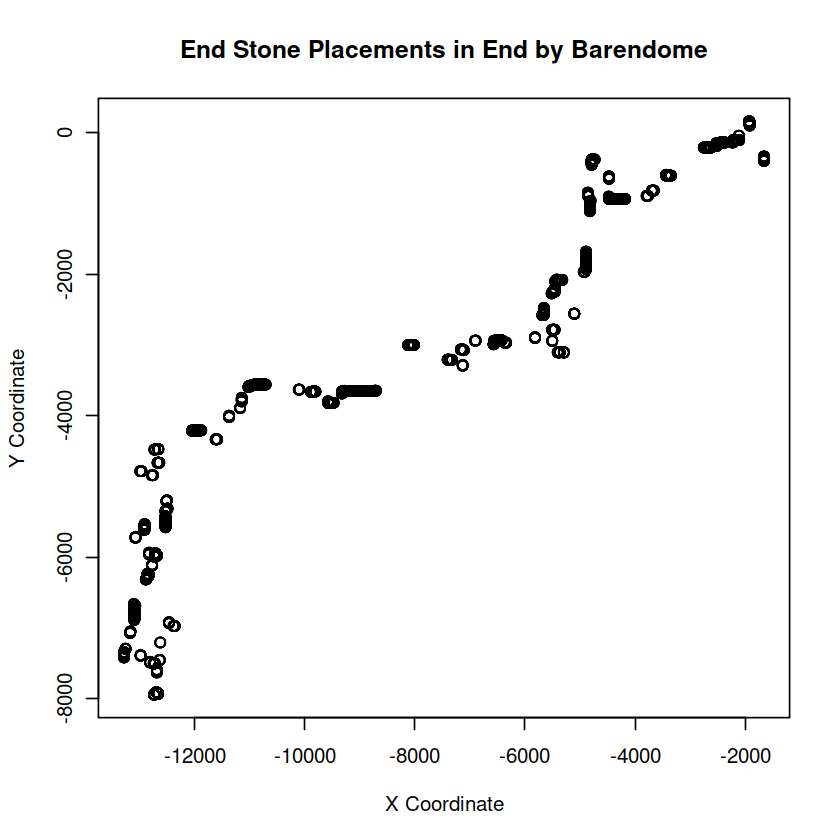

In [34]:
summary(place_data[place_data$user=="BarenDome",])
end_place <- place_data[place_data$user=="BarenDome" & place_data$dimension=="end" & place_data$block=="ender_stone",]
summary(end_place)
plot(end_place$x, end_place$z, xlab="X Coordinate", ylab="Y Coordinate", main="End Stone Placements in End by Barendome")

### Next Question: Signs
4.	What are the most common types of signs with text and how do they relate to the players who placed them and their locations? (correlation, comparing distributions)

In [131]:
summary(sign_data)

#we'll use association rules again between player and text
signTrans <- as(data.frame(sign_data$user, sign_data$text), "transactions")

rules <- apriori(signTrans, parameter=list(conf=0.0, supp=0.001, minlen=2, maxlen=2))
rules <- sort(rules, by="support")
inspect(rules)


                  time                   user      
 2020-03-25 17:31:35:    12   CactusDuper  : 1088  
 2020-04-04 18:03:35:    12   ShatteredHej :  833  
 2020-03-23 16:56:39:    10   SmashyMC     :  750  
 2020-03-24 13:33:30:    10   Temantor     :  704  
 2020-03-24 13:33:32:    10   ClareBear0925:  544  
 2020-03-24 13:33:42:    10   Fobba        :  530  
 (Other)            :101983   (Other)      :97598  
                                                               text      
 sal is cute                                                     : 1038  
 e                                                               :  446  
 tip:if there isnt a snow to spam on just move him slightly till :  322  
 w                                                               :  307  
 123456478957398 893475893758937 734563875637856 874356783563875 :  280  
  Valley of signs                                                :  265  
 (Other)                                                         :

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[59015 item(s), 102047 transaction(s)] done [0.27s].
sorting and recoding items ... [139 item(s)] done [0.01s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 done [0.00s].
writing ... [12 rule(s)] done [0.00s].
creating S4 object  ... done [0.04s].
     lhs                                                                                  rhs                                                                                   support confidence    coverage      lift count
[1]  {sign_data.text=sal is cute   }                          

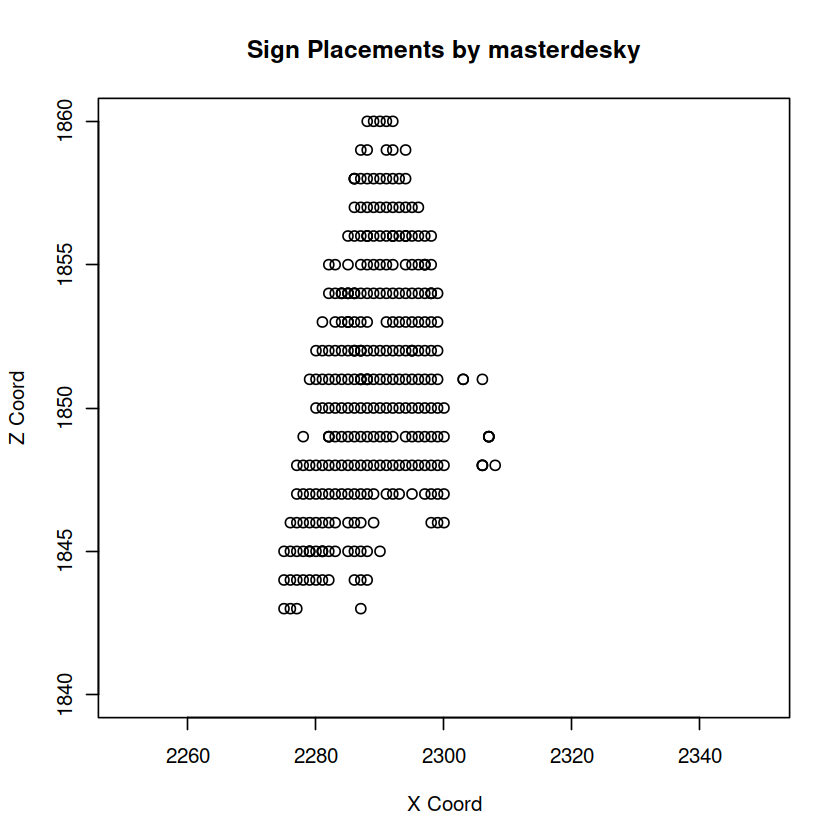

In [50]:
#now we'll plot to get an idea of spammer activity

spam <- sign_data[sign_data$user == "masterdesky",]
plot(spam$x, spam$z, xlim = c(2250, 2350), ylim=c(1840, 1860),
     xlab = "X Coord", ylab="Z Coord", main="Spam Sign Placements by masterdesky")

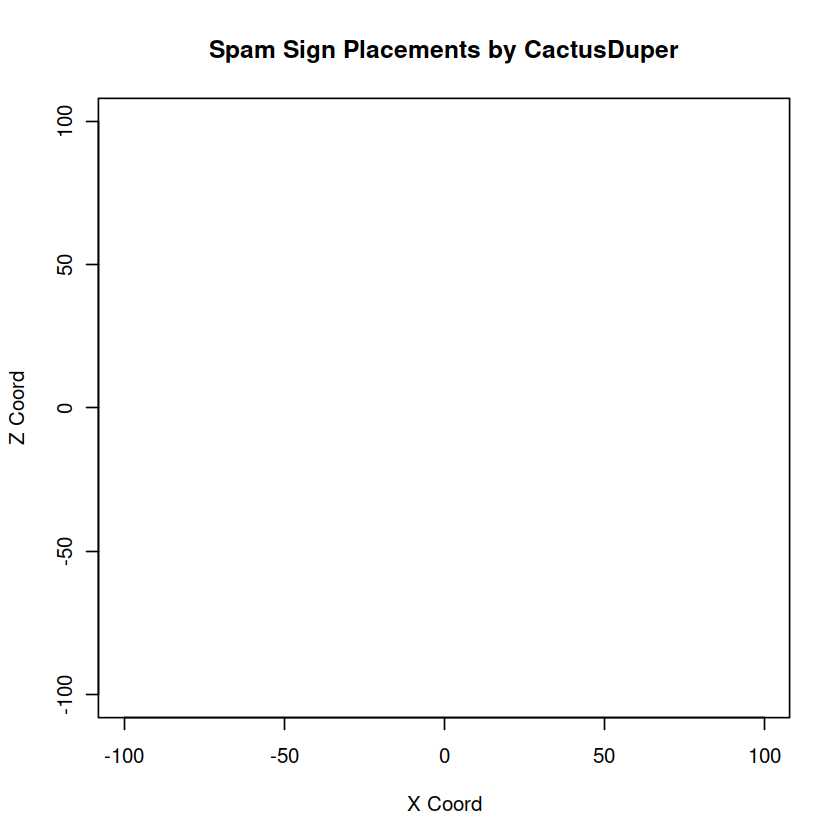

In [136]:
#now we'll plot to get an idea of spammer activity

spam <- sign_data[sign_data$user == "CactusDuper",]
plot(spam$x, spam$z, xlim = c(-100, 100), ylim = c(-100, 100),
     xlab = "X Coord", ylab="Z Coord", main="Spam Sign Placements by CactusDuper")

# Part 4: Explanatory Modeling


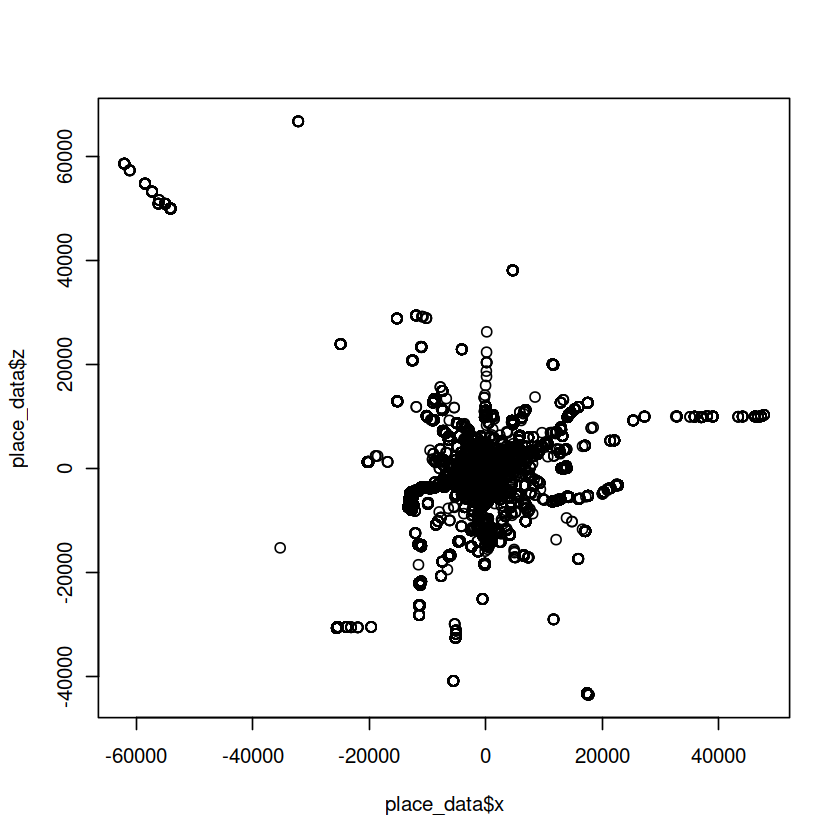

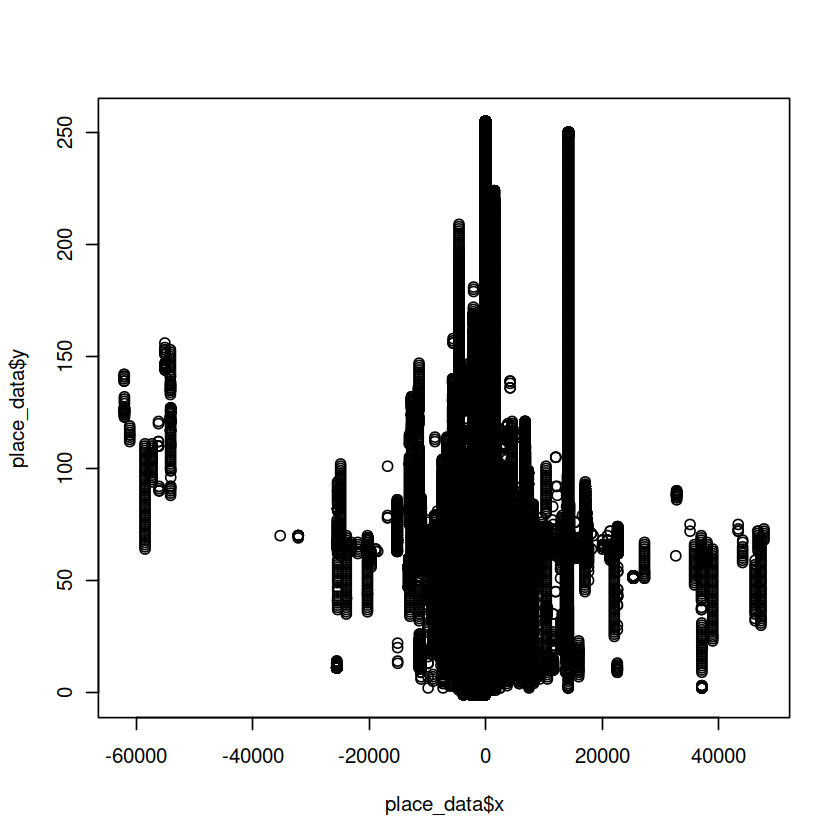

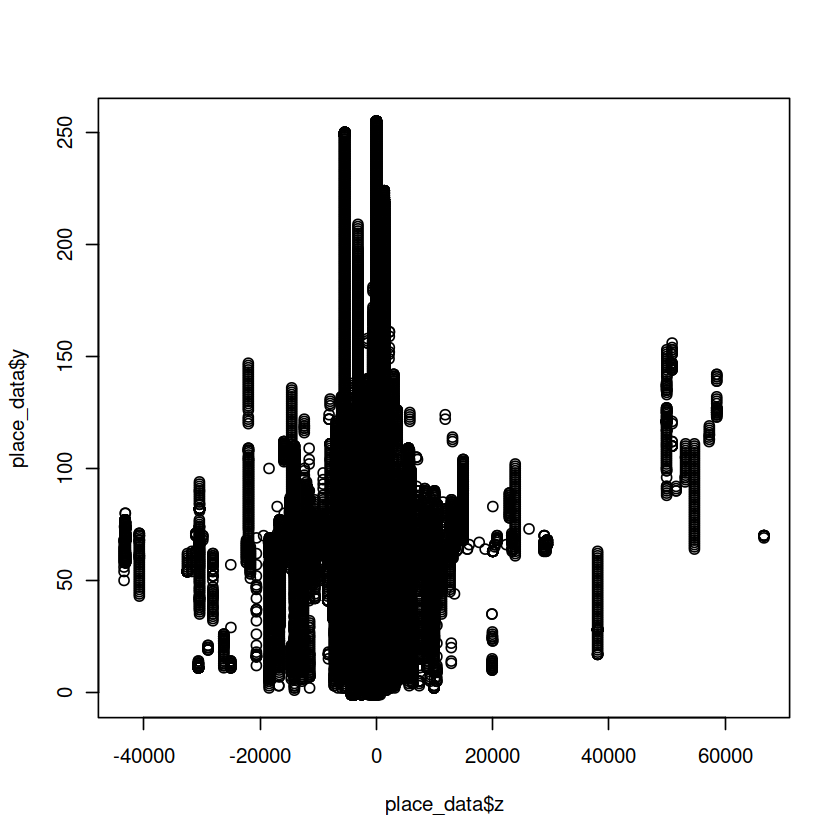

In [55]:
#Is there a correlation between x and y values of block placements and can we predict one from the other?
plot(place_data$x, place_data$z)
plot(place_data$x, place_data$y)
plot(place_data$z, place_data$y)

#there are some obvious trends but it's not linear

In [ ]:
#there do appear to be some generalizations with the x-y plot. We see that players are more likely to build
#above ground when x is very negative and more likely to build underground when x is very positive

#I don't feel like it's a good idea to try explanatory modeling here though. Maybe we try predicting a block type based 
#on a coordinate with a naive bayes classifier. 

In [61]:
library(e1071)

#testing and training sets
entries <- sample(nrow(place_data), ceiling(0.8*nrow(place_data)))

place.train <- place_data[entries,]
place.test <- place_data[-entries,]

summary(place.train)

                  time                      user       
 2020-02-08 10:24:07:   479   Check9light     :197001  
 2020-02-08 10:24:06:   472   GermanEngineer12:187312  
 2020-02-08 05:50:12:   470   artofcroissant  : 98654  
 2020-02-08 10:33:16:   449   lavablade02     : 74225  
 2020-02-07 21:03:57:   427   CommaDotNight   : 21440  
 2020-02-08 10:24:05:   423   Ovechkin_       : 14397  
 (Other)            :797280   (Other)         :206971  
              block            dimension            x           
 stationary_water:364963   overworld:762798   Min.   :-62073.0  
 stationary_lava :203174   nether   : 16575   1st Qu.: -1317.0  
 lava            : 70624   end      : 20627   Median :     2.0  
 cobblestone     : 47267                      Mean   :   545.3  
 water           : 41927                      3rd Qu.:  1496.0  
 leaves          : 12450                      Max.   : 47797.0  
 (Other)         : 59595                                        
       y                z       

In [62]:
#get the model
blockCoordModel <- naiveBayes(block ~ ., data=place.train)

In [63]:
#test the model
predictions <- predict(blockCoordModel, newdata=place.test)

In [64]:
summary(predictions)

stationary_lava    stationary_water                lava               cocoa 
              73158               66921               10703                7194 
       nether_warts          netherrack         ender_stone         cobblestone 
               5322                3633                3526                3404 
       acacia_fence            leaves_2  spruce_wood_stairs              leaves 
               2744                2630                2333                2308 
         note_block    birch_fence_gate             dropper               water 
               1917                1842                1778                1433 
         fence_gate               stone         piston_base        quartz_block 
               1413                 850                 584                 574 
       double_plant               torch              gravel      redstone_block 
                473                 435                 390                 347 
               wood                dirt               rails           wood_step 
                273                 268                 264                 262 
 purpur_double_slab        purpur_block nether_brick_stairs         cobble_wall 
                222                 187                 181                 171 
        lapis_block               crops   jungle_fence_gate          thin_glass 
                166                 164                 150                 144 
         coal_block                 tnt     iron_door_block            iron_ore 
                131                 118                 113                  86 
        birch_fence        nether_brick  ender_portal_frame                step 
                 83                  83                  65                  63 
      purpur_pillar           workbench                fire      diode_block_on 
                 62                  62                  59                  48 
         melon_stem  cobblestone_stairs               magma          birch_door 
                 48                  45                  40                  37 
               soil                snow        smooth_brick          water_lily 
                 33                  31                  30                  28 
              grass        nether_fence          grass_path        spruce_fence 
                 27                  27                  26                  26 
            furnace           sandstone    sugar_cane_block              carpet 
                 20                  20                  20                  17 
           tripwire           bookshelf          end_bricks   mossy_cobblestone 
                 17                  15                  15                  14 
             potato       dark_oak_door         jungle_door              portal 
                 13                  12                  11                  11 
        wood_button         acacia_door            obsidian                wool 
                 11                   7                   7                   7 
 purple_shulker_box      beetroot_block                 log         wooden_door 
                  5                   4                   4                   4 
          bed_block           sign_post           soul_sand         spruce_door 
                  3                   3                   3                   3 
       stained_clay               fence              ladder                sand 
                  3                   2                   2                   2 
          wall_sign              cactus              carrot               chest 
                  2                   1                   1                   1 
      detector_rail               log_2        powered_rail        red_mushroom 
                  1                   1                   1                   1 
           red_rose   acacia_fence_gate               anvil             (Other) 
                  1                

In [68]:
#this table is unreadable
confMat <- table(place.test$block, predictions)
accuracy <- sum(diag(confMat))/sum(confMat)
accuracy

[1] 0.194875

In [140]:
summary(place.train)

                  time                      user       
 2020-02-08 10:24:07:   479   Check9light     :197001  
 2020-02-08 10:24:06:   472   GermanEngineer12:187312  
 2020-02-08 05:50:12:   470   artofcroissant  : 98654  
 2020-02-08 10:33:16:   449   lavablade02     : 74225  
 2020-02-07 21:03:57:   427   CommaDotNight   : 21440  
 2020-02-08 10:24:05:   423   Ovechkin_       : 14397  
 (Other)            :797280   (Other)         :206971  
              block            dimension            x           
 stationary_water:364963   overworld:762798   Min.   :-62073.0  
 stationary_lava :203174   nether   : 16575   1st Qu.: -1317.0  
 lava            : 70624   end      : 20627   Median :     2.0  
 cobblestone     : 47267                      Mean   :   545.3  
 water           : 41927                      3rd Qu.:  1496.0  
 leaves          : 12450                      Max.   : 47797.0  
 (Other)         : 59595                                        
       y                z       

In [141]:
#new prediction based on block coord model 
newPred <- predict(blockCoordModel, newdata = data.frame(time="2020-04-13 17:50:00", user="SalC1", 
                                                         dimension="overworld", x=200, y=128, z=350))
summary(newPred)

stationary_lava         acacia_door        acacia_fence   acacia_fence_gate 
                  1                   0                   0                   0 
              anvil           bed_block      beetroot_block          birch_door 
                  0                   0                   0                   0 
        birch_fence    birch_fence_gate          bone_block           bookshelf 
                  0                   0                   0                   0 
      brewing_stand      brown_mushroom              cactus              carpet 
                  0                   0                   0                   0 
             carrot               chest       chorus_flower          coal_block 
                  0                   0                   0                   0 
        cobble_wall         cobblestone  cobblestone_stairs               cocoa 
                  0                   0                   0                   0 
              crops       dark_oak_door       detector_rail       diamond_block 
                  0                   0                   0                   0 
    diode_block_off      diode_block_on                dirt           dispenser 
                  0                   0                   0                   0 
       double_plant         double_step             dropper   enchantment_table 
                  0                   0                   0                   0 
         end_bricks             end_rod         ender_chest  ender_portal_frame 
                  0                   0                   0                   0 
        ender_stone               fence          fence_gate                fire 
                  0                   0                   0                   0 
         flower_pot             furnace               glass            gold_ore 
                  0                   0                   0                   0 
              grass          grass_path              gravel              hopper 
                  0                   0                   0                   0 
    iron_door_block            iron_ore          item_frame             jukebox 
                  0                   0                   0                   0 
        jungle_door   jungle_fence_gate              ladder         lapis_block 
                  0                   0                   0                   0 
               lava              leaves            leaves_2               lever 
                  0                   0                   0                   0 
                log               log_2          long_grass               magma 
                  0                   0                   0                   0 
         melon_stem   mossy_cobblestone        nether_brick nether_brick_stairs 
                  0                   0                   0                   0 
       nether_fence        nether_warts          netherrack          note_block 
                  0                   0                   0                   0 
           obsidian         piston_base  piston_sticky_base              portal 
                  0                   0                   0                   0 
             potato        powered_rail             pumpkin        pumpkin_stem 
                  0                   0                   0                   0 
 purple_shulker_box        purpur_block  purpur_double_slab       purpur_pillar 
                  0                   0                   0                   0 
        purpur_slab       purpur_stairs        quartz_block               rails 
                  0                   0                   0                   0 
       red_mushroom            red_rose      redstone_block   redstone_torch_on 
                  0                   0                   0                   0 
      redstone_wire                sand           sandstone             (Other) 
                  0                

### Next Question: Predict Hour for a Player
Csn we predict what hour a given player will log on?

In [74]:
#convert date time
library(lubridate)
summary(log_in)
log_in$parsed_date <- ydm_hms(log_in$time)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:arules’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




                  time                user            dimension     
 2020-02-09 12:46:57:    26   SyJay18   :  3911   overworld:391477  
 2020-03-13 09:41:36:    25   BeefCity  :  2573   nether   : 94625  
 2020-02-09 12:48:00:    24   Fetopia   :  2319   end      :  3541  
 2020-03-03 21:36:02:    24   moooomoooo:  2306                     
 2020-03-04 23:54:39:    23   BentsiW   :  2042                     
 2020-03-12 18:43:49:    23   k3b       :  1438                     
 (Other)            :489498   (Other)   :475054                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -679   1st Qu.:   61.00   1st Qu.:     -435  
 Median :        5   Median :   66.00   Median :       16  
 Mean   :     8061   Mean   :   74.23   Mean   :    -5076  
 3rd Qu.:     2500   3rd Qu.:   79.00   3rd Qu.:     2184  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9999965  
                            

Warning message:
“ 287421 failed to parse.”


In [77]:
summary(log_in)
#remove NAs (I don't care enough to find out why we have so many)
log_in <- log_in[complete.cases(log_in),]

                  time                user            dimension     
 2020-02-09 12:46:57:    26   SyJay18   :  3911   overworld:391477  
 2020-03-13 09:41:36:    25   BeefCity  :  2573   nether   : 94625  
 2020-02-09 12:48:00:    24   Fetopia   :  2319   end      :  3541  
 2020-03-03 21:36:02:    24   moooomoooo:  2306                     
 2020-03-04 23:54:39:    23   BentsiW   :  2042                     
 2020-03-12 18:43:49:    23   k3b       :  1438                     
 (Other)            :489498   (Other)   :475054                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -679   1st Qu.:   61.00   1st Qu.:     -435  
 Median :        5   Median :   66.00   Median :       16  
 Mean   :     8061   Mean   :   74.23   Mean   :    -5076  
 3rd Qu.:     2500   3rd Qu.:   79.00   3rd Qu.:     2184  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9999965  
                            

In [79]:
summary(log_in)
#get hour only
 log_in$hour <- hour(log_in$parsed_date)

                  time                user            dimension     
 2020-02-09 12:46:57:    26   BeefCity  :  1762   overworld:162988  
 2020-02-09 12:48:00:    24   moooomoooo:  1263   nether   : 37521  
 2020-03-03 21:36:02:    24   BentsiW   :  1228   end      :  1713  
 2020-03-04 23:54:39:    23   Fetopia   :   918                     
 2020-03-12 18:43:49:    23   Temantor  :   588                     
 2020-03-05 22:17:36:    22   Fobba     :   580                     
 (Other)            :202080   (Other)   :195883                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -407   1st Qu.:   61.00   1st Qu.:     -319  
 Median :        0   Median :   66.00   Median :       14  
 Mean   :     9041   Mean   :   72.84   Mean   :    -5641  
 3rd Qu.:      999   3rd Qu.:   77.00   3rd Qu.:     1054  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9796687  
                            

In [112]:
summary(log_in)
log_in$hour <- factor(log_in$hour)
log_in$user <- factor(log_in$user)
summary(log_in)

                  time                user            dimension     
 2020-02-09 12:46:57:    26   BeefCity  :  1762   overworld:162988  
 2020-02-09 12:48:00:    24   moooomoooo:  1263   nether   : 37521  
 2020-03-03 21:36:02:    24   BentsiW   :  1228   end      :  1713  
 2020-03-04 23:54:39:    23   Fetopia   :   918                     
 2020-03-12 18:43:49:    23   Temantor  :   588                     
 2020-03-05 22:17:36:    22   Fobba     :   580                     
 (Other)            :202080   (Other)   :195883                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -407   1st Qu.:   61.00   1st Qu.:     -319  
 Median :        0   Median :   66.00   Median :       14  
 Mean   :     9041   Mean   :   72.84   Mean   :    -5641  
 3rd Qu.:      999   3rd Qu.:   77.00   3rd Qu.:     1054  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9796687  
                            

                  time                user            dimension     
 2020-02-09 12:46:57:    26   BeefCity  :  1762   overworld:162988  
 2020-02-09 12:48:00:    24   moooomoooo:  1263   nether   : 37521  
 2020-03-03 21:36:02:    24   BentsiW   :  1228   end      :  1713  
 2020-03-04 23:54:39:    23   Fetopia   :   918                     
 2020-03-12 18:43:49:    23   Temantor  :   588                     
 2020-03-05 22:17:36:    22   Fobba     :   580                     
 (Other)            :202080   (Other)   :195883                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -407   1st Qu.:   61.00   1st Qu.:     -319  
 Median :        0   Median :   66.00   Median :       14  
 Mean   :     9041   Mean   :   72.84   Mean   :    -5641  
 3rd Qu.:      999   3rd Qu.:   77.00   3rd Qu.:     1054  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9796687  
                            

In [113]:
#testing and training sets
entries <- sample(nrow(log_in), ceiling(0.8*nrow(log_in)))
in.train <- log_in[entries,]
in.test <- log_in[-entries,]
summary(in.train)

                  time                user            dimension     
 2020-02-09 12:46:57:    24   BeefCity  :  1422   overworld:130264  
 2020-03-03 21:36:02:    21   moooomoooo:  1008   nether   : 30129  
 2020-03-05 22:17:36:    19   BentsiW   :   990   end      :  1385  
 2020-04-11 22:54:08:    19   Fetopia   :   718                     
 2020-02-09 12:48:00:    18   Temantor  :   459                     
 2020-03-04 23:54:39:    17   Gopro336  :   450                     
 (Other)            :161660   (Other)   :156731                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -403   1st Qu.:   61.00   1st Qu.:     -318  
 Median :        0   Median :   66.00   Median :       14  
 Mean   :     8875   Mean   :   72.82   Mean   :    -5409  
 3rd Qu.:     1000   3rd Qu.:   77.00   3rd Qu.:     1044  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9796687  
                            

In [117]:
#create model
#training set results in a malfunctioning model
#I figured maybe because it didn't include the same users as the testing set
#so we use all the data to train instead
#but the model is still broken
bayesHour <- naiveBayes(hour ~ user, data=log_in)

In [115]:
summary(bayesHour)
summary(in.test)

          Length Class  Mode     
apriori   24     table  numeric  
tables     1     -none- list     
levels    24     -none- character
isnumeric  1     -none- logical  
call       4     -none- call     

                  time               user           dimension    
 2020-03-03 21:21:08:    8   BeefCity  :  340   overworld:32724  
 2020-03-02 20:06:06:    7   moooomoooo:  255   nether   : 7392  
 2020-03-12 18:43:49:    7   BentsiW   :  238   end      :  328  
 2020-04-11 23:21:17:    7   Fetopia   :  200                    
 2020-02-09 12:48:00:    6   Fobba     :  131                    
 2020-03-03 21:56:21:    6   Temantor  :  129                    
 (Other)            :40403   (Other)   :39151                    
       x                  y                 z            
 Min.   :-8000287   Min.   :-298.00   Min.   :-15015074  
 1st Qu.:    -430   1st Qu.:  61.00   1st Qu.:     -325  
 Median :       0   Median :  66.00   Median :       16  
 Mean   :    9707   Mean   :  72.91   Mean   :    -6571  
 3rd Qu.:     997   3rd Qu.:  77.00   3rd Qu.:     1091  
 Max.   :29999999   Max.   : 299.00   Max.   :  8319758  
                                                         
  parsed

In [118]:
pred <- predict(model, newdata=log_in)

In [119]:
#get accuracy
pred #whyyyyyyyy is there nothing here.


factor(0)
Levels:

In [123]:
#nothing's working and I've spend hours on this. We'll try a neural network before I give up
#(yes, I did try other values for the hidden layers)
library(neuralnet)
network <- neuralnet(hour ~ user, data=in.train, hidden = c(2,5), lifesign="full", threshold = 0.1)

#cool I'm giving up

hidden: 2, 5    thresh: 0.1    rep: 1/1    steps: 


ERROR: Error in neurons[[i]] %*% weights[[i]]: requires numeric/complex matrix/vector arguments


In [127]:
#I need to do something, so let's predict block breaks based on location instead of block placements
#testing and training sets
entries <- sample(nrow(break_data), ceiling(0.8*nrow(break_data)))

break.train <- break_data[entries,]
break.test <- break_data[-entries,]

summary(break.train)

breakCoordModel <- naiveBayes(block ~ ., data=break.train)

breakPred <- predict(breakCoordModel, newdata=break.test)

#get accuracy
confMat <- table(break.test$block, breakPred)
accuracy <- sum(diag(confMat))/sum(confMat)
accuracy



                  time                      user       
 2020-02-08 00:59:17:   151   GermanEngineer12: 45337  
 2020-02-08 01:11:13:   136   Infernoboy16    : 14497  
 2020-02-08 01:11:15:   126   lavablade02     : 14228  
 2020-02-08 01:01:34:   124   Check9light     : 13936  
 2020-02-08 00:54:12:   121   Kraftec         : 10107  
 2020-02-08 12:27:06:   119   Jakethasnake52  :  9414  
 (Other)            :799223   (Other)         :692481  
              block            dimension            x           
 stone           :250626   overworld:570356   Min.   :-85231.0  
 netherrack      :201392   nether   :215956   1st Qu.:  -631.0  
 lava            : 49149   end      : 13688   Median :     0.0  
 long_grass      : 38190                      Mean   :   229.8  
 stationary_water: 17555                      3rd Qu.:  1022.0  
 diamond_ore     : 17152                      Max.   : 61846.0  
 (Other)         :225936                                        
       y                z       

[1] 0.310995

In [146]:
#test the model on fake data
newPred <- predict(breakCoordModel, newdata = data.frame(time="2020-04-13 17:50:00", user="CactusDuper", 
                                                         dimension="overworld", x=200, y=35, z=350))
summary(newPred)

stone         acacia_fence                anvil 
                   1                    0                    0 
           bed_block       beetroot_block           birch_door 
                   0                    0                    0 
         birch_fence     birch_fence_gate           bone_block 
                   0                    0                    0 
           bookshelf        brewing_stand       brown_mushroom 
                   0                    0                    0 
   brown_shulker_box      burning_furnace               cactus 
                   0                    0                    0 
              carpet               carrot             cauldron 
                   0                    0                    0 
               chest        chorus_flower         chorus_plant 
                   0                    0                    0 
                clay             coal_ore          cobble_wall 
                   0                    0                    0 
         cobblestone   cobblestone_stairs                cocoa 
                   0                    0                    0 
               crops        dark_oak_door            dead_bush 
                   0                    0                    0 
       detector_rail        diamond_block          diamond_ore 
                   0                    0                    0 
     diode_block_off       diode_block_on                 dirt 
                   0                    0                    0 
           dispenser         double_plant          double_step 
                   0                    0                    0 
             dropper          emerald_ore    enchantment_table 
                   0                    0                    0 
          end_bricks          end_crystal              end_rod 
                   0                    0                    0 
         ender_chest   ender_portal_frame          ender_stone 
                   0                    0                    0 
               fence                 fire           flower_pot 
                   0                    0                    0 
         frosted_ice              furnace                glass 
                   0                    0                    0 
glowing_redstone_ore            glowstone           gold_block 
                   0                    0                    0 
            gold_ore                grass           grass_path 
                   0                    0                    0 
              gravel            hard_clay               hopper 
                   0                    0                    0 
     huge_mushroom_1      huge_mushroom_2                  ice 
                   0                    0                    0 
     iron_door_block           iron_fence             iron_ore 
                   0                    0                    0 
          item_frame              jukebox         jungle_fence 
                   0                    0                    0 
   jungle_fence_gate   jungle_wood_stairs               ladder 
                   0                    0                    0 
         lapis_block            lapis_ore                 lava 
                   0                    0                    0 
              leaves             leaves_2                lever 
                   0                    0                    0 
                 log                log_2           long_grass 
                   0                    0                    0 
               magma          melon_block           melon_stem 
                   0                    0                    0 
         mob_spawner         monster_eggs    mossy_cobblestone 
                   0                    0                    0 
               mycel         nether_brick  nether_brick_stairs 
                   0                    0                    0 
        nether_fence         nether_warts      

In [137]:
#can we predict if a session action was a  log in or log out (preferably with greater than 50% accuracy)
#I need to do something, so let's predict block breaks based on location instead of block placements
#testing and training sets
entries <- sample(nrow(session_data), ceiling(0.8*nrow(session_data)))

session.train <- session_data[entries,]
session.test <- session_data[-entries,]

summary(session.train)

actionModel <- naiveBayes(action ~ ., data=session.train)

actionPred <- predict(actionModel, newdata=session.test)

#get accuracy
confMat <- table(session.test$action, actionPred)
accuracy <- sum(diag(confMat))/sum(confMat)
accuracy

                  time                user        action      
 2020-02-22 08:41:12:   120   SyJay18   :  6252   out:384105  
 2020-02-26 17:42:34:   103   BeefCity  :  4126   in :391651  
 2020-02-08 13:38:00:   101   Fetopia   :  3688               
 2020-02-14 23:31:12:   100   moooomoooo:  3613               
 2020-03-28 17:01:47:   100   BentsiW   :  3248               
 2020-02-12 19:42:37:    97   k3b       :  2280               
 (Other)            :775135   (Other)   :752549               
     dimension            x                   y                 z            
 overworld:618163   Min.   :-13001795   Min.   :-2665.0   Min.   :-15015097  
 nether   :151958   1st Qu.:     -751   1st Qu.:   61.0   1st Qu.:     -483  
 end      :  5635   Median :        5   Median :   66.0   Median :       17  
                    Mean   :     7625   Mean   :   74.2   Mean   :    -4947  
                    3rd Qu.:     2702   3rd Qu.:   79.0   3rd Qu.:     2324  
                    Max.   :

[1] 0.4946065

In [139]:
#get number of block typs for the report
length(levels(place_data$block))

[1] 136

                  time                user            dimension     
 2020-02-09 12:46:57:    26   BeefCity  :  1762   overworld:162988  
 2020-02-09 12:48:00:    24   moooomoooo:  1263   nether   : 37521  
 2020-03-03 21:36:02:    24   BentsiW   :  1228   end      :  1713  
 2020-03-04 23:54:39:    23   Fetopia   :   918                     
 2020-03-12 18:43:49:    23   Temantor  :   588                     
 2020-03-05 22:17:36:    22   Fobba     :   580                     
 (Other)            :202080   (Other)   :195883                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -407   1st Qu.:   61.00   1st Qu.:     -319  
 Median :        0   Median :   66.00   Median :       14  
 Mean   :     9041   Mean   :   72.84   Mean   :    -5641  
 3rd Qu.:      999   3rd Qu.:   77.00   3rd Qu.:     1054  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9796687  
                            

                  time                user            dimension     
 2020-02-09 12:46:57:    26   BeefCity  :  1762   overworld:162988  
 2020-02-09 12:48:00:    24   moooomoooo:  1263   nether   : 37521  
 2020-03-03 21:36:02:    24   BentsiW   :  1228   end      :  1713  
 2020-03-04 23:54:39:    23   Fetopia   :   918                     
 2020-03-12 18:43:49:    23   Temantor  :   588                     
 2020-03-05 22:17:36:    22   Fobba     :   580                     
 (Other)            :202080   (Other)   :195883                     
       x                   y                  z            
 Min.   :-13001795   Min.   :-2669.00   Min.   :-15015097  
 1st Qu.:     -407   1st Qu.:   61.00   1st Qu.:     -319  
 Median :        0   Median :   66.00   Median :       14  
 Mean   :     9041   Mean   :   72.84   Mean   :    -5641  
 3rd Qu.:      999   3rd Qu.:   77.00   3rd Qu.:     1054  
 Max.   : 29999999   Max.   :  299.00   Max.   :  9796687  
                            

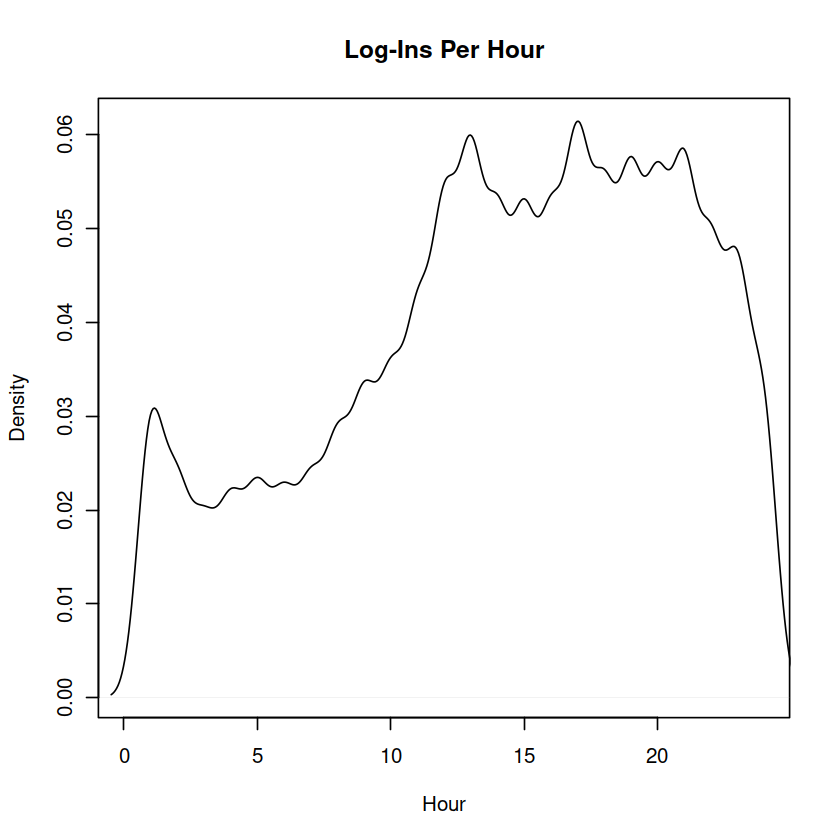

In [154]:
#consolation prize
summary(log_in)
log_in$hour <- as(log_in$hour, "numeric")
summary(log_in)
den <- density(log_in$hour)
plot(den, xlim = c(0, 24), xlab="Hour (EST)", ylab="Density", main="Log-Ins Per Hour")